# LRT as Time Series and some Experiments with New Data

In this notebook, we implement the LRT method for timestamped click data and run a few experiments based on the new data that consists of a variety banners of different sizes.

## 1. Import data and Some Visualizations

### 1.1 Import data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings because they can be annoying (be careful)
warnings.filterwarnings('ignore')

data_heatmap = pd.read_csv('../datasets/A_data_heatmap_300x250_3p.csv')
data_metrics = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_3p.csv')
data_heatmap_new1 = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_h2m.csv')
data_heatmap_new2 = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_t2m.csv')

data_metrics_6p = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_6p.csv')
data_heatmap_6p = pd.concat([data_heatmap_new1,data_heatmap_new2],axis=0).drop(columns=['click_x_rel','click_y_rel'])

data_heatmap_ts1 = pd.read_csv('../datasets/A_data_heatmap_3k_domains_many_p_20240410_0_2m_rows.csv')
data_heatmap_ts2 = pd.read_csv('../datasets/A_data_heatmap_3k_domains_many_p_20240410_2_4m_rows.csv')
data_heatmap_ts3 = pd.read_csv('../datasets/A_data_heatmap_3k_domains_many_p_20240410_4_6m_rows.csv')

# combine time-series data:
data_heatmap_ts = pd.concat([data_heatmap_ts1,data_heatmap_ts2,data_heatmap_ts3])

data_metrics_ts = pd.read_csv('../datasets/A_data_domain_perf_metrics_3k_domains_many_p_20240410.csv')
data_heatmap_ts.timestamp = data_heatmap_ts.timestamp - data_heatmap_ts.timestamp.min()

### 1.2 Some Visualization

We start with some visualizations of the new dataset:

#### 1.2.1 Group By gid, dom, height and width

The following code creates pictures (scaled to size) by binning all clicks per banner into 5x5 bins. Since it runs through all possible banners with more than 1K clicks, it is not recommended to evaluate this cell.

In [5]:
# for gid in [333519,333372]:
#     doms = data_heatmap_ts[(data_heatmap_ts.grid_id==gid)].groupby(['domain','grid_id']).clicks.sum().reset_index().sort_values(by=['clicks'],ascending=False).domain.unique()
#     for dom in doms:
#         test_hm = data_heatmap_ts[(data_heatmap_ts.grid_id==gid) & (data_heatmap_ts.domain==dom)].copy().reset_index()
#         for h,w in test_hm[['display_height','display_width']].drop_duplicates().values:
#             # print(h,w)
#             test_hm1 =  test_hm[(test_hm.display_width==w) & (test_hm.display_height==h)]
    
#             if test_hm1.shape[0]>=1000:
#                 print('gid,dom,h,w',gid,dom,h,w)
#                 print('click nrs:',test_hm1.shape[0])
#                 test_hm1['click_x1'] = (test_hm1.click_x/test_hm1.display_width*(test_hm1.display_width//5)).astype(int)
#                 test_hm1['click_y1'] = (test_hm1.click_y/test_hm1.display_height*(test_hm1.display_height//5)).astype(int)
                
#                 click_matrix = test_hm1.groupby(['click_x1','click_y1']).clicks.sum().reset_index().pivot("click_y1",
#                                                           "click_x1",
#                                                           "clicks").fillna(0)
#                 plt.figure(figsize=((w//50),(h//50)))
#                 sns.heatmap(click_matrix, 
#                             cmap = "YlGnBu", 
#                             annot = False, 
#                             cbar = True, 
#                             fmt = "g")
#                 plt.title(f'Grid = {gid}, domain = {dom}, (h,w) = ({h},{w})')
#                 plt.xlabel('x bin')
#                 plt.ylabel('y bin')
#                 plt.gca().invert_yaxis() 
#                 plt.show()

#### 1.2.2 Plot Time Evolution

We can plot the time-evolution of banners. We specifically focus on various banners that seem to degenerate from unbroken to broken. We leave the code here as a boiler plate code to quickly check the evolution for several exampels (the examples on the top are some where we expected to see the unbroken -> broken transition -- some do some don't)

This example actually quite nicely shows some degeneration, so we leave it here:

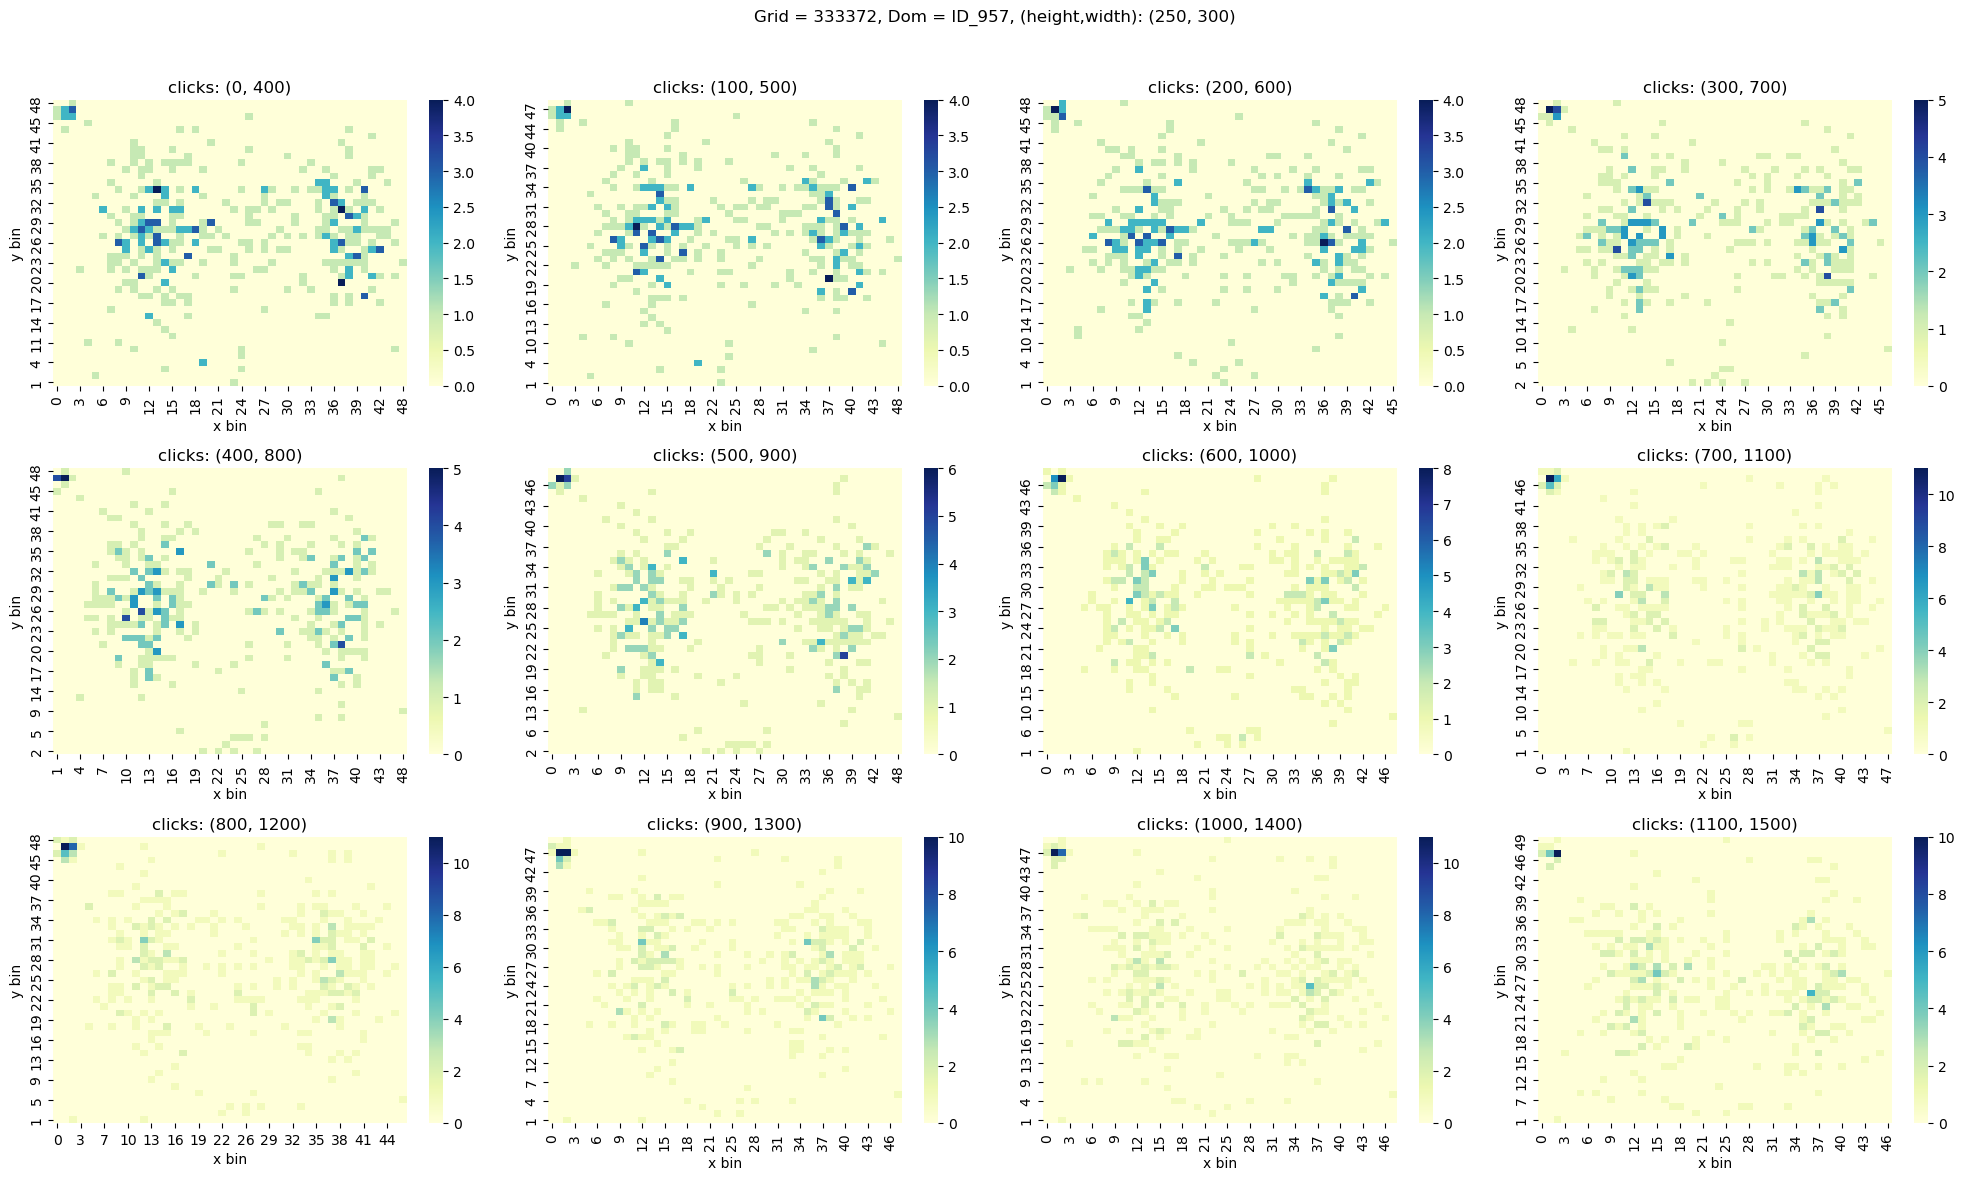

In [10]:
# gid,dom,h,w 333519 ID_9492 600 300
# gid, dom, dh, dw = 333519, 'ID_9492', 600, 300
# gid, dom, dh, dw = 333519, 'ID_6873', 250, 300
# gid, dom, dh, dw = 333519, 'ID_882',  600, 300
# gid, dom, dh, dw = 333519, 'ID_9787', 250, 300
# gid, dom, dh, dw = 333519, 'ID_9018', 250, 300
# gid, dom, dh, dw = 333519, 'ID_8210', 600, 300
# gid, dom, dh, dw = 333519, 'ID_9750', 250, 300
# gid, dom, dh, dw = 333519, 'ID_12852', 250, 300
# gid, dom, dh, dw = 333519, 'ID_882', 600, 300
# gid, dom, dh, dw = 333519, 'ID_11655', 600, 300
# gid, dom, dh, dw = 333519, 'ID_9492', 600, 300
# gid, dom, dh, dw = 333372, 'ID_6982', 600, 300
# gid, dom, dh, dw = 333372, 'ID_10814', 600, 300
# gid, dom, dh, dw = 333519, 'ID_9492', 600, 300
# gid, dom, dh, dw = 333372, 'ID_9712', 250, 970
# gid, dom, dh, dw = 333372, 'ID_12824', 600, 300
# gid, dom, dh, dw = 333372, 'ID_10814', 600, 300
# gid, dom, dh, dw = 333372, 'ID_9787', 250, 300
# gid, dom, dh, dw = 333372, 'ID_10089', 250, 300
# gid, dom, dh, dw = 333372, 'ID_6982', 250, 300
# gid, dom, dh, dw = 333372, 'ID_9749', 250, 300
# gid, dom, dh, dw = 333372, 'ID_957', 250, 300
gid, dom, dh, dw = 333372, 'ID_957', 250, 300

example = data_heatmap_ts[(data_heatmap_ts.grid_id==gid) & (data_heatmap_ts.domain==dom)
                & (data_heatmap_ts.display_height==dh) & (data_heatmap_ts.display_width==dw)].copy().reset_index()
example = example.sort_values(by='timestamp').reset_index()
example['click_x1'] = (example.click_x/example.display_width*50).astype(int)
example['click_y1'] = (example.click_y/example.display_height*50).astype(int)

ex = np.arange(0, example.shape[0], 100, dtype=int)

fig, axes = plt.subplots(3,4, figsize=(20, 12)) 
fig.suptitle(f'Grid = {gid}, Dom = {dom}, (height,width): {dh,dw}')

i, j = 0, 4

for ax_idx, ax in enumerate(axes.flat):
    if j < ex.shape[0]:
        cli = ex[i]
        clj = ex[j]
        i += 1
        j += 1

        click_matrix = example.iloc[cli:clj].groupby(['click_x1', 'click_y1']).clicks.sum().reset_index().pivot(
            "click_y1", "click_x1", "clicks").fillna(0)

        sns.heatmap(click_matrix, cmap="YlGnBu", annot=False, cbar=True, fmt="g", ax=ax)
        ax.set_title(f'clicks: {cli, clj}')
        ax.set_xlabel('x bin')
        ax.set_ylabel('y bin')
        ax.invert_yaxis()
    else:
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 1.3 Import List of Broken Domains (old data)

Now, let us import the list of banners we identified as broken for data I and data II and create a dictionary for each banner type:

In [11]:
# importing broken banners
cb_333519 = ['ID_1184', 'ID_1281', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522',
       'ID_1544', 'ID_162', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888',
       'ID_1929', 'ID_2076', 'ID_2097', 'ID_2226', 'ID_2249', 'ID_2268',
       'ID_2331', 'ID_2339', 'ID_2386', 'ID_2396', 'ID_2438', 'ID_258',
       'ID_2609', 'ID_2680', 'ID_2863', 'ID_2883', 'ID_2908', 'ID_3061',
       'ID_3243', 'ID_3250', 'ID_3314', 'ID_3382', 'ID_3397', 'ID_3402',
       'ID_3420', 'ID_3459', 'ID_3470', 'ID_3540', 'ID_398', 'ID_409',
       'ID_484', 'ID_489', 'ID_526', 'ID_549', 'ID_580', 'ID_665',
       'ID_810', 'ID_84', 'ID_857', 'ID_86', 'ID_905', 'ID_927', 'ID_934',
       'ID_962', 'ID_986']

cb_333346 = ['ID_1247', 'ID_162', 'ID_2534', 'ID_2742', 'ID_526', 'ID_2201',
       'ID_1165', 'ID_743', 'ID_199', 'ID_2145', 'ID_2569', 'ID_643',
       'ID_1305', 'ID_3180', 'ID_3158', 'ID_136', 'ID_293', 'ID_1753',
       'ID_1849', 'ID_2226', 'ID_1462', 'ID_626', 'ID_2863', 'ID_3243',
       'ID_3250', 'ID_1708', 'ID_1238', 'ID_580', 'ID_84', 'ID_2568',
       'ID_2340', 'ID_1803', 'ID_3470', 'ID_139', 'ID_2619', 'ID_2908',
       'ID_1281', 'ID_3308', 'ID_2883', 'ID_1320', 'ID_1333', 'ID_1062',
       'ID_149', 'ID_260', 'ID_599', 'ID_1513', 'ID_3402', 'ID_1888',
       'ID_2972', 'ID_398', 'ID_2339', 'ID_1030', 'ID_3382', 'ID_2076',
       'ID_1646', 'ID_1077', 'ID_10', 'ID_1153', 'ID_1533', 'ID_2609',
       'ID_1214', 'ID_810', 'ID_2097', 'ID_2386', 'ID_1585', 'ID_549',
       'ID_3420', 'ID_3397', 'ID_2006', 'ID_561', 'ID_1542', 'ID_1570',
       'ID_1819', 'ID_1413', 'ID_1240', 'ID_793', 'ID_831', 'ID_3188',
       'ID_1437', 'ID_556', 'ID_1134', 'ID_314', 'ID_2836', 'ID_1483',
       'ID_2676', 'ID_665', 'ID_15', 'ID_2755', 'ID_2194', 'ID_1682',
       'ID_2775', 'ID_1923', 'ID_1846', 'ID_1262', 'ID_3314', 'ID_1448',
       'ID_1770', 'ID_2626', 'ID_3296', 'ID_489', 'ID_1963', 'ID_1268',
       'ID_1568', 'ID_1094', 'ID_2267', 'ID_409', 'ID_1650', 'ID_1522',
       'ID_927', 'ID_2302', 'ID_1929', 'ID_1435', 'ID_1353']

cb_333346_6p = ['ID_106', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_136', 
             'ID_1542', 'ID_1589', 'ID_1602', 'ID_185', 'ID_1908', 'ID_1915', 
             'ID_1916', 'ID_1971',  'ID_2015', 'ID_2063', 'ID_2133', 'ID_2143', 
             'ID_2336', 'ID_2337', 'ID_2368', 'ID_243', 'ID_245', 'ID_2553', 
             'ID_2564', 'ID_2635', 'ID_2636', 'ID_267', 'ID_2693', 'ID_27', 
             'ID_2737', 'ID_2750', 'ID_2762', 'ID_2867', 'ID_2924', 'ID_2933', 
             'ID_2977', 'ID_3172', 'ID_3219', 'ID_324', 'ID_3268', 'ID_333', 
             'ID_3334', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567', 'ID_3605', 
             'ID_362', 'ID_3633', 'ID_3640', 'ID_365', 'ID_367', 'ID_3672', 
             'ID_3699', 'ID_3730', 'ID_3809', 'ID_3837', 'ID_3848', 'ID_3920', 
             'ID_3939', 'ID_3982', 'ID_401', 'ID_4042', 'ID_4058', 'ID_4072', 
             'ID_4076', 'ID_4199', 'ID_4206', 'ID_4224', 'ID_4378', 'ID_4507', 
             'ID_466', 'ID_494', 'ID_539', 'ID_62', 'ID_727', 'ID_737', 
             'ID_861', 'ID_876', 'ID_889', 'ID_90', 'ID_922', 'ID_949', 
             'ID_981', 'ID_993']

cb_333519_6p = ['ID_1081', 'ID_1150', 'ID_1464', 'ID_1518', 'ID_1622', 'ID_1623', 
                'ID_1624', 'ID_1631', 'ID_1678', 'ID_1623', 'ID_1731', 'ID_1752', 
                'ID_1764', 'ID_1795', 'ID_1915', 'ID_1916', 'ID_1971', 'ID_198', 
                'ID_2018', 'ID_204', 'ID_2044', 'ID_2104', 'ID_2108', 'ID_2109', 
                'ID_2146', 'ID_2251', 'ID_2330', 'ID_2336', 'ID_2381', 'ID_2383', 
                'ID_2400', 'ID_2616', 'ID_2636', 'ID_2749', 'ID_2766', 'ID_2779', 
                'ID_2809', 'ID_284', 'ID_2875', 'ID_2881', 'ID_30', 'ID_3021', 
                'ID_3049', 'ID_3098', 'ID_3178', 'ID_3183', 'ID_3219', 'ID_3232', 
                'ID_3561', 'ID_3644', 'ID_365', 'ID_3850', 'ID_389', 'ID_4025', 
                'ID_4036', 'ID_4050', 'ID_4058', 'ID_4075', 'ID_4113', 'ID_4122', 
                'ID_4255', 'ID_4257', 'ID_4275', 'ID_4347', 'ID_44', 'ID_4506', 
                'ID_4567', 'ID_618', 'ID_727', 'ID_737', 'ID_922', 'ID_950', 
                'ID_960', 'ID_969']

cb_333346_6p = ['ID_106', 'ID_1003', 'ID_1081', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_1303', 'ID_1347', 
                'ID_136', 'ID_1464', 'ID_1542', 'ID_1579', 'ID_1589', 'ID_1602', 'ID_1624','ID_1640', 'ID_1731',
                'ID_185', 'ID_1902', 'ID_1908', 'ID_1915', 'ID_1916', 'ID_1917','ID_1971', 'ID_1974', 'ID_2015', 
                'ID_2063', 'ID_2077', 'ID_2099', 'ID_2104', 'ID_2108', 'ID_2133', 'ID_2143', 'ID_2214', 'ID_2242',
                'ID_2279', 'ID_2336', 'ID_2337', 'ID_2368', 'ID_2400', 'ID_2404', 'ID_243', 'ID_2435', 'ID_245', 
                'ID_2553', 'ID_2564', 'ID_2598', 'ID_2626', 'ID_2627', 'ID_2635', 'ID_2636', 'ID_2648', 'ID_267', 
                'ID_2693', 'ID_27', 'ID_2737', 'ID_2750', 'ID_2760', 'ID_2762', 'ID_2766', 'ID_2779', 'ID_2809', 
                'ID_2867', 'ID_2881', 'ID_2924', 'ID_2933', 'ID_2977', 'ID_3019', 'ID_3098', 'ID_313', 'ID_3157', 
                'ID_3172', 'ID_3178', 'ID_3219', 'ID_3231', 'ID_324', 'ID_3268', 'ID_3308', 'ID_333', 'ID_3334', 
                'ID_3375', 'ID_3389', 'ID_3405', 'ID_3418', 'ID_3472', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567',
                'ID_3605', 'ID_3614', 'ID_362', 'ID_3633', 'ID_3640', 'ID_3644', 'ID_365', 'ID_367', 'ID_3672', 
                'ID_3699', 'ID_3726', 'ID_3730', 'ID_3781', 'ID_3799', 'ID_3800', 'ID_3809', 'ID_3837', 'ID_3848', 
                'ID_3850', 'ID_389', 'ID_3917', 'ID_3920', 'ID_3939', 'ID_3982', 'ID_401', 'ID_4016', 'ID_4040',
                'ID_4042', 'ID_4058', 'ID_4072', 'ID_4076', 'ID_4199', 'ID_4204', 'ID_4206', 'ID_4224', 'ID_4275',
                'ID_429', 'ID_4347', 'ID_4378', 'ID_4507', 'ID_4567','ID_466', 'ID_494', 'ID_514', 'ID_539', 
                'ID_582', 'ID_62', 'ID_71', 'ID_727', 'ID_731', 'ID_737', 'ID_825', 'ID_861', 'ID_869', 'ID_876', 
                'ID_889', 'ID_90', 'ID_922', 'ID_949', 'ID_969', 'ID_979', 'ID_981', 'ID_993']

cb_333346_new = ['ID_1071', 'ID_1149', 'ID_1246', 'ID_1300', 'ID_1358', 'ID_1614', 'ID_1894', 'ID_1999', 
                 'ID_2142', 'ID_2198', 'ID_2274', 'ID_2331', 'ID_2400', 'ID_2438', 'ID_2495', 'ID_2710', 
                 'ID_2808', 'ID_3197', 'ID_3335', 'ID_418', 'ID_657', 'ID_773', 'ID_906', 'ID_962']

cb_333519_new = ['ID_10', 'ID_1077', 'ID_1178', 'ID_1203', 'ID_1246', 'ID_1262', 'ID_1671', 'ID_1691', 
                 'ID_1999', 'ID_2198', 'ID_2495', 'ID_2569', 'ID_2619', 'ID_3180', 'ID_3308', 'ID_394', 
                 'ID_678', 'ID_793']

cb = {333519: cb_333519+cb_333519_new, 333346: cb_333346+cb_333346_new}
cb_6p = {333519: cb_333519_6p, 333346: cb_333346_6p}

## 2. LRT-method

In this section, we introduce the LRT method for the time-series data. In order to get representatives for "bad"/"broken" banners, we first need to create the aggregate broken banners based on the old (300x250) data, i.e. data I and II.

### 2.1. Data I and Data II

We first bin the data (as usual) and define auxiliary dataframes for aggregated clicks across the old data.

In [12]:
data_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)

max_width = data_expanded['display_width'].max()
max_height = data_expanded['display_height'].max()

width_bins = np.linspace(1, max_width, 61)
height_bins = np.linspace(1, max_height, 51)

data_expanded['click_x_bin'] = pd.cut(data_expanded['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_expanded['click_y_bin'] = pd.cut(data_expanded['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks = data_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')

# cl_stat = aggregated_clicks.groupby(['click_x_bin','click_y_bin']).count().reset_index()
# cl_stat = cl_stat[['click_x_bin','click_y_bin','clicks_sum']]
# cl_stat['bin_prob'] = cl_stat['clicks_sum']/cl_stat['clicks_sum'].sum()

aggregated_clicks_by_grid = aggregated_clicks.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

data_expanded_6p = data_heatmap_6p.loc[data_heatmap_6p.index.repeat(data_heatmap_6p['clicks'])].reset_index(drop=True)

max_width = data_expanded_6p['display_width'].max()
max_height = data_expanded_6p['display_height'].max()

width_bins = np.linspace(1, max_width, 61)
height_bins = np.linspace(1, max_height, 51)

data_expanded_6p['click_x_bin'] = pd.cut(data_expanded_6p['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_expanded_6p['click_y_bin'] = pd.cut(data_expanded_6p['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks_6p = data_expanded_6p.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


aggregated_clicks_by_grid_6p = aggregated_clicks_6p.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

#### 2.1.1 Representative broken: Data I and II

Now, we create the aggregate/representative broken banners based on data I and II.

We start with data II

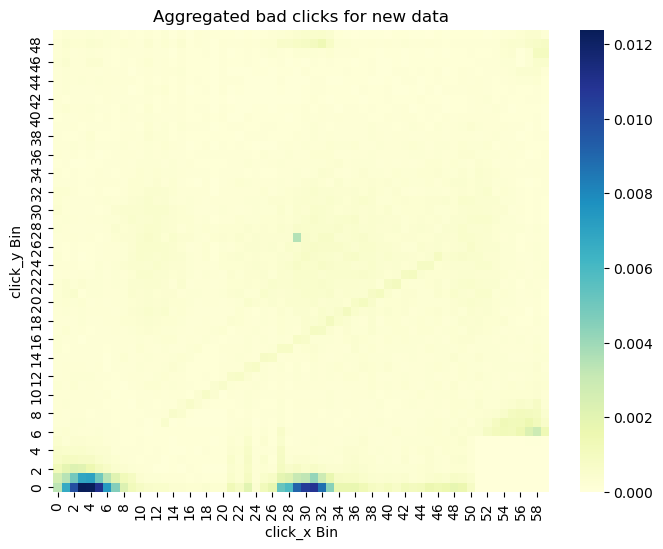

In [13]:
data_broken = {}
data_broken_proba = {}

for g_id in [333519, 333346]:
    agg_broken = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) & 
                      (aggregated_clicks_6p.domain.isin(cb_6p[g_id]))]
    
    agg_broken = pd.concat([aggregated_clicks[(aggregated_clicks.grid_id == g_id) & 
                      (aggregated_clicks.domain.isin(cb[g_id]))], agg_broken])
    
    data_broken[g_id] = agg_broken.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()
    
    total_clicks = agg_broken.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
    
    agg_broken['proba'] = agg_broken['clicks_sum'] / total_clicks
    
    data_broken_proba[g_id] = agg_broken.groupby(['click_x_bin','click_y_bin'
                            ]).sum('proba').reset_index()
    
    data_broken_proba[g_id]['proba1'] = data_broken_proba[g_id]['proba']/data_broken_proba[g_id].proba.sum()

combined_agg_broken = data_broken_proba[333346].drop(columns = ['grid_id']).merge(data_broken_proba[333346].drop(columns = ['grid_id']), on = ['click_x_bin','click_y_bin'], how='outer').fillna(0)
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_x']+combined_agg_broken['proba_y']
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_comb']/combined_agg_broken.proba_comb.sum()

click_matrix = combined_agg_broken.pivot("click_y_bin",
                                  "click_x_bin",
                                  "proba_comb").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Aggregated bad clicks for new data')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

And now let's do data I:

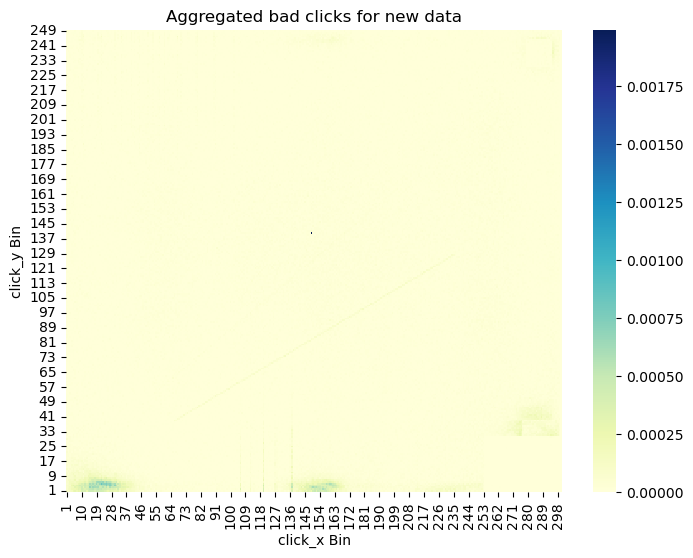

In [15]:
data_broken = {}
data_broken_proba = {}

for g_id in [333519, 333346]:
    agg_broken = data_heatmap_6p[(data_heatmap_6p.grid_id == g_id) & 
                      (data_heatmap_6p.domain.isin(cb_6p[g_id]))]
    
    agg_broken = pd.concat([data_heatmap[(data_heatmap.grid_id == g_id) & 
                      (data_heatmap.domain.isin(cb[g_id]))], agg_broken])
    
    data_broken[g_id] = agg_broken.groupby([
                                'grid_id','click_x','click_y'
                            ]).sum('clicks').reset_index()
    
    total_clicks = agg_broken.groupby(['grid_id', 'domain'])['clicks'].transform('sum')
    
    agg_broken['proba'] = agg_broken['clicks'] / total_clicks
    
    data_broken_proba[g_id] = agg_broken.groupby(['click_x','click_y'
                            ]).sum('proba').reset_index()
    
    data_broken_proba[g_id]['proba1'] = data_broken_proba[g_id]['proba']/data_broken_proba[g_id].proba.sum()

combined_agg_broken = data_broken_proba[333346].drop(columns = ['grid_id']).merge(data_broken_proba[333519].drop(columns = ['grid_id']), on = ['click_x','click_y'], how='outer').fillna(0)
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_x']+combined_agg_broken['proba_y']
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_comb']/combined_agg_broken.proba_comb.sum()

click_matrix = combined_agg_broken.pivot("click_y",
                                  "click_x",
                                  "proba_comb").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Aggregated bad clicks for new data')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

#### 2.1.2 Combined Mirrored Versions of the Aggregate broken banners

We now mirror the agg broken banners from data I and data II as we believe it will lead to better performance. For example in some banner types the X-button is not on the bottom left (as it is in our convention for data I and data II). Since we expect the user behaviour to be the same even if the X-button is somewhere else, mirroring and combining the mirrored heatmaps should address this issue (to a degree)

Notice, that we also need to project the 300x250 broken banners to the respective size of the banner type we are interested in. Our method works, but is somewhat dirty as we simply use "round" for the projection, rather than some smearing across different bins.

In [16]:
from itertools import product

db_mirr = {}
db = {}

example = combined_agg_broken
ex_dw = 300 # example.click_x.max()
ex_dh = 250 # example.click_y.max()

# dh, dw = 600, 300
for i in data_heatmap_ts[['display_height','display_width']].drop_duplicates().index:
    (dh,dw) = data_heatmap_ts.iloc[i][['display_height','display_width']].values
    example['click_x_bin'] = (example.click_x/ex_dw*(dw//5)).round().astype(int)
    example['click_y_bin'] = (example.click_y/ex_dh*(dh//5)).round().astype(int)
    
    tt = pd.DataFrame(list(product(range(0,example.click_x_bin.max()+1), range(0,example.click_y_bin.max()+1))), 
                          columns=['click_x_bin', 'click_y_bin'])
    
    example_merged = tt.merge(example, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
    
    data_bad = example_merged.groupby(['click_x_bin','click_y_bin']).proba_comb.sum().reset_index()
    data_bad = data_bad.rename(columns={'proba_comb':'proba'})

    data_bad_mirr = data_bad.copy()
    data_bad['click_y_bin_mir'] = (-1)*(data_bad['click_y_bin']-data_bad['click_y_bin'].max())
    data_bad['click_x_bin_mir'] = (-1)*(data_bad['click_x_bin']-data_bad['click_x_bin'].max())
    
    data_bad_mirr['proba'] = (data_bad[['click_x_bin','click_y_bin_mir','proba']].sort_values(by=['click_x_bin','click_y_bin_mir']).reset_index().proba + \
    data_bad[['click_x_bin_mir','click_y_bin','proba']].sort_values(by=['click_x_bin_mir','click_y_bin']).reset_index().proba + \
    data_bad[['click_x_bin_mir','click_y_bin_mir','proba']].sort_values(by=['click_x_bin_mir','click_y_bin_mir']).reset_index().proba + \
    data_bad[['click_x_bin','click_y_bin','proba']].sort_values(by=['click_x_bin','click_y_bin']).reset_index().proba)/4
    
    data_bad_mirr = data_bad_mirr[['click_x_bin','click_y_bin','proba']]

    db_mirr[(dh,dw)] = data_bad_mirr
    db[(dh,dw)] = data_bad

As a sanity check, let us visualize the mirrored version:

The top picture is the simple aggregation of broken banners for combined data I and II, while the bottom image is the mirrored+summed version (we mirror once horizontally and once vertically).

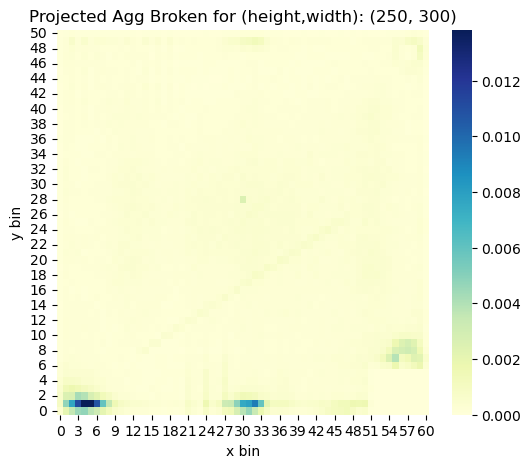

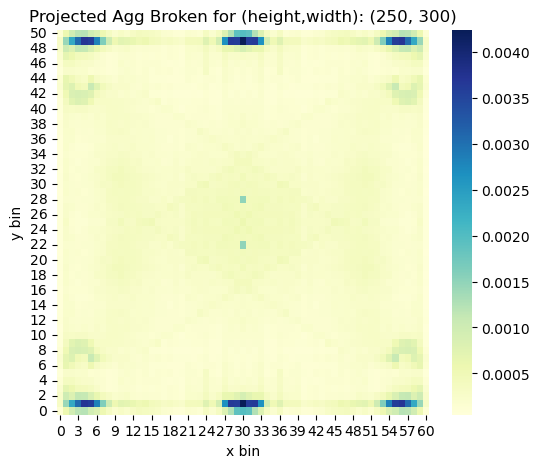

In [17]:
# plot an example:
ii = data_heatmap_ts[['display_height','display_width']].drop_duplicates().index[1]
(dh,dw) = data_heatmap_ts.iloc[ii][['display_height','display_width']].values

click_matrix = db[(dh,dw)].groupby(['click_x_bin','click_y_bin']).proba.sum().reset_index().pivot("click_y_bin",
                                                      "click_x_bin",
                                                      "proba").fillna(0)
plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Projected Agg Broken for (height,width): {dh,dw}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

click_matrix = db_mirr[(dh,dw)].groupby(['click_x_bin','click_y_bin']).proba.sum().reset_index().pivot("click_y_bin",
                                                      "click_x_bin",
                                                      "proba").fillna(0)
plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Projected Agg Broken for (height,width): {dh,dw}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

#### 2.1.3 Representative Good

Now, let us get the representative "good" banners for the LRT by filtering for 80%+ landing rate and among those we pick the ones with the most heatmap clicks (this is our usual strategy for the one-shot model).

We add a condition that if this representative would have fewer than 500 clicks we do not pick it but rather pick one by hand further below (this is necessary because the overlap between the metric data and heatmap datasets is not 100%.)

In [18]:
representative_heatmap_ts_hw = {}

# dh, dw = 600, 300
for i in data_heatmap_ts[['display_height','display_width']].drop_duplicates().index:
    
    (dh,dw) = data_heatmap_ts.iloc[i][['display_height','display_width']].values
    representative_heatmap_ts = {}
    
    for g_id in data_heatmap_ts[(data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)].grid_id.unique():
        
        filtered_data = data_metrics_ts[(data_metrics_ts.grid_id == g_id) &
                                        (data_metrics_ts.webview_height == dh) &
                                        (data_metrics_ts.webview_width == dw)]
    
        result    = filtered_data[(filtered_data.landed_clicks / filtered_data.clicks) > 0.8]
        uniq_doms = result.domain.unique()
        
        f1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) & 
                             (data_heatmap_ts.display_height == dh) & 
                             (data_heatmap_ts.display_width == dw)]
        
        # not enough clicks for representative banner:
        if f1.groupby('domain').clicks.sum().max() < 500:
            representative_heatmap_ts[g_id] = float('nan')
            continue
            
        dom_sorted = f1[f1.domain.isin(uniq_doms)].groupby(['domain']).sum('clicks').sort_values(by='clicks', 
                                                                                                 ascending=False)
        try:
            dom = dom_sorted.reset_index().iloc[0].domain
            representative_heatmap_ts[g_id] = dom
        except:
            representative_heatmap_ts[g_id] = float('nan')
            continue

    representative_heatmap_ts_hw[(dh,dw)] = representative_heatmap_ts

Let us plot an example:

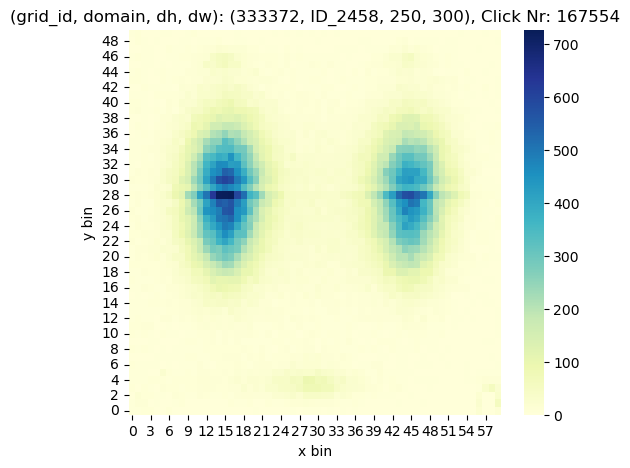

In [19]:
# plot:

ii = data_heatmap_ts[['display_height','display_width']].drop_duplicates().index[1]
(dh,dw) = data_heatmap_ts.iloc[ii][['display_height','display_width']].values
g_id = data_heatmap_ts[(data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)].grid_id.unique()[0]

dom = representative_heatmap_ts_hw[(dh,dw)][g_id]

example = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                        (data_heatmap_ts.domain == dom) & 
                        (data_heatmap_ts.display_height==dh) & 
                        (data_heatmap_ts.display_width==dw)].copy().reset_index()
    
example['click_x1'] = (example.click_x/example.display_width*(example.display_width//5)).astype(int)
example['click_y1'] = (example.click_y/example.display_height*(example.display_height//5)).astype(int)
example['proba'] = example['clicks']/example['clicks'].sum()
    
click_matrix = example.groupby(['click_x1','click_y1']).clicks.sum().reset_index().pivot("click_y1",
                                                      "click_x1",
                                                      "clicks").fillna(0)

plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'(grid_id, domain, dh, dw): ({g_id}, {dom}, {dh}, {dw}), Click Nr: {example.clicks.sum()}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

#### 2.1.4 Add Better Representatives By Hand

We now add by hand better representatives for the cases that did not get us a good one (as mentioned above).

We do this for the banners of sizes: (600,160), (360,640), (250,250)

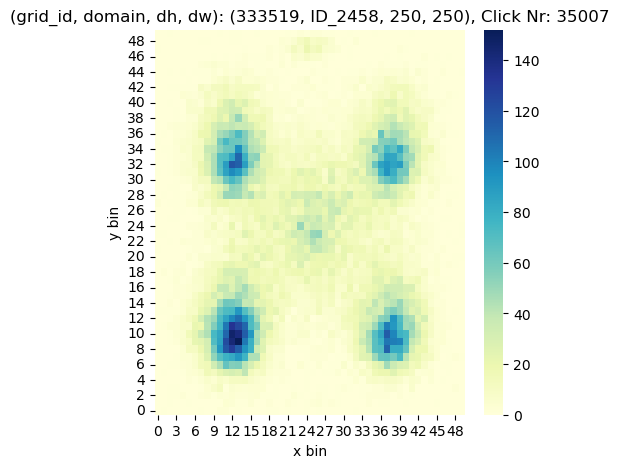

In [20]:
(dh,dw) = (250,250)
g_id = 333519

# old: 'ID_9761'
representative_heatmap_ts_hw[(dh,dw)][g_id] = 'ID_6836'

example = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                        (data_heatmap_ts.domain == representative_heatmap_ts_hw[(dh,dw)][g_id]) & 
                        (data_heatmap_ts.display_height==dh) & 
                        (data_heatmap_ts.display_width==dw)].copy().reset_index()
    
example['click_x1'] = (example.click_x/example.display_width*(example.display_width//5)).astype(int)
example['click_y1'] = (example.click_y/example.display_height*(example.display_height//5)).astype(int)
example['proba'] = example['clicks']/example['clicks'].sum()
    
click_matrix = example.groupby(['click_x1','click_y1']).clicks.sum().reset_index().pivot("click_y1",
                                                      "click_x1",
                                                      "clicks").fillna(0)

plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'(grid_id, domain, dh, dw): ({g_id}, {dom}, {dh}, {dw}), Click Nr: {example.clicks.sum()}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

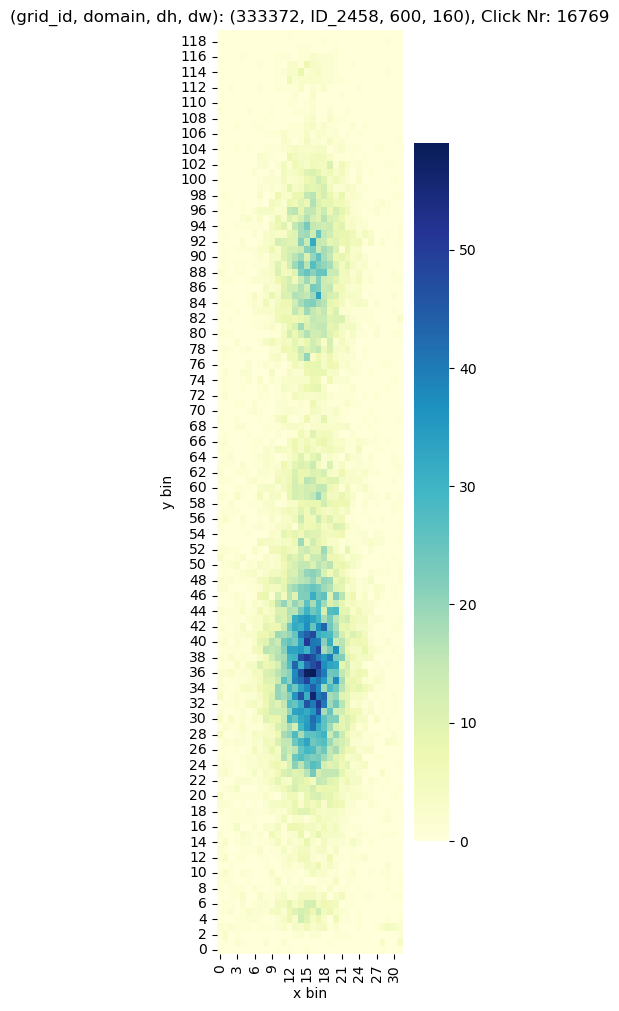

In [21]:
(dh,dw) = (600,160)
g_id = 333372
dom = representative_heatmap_ts_hw[(dh,dw)][g_id]
dom = 'ID_2458'
representative_heatmap_ts_hw[(dh,dw)][g_id] = 'ID_2458'

example = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                        (data_heatmap_ts.domain == dom) & 
                        (data_heatmap_ts.display_height==dh) & 
                        (data_heatmap_ts.display_width==dw)].copy().reset_index()
    
example['click_x1'] = (example.click_x/example.display_width*(example.display_width//5)).astype(int)
example['click_y1'] = (example.click_y/example.display_height*(example.display_height//5)).astype(int)
example['proba'] = example['clicks']/example['clicks'].sum()
    
click_matrix = example.groupby(['click_x1','click_y1']).clicks.sum().reset_index().pivot("click_y1",
                                                      "click_x1",
                                                      "clicks").fillna(0)

plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'(grid_id, domain, dh, dw): ({g_id}, {dom}, {dh}, {dw}), Click Nr: {example.clicks.sum()}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

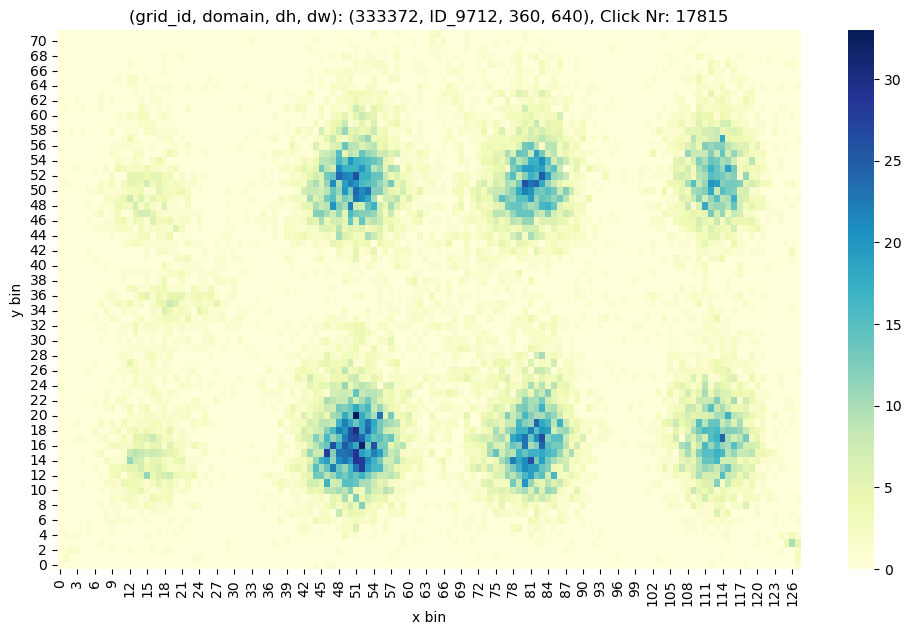

In [22]:
(dh,dw) = (360,640)
g_id = 333372

representative_heatmap_ts_hw[(dh,dw)][g_id] = 'ID_9712'
dom = representative_heatmap_ts_hw[(dh,dw)][g_id]

example = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                        (data_heatmap_ts.domain == dom) & 
                        (data_heatmap_ts.display_height==dh) & 
                        (data_heatmap_ts.display_width==dw)].copy().reset_index()
    
example['click_x1'] = (example.click_x/example.display_width*(example.display_width//5)).astype(int)
example['click_y1'] = (example.click_y/example.display_height*(example.display_height//5)).astype(int)
example['proba'] = example['clicks']/example['clicks'].sum()
    
click_matrix = example.groupby(['click_x1','click_y1']).clicks.sum().reset_index().pivot("click_y1",
                                                      "click_x1",
                                                      "clicks").fillna(0)

plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'(grid_id, domain, dh, dw): ({g_id}, {dom}, {dh}, {dw}), Click Nr: {example.clicks.sum()}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

### 2.2 Create Subset To Classify

We now create a subset of the new data for which we do a by-hand classification of broken banners. We subset to ~500 banners to minimize the by-hand work. 

The subset is chosen as the set of banner banner types with the most overall clicks.

We do not need to run the following cell but rather since we saved the images in the new_data_classify folder, we can import the unique identifiers for each banner (grid_id, display_height, display_width, domain).

In [24]:
import os

# top_10_click_nr = data_heatmap_ts.groupby(['grid_id','display_height','display_width']).clicks.sum().reset_index().sort_values(by='clicks',ascending=False)[:10]

# data_subset = []

# for idx, row in top_10_click_nr.iterrows():
#     dh, dw = row['display_height'].item(), row['display_width'].item()
#     for g_id in data_heatmap_ts[(data_heatmap_ts.display_height == dh) & 
#                         (data_heatmap_ts.display_width == dw)].grid_id.unique():
#         i=0
#         for dom in data_heatmap_ts[(data_heatmap_ts.display_height == dh) & 
#                                     (data_heatmap_ts.display_width == dw) &
#                                     (data_heatmap_ts.grid_id == g_id)].domain.unique():
#             if i > 50:
#                 break
#             filename = f"../new_data_classify/hm_{dh}_{dw}_{g_id}_{dom}.png"
            
#             if os.path.exists(filename):
#                 i+=1
#                 continue

#             example = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
#                                     (data_heatmap_ts.domain == dom) & 
#                                     (data_heatmap_ts.display_height==dh) & 
#                                     (data_heatmap_ts.display_width==dw)].copy().reset_index()
#             if example.shape[0] < 200:
#                 continue
#             example['click_x1'] = (example.click_x/example.display_width*(example.display_width//5)).astype(int)
#             example['click_y1'] = (example.click_y/example.display_height*(example.display_height//5)).astype(int)
#             example['proba'] = example['clicks']/example['clicks'].sum()
                
#             click_matrix = example.groupby(['click_x1','click_y1']).clicks.sum().reset_index().pivot("click_y1",
#                                                                   "click_x1",
#                                                                   "clicks").fillna(0)
            
#             plt.figure(figsize=(dw//50,dh//50))
#             sns.heatmap(click_matrix, 
#                         cmap = "YlGnBu", 
#                         annot = False, 
#                         cbar = True, 
#                         fmt = "g")
#             plt.title(f'(grid_id, domain, dh, dw): ({g_id}, {dom}, {dh}, {dw}), Click Nr: {example.clicks.sum()}')
#             plt.xlabel('x bin')
#             plt.ylabel('y bin')
#             plt.gca().invert_yaxis() 
#             plt.savefig(f'../new_data_classify/hm_{dh}_{dw}_{g_id}_{dom}')
#             data_subset.append((dh,dw,g_id,dom))
#             i+=1
            

Extract the subset for which we have a rough classification:

In [25]:
import os
import re
from pathlib import Path

folder_path = "../new_data_classify/"
file_paths = [f for f in Path(folder_path).glob("*.png")]
filename_pattern = r"hm_(\d+)_(\d+)_(\d+)_(\w+)\.png"
data_subset = []

for file_path in file_paths:
    filename = file_path.name
    match = re.match(filename_pattern, filename)
    if match:
        dh, dw, g_id, dom = match.groups()
        data_subset.append((int(dh),int(dw),int(g_id),dom))

In [26]:
print(len(data_subset))

482


Check that we have representative banners for each of these banner types (would give an error if not):

In [28]:
for (dh,dw,g_id,dom) in data_subset:
    representative_heatmap_ts_hw[(dh,dw)][g_id]

#### 2.1.5 Get Labels

Let us now also get the corresponding labels (1 for broken, 0 for not broken). The classification is relatively rough here and there are a lot of cases where we could've gone either way (this is largely due to having relatively little data for a lot of these banners).

We import the pickle file of broken banners and rearrange it such that we can create a label-vector y_true.

In [30]:
import pickle
with open('dataset3_broken_banners.pkl', 'rb') as f:
    broken_banners_raw = pickle.load(f)

broken_banners = {
    (int(bb[0]), int(bb[1]), int(bb[2]), f"ID_{bb[3]}")
    for bb in broken_banners_raw
}

updated_data_subset = []

for item in data_subset:
    key = (item[0], item[1], item[2], item[3])
    
    if key in broken_banners:
        updated_data_subset.append(1)
    else:
        updated_data_subset.append(0)

# Output the updated data
y_true = np.array(updated_data_subset)

<AxesSubplot: >

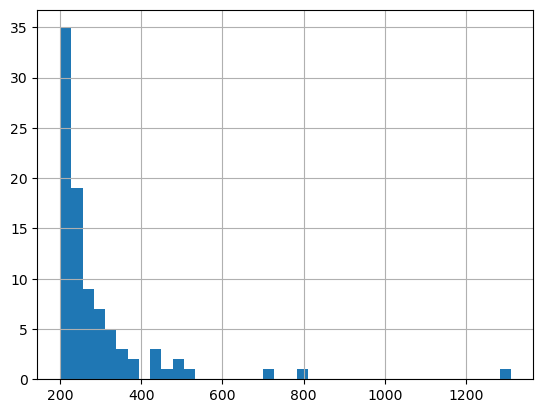

In [32]:
broken_banners_with_click_nr = []
for i, (dh,dw,g_id,dom) in enumerate(data_subset):
    if y_true[i]!=1:
        continue
        
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]
    broken_banners_with_click_nr.append({'dh':dh,'dw':dw,'gid':g_id,'dom':dom,'click_nr':data_obs_1.clicks.sum()})
broken_banners_with_click_nr = pd.DataFrame(broken_banners_with_click_nr)

broken_banners_with_click_nr.click_nr.hist(bins=40)

### 2.3.1 One-shot

Let us now turn towards implementing the Batch LRT method for the new data.

We focus on one-shot and zero-shot methods as before.

We simplify the lrt-approach a bit, by not recomputing things several times, and allow for ordered clicks/lrt with rolling windows (i.e. the click timestamp stays attached to the corresponding probability/likelihood of the click).

#### 2.3.1.1 Some Visualization

The below code includes images for visualizing the rolling window lrt trend across time/clicks. We do not recommend evaluating it as it takes some time, but we leave it here as it provides some good intuition.

In particular, we focus on the cases where we suspect the banner to be broken.

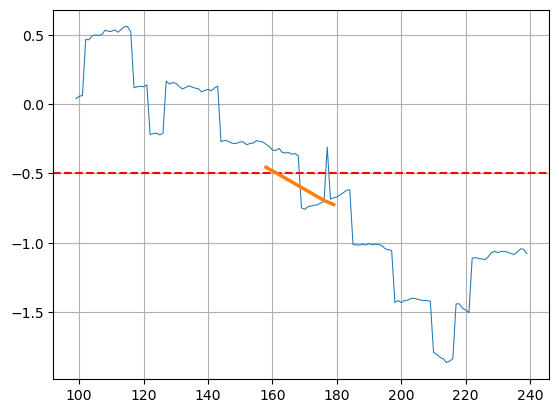

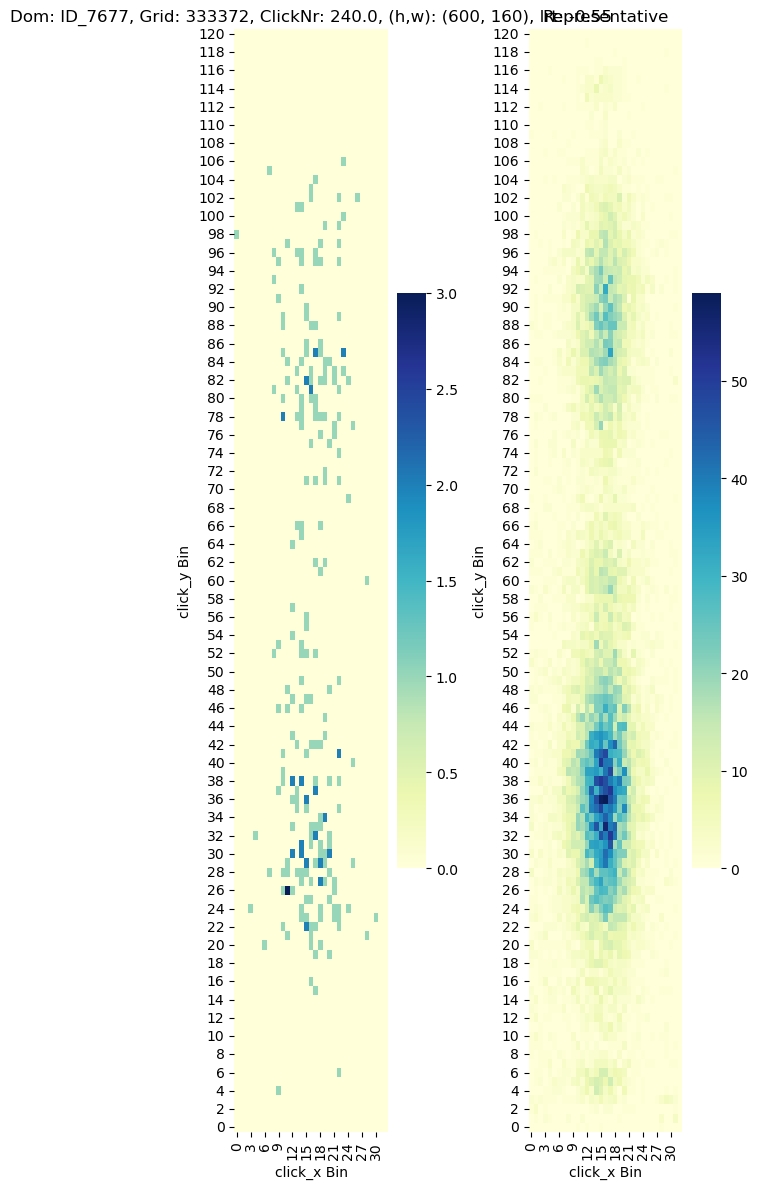

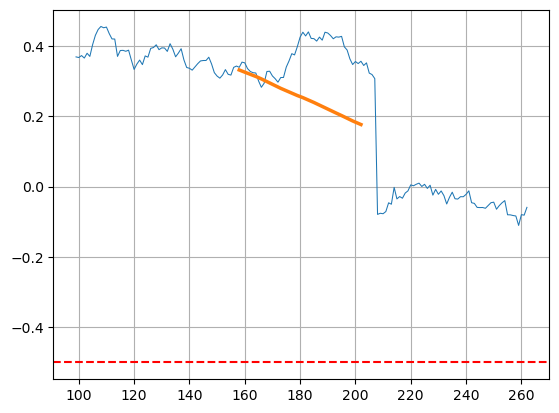

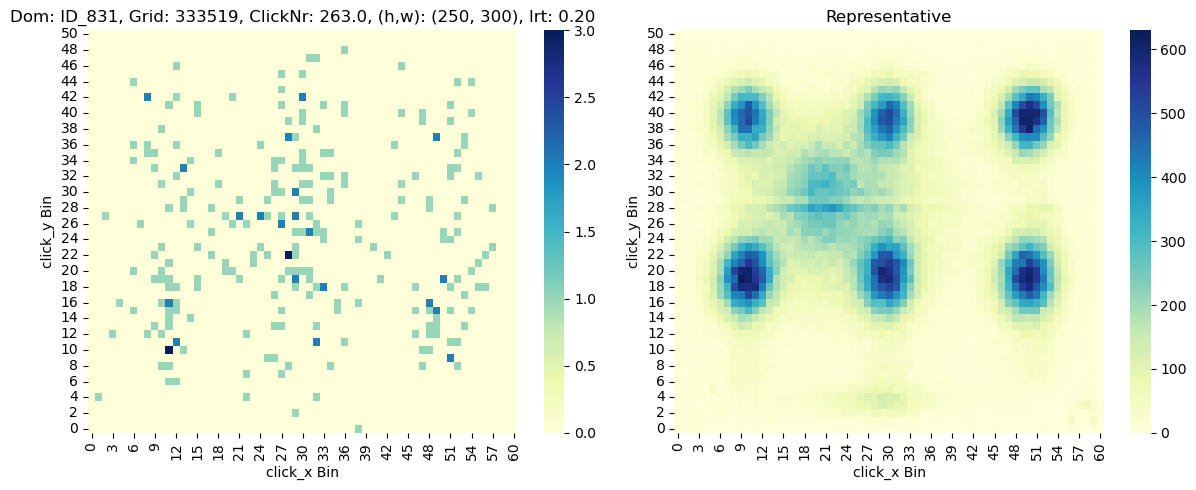

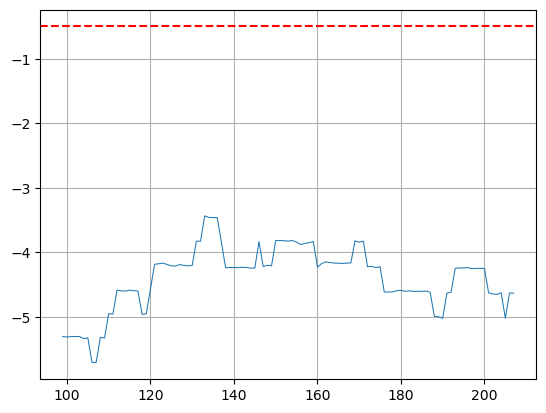

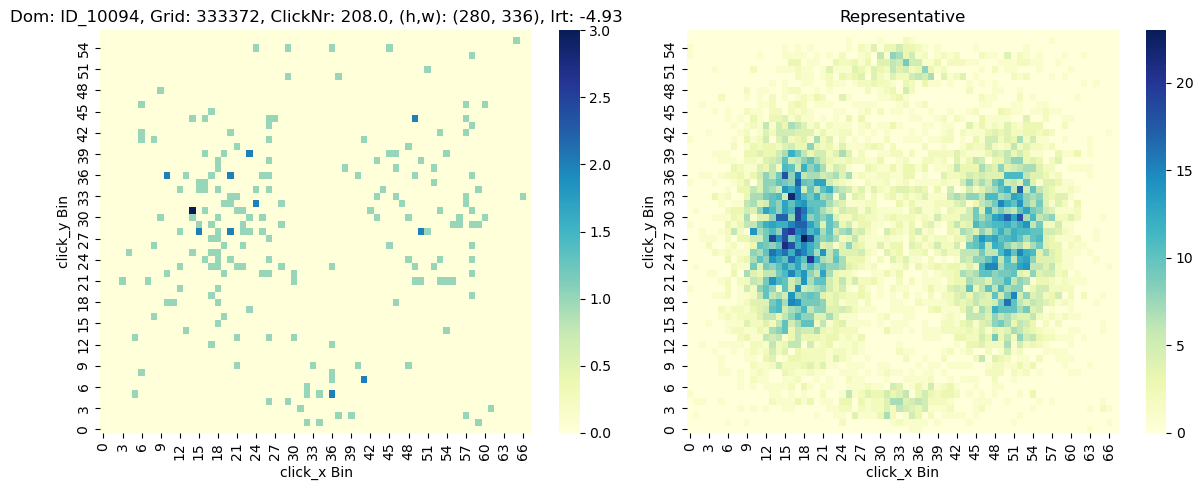

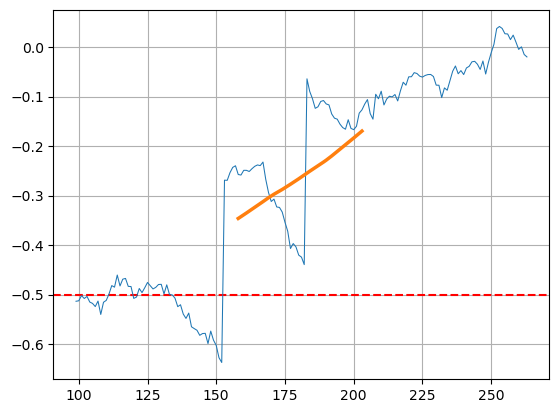

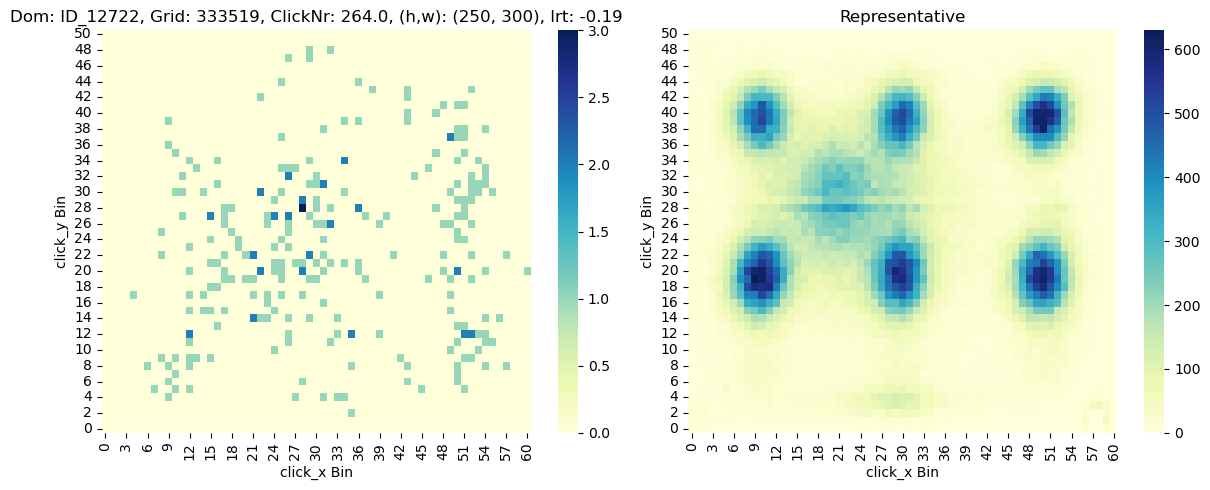

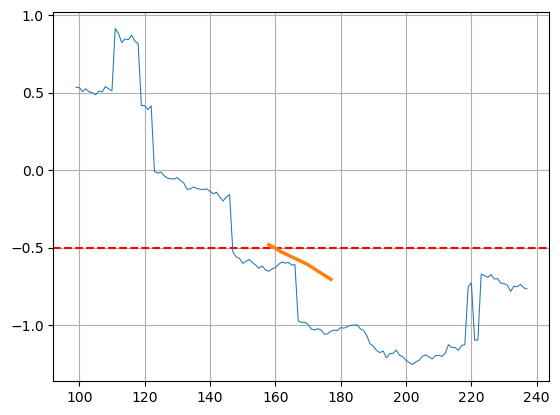

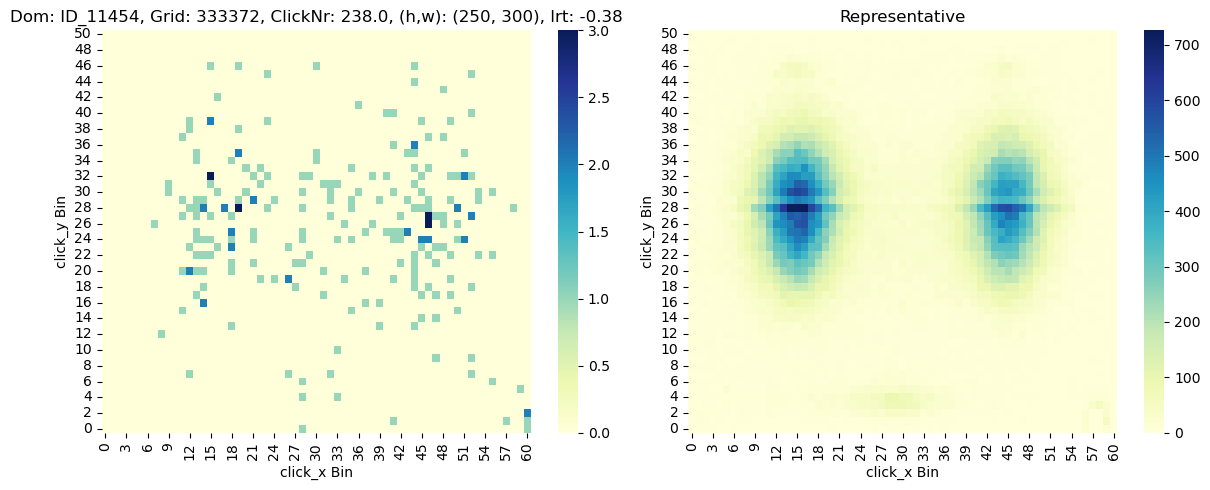

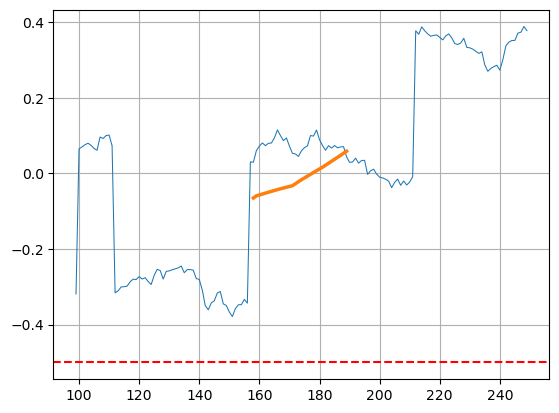

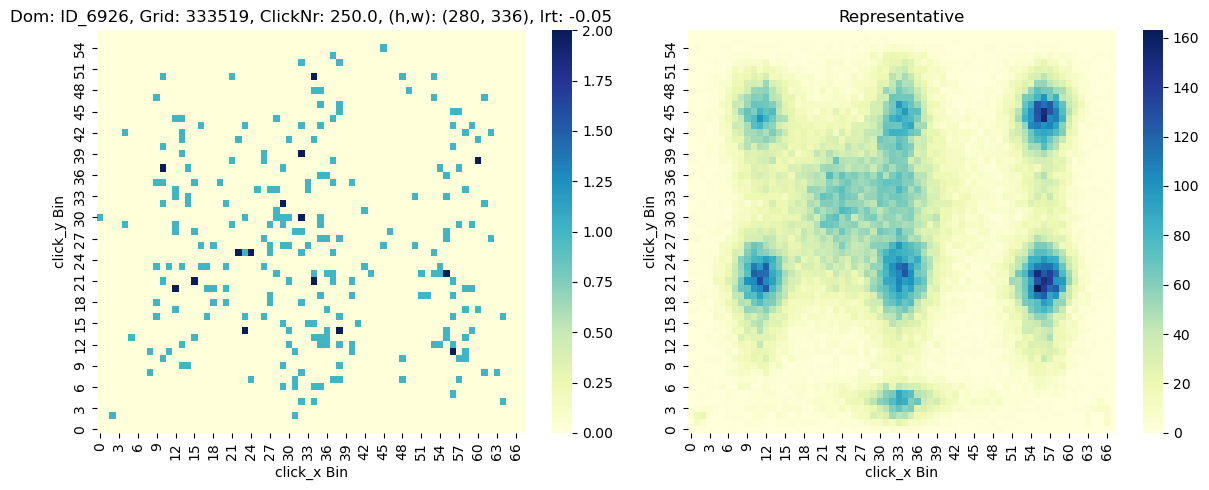

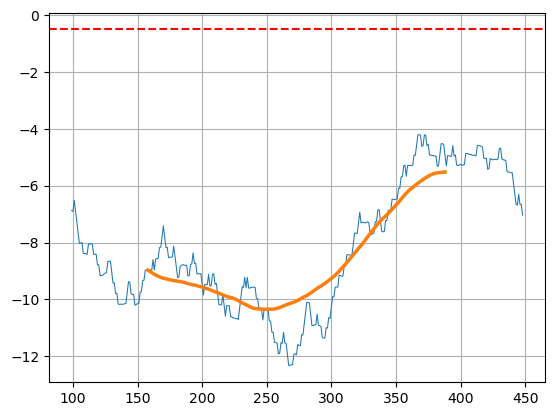

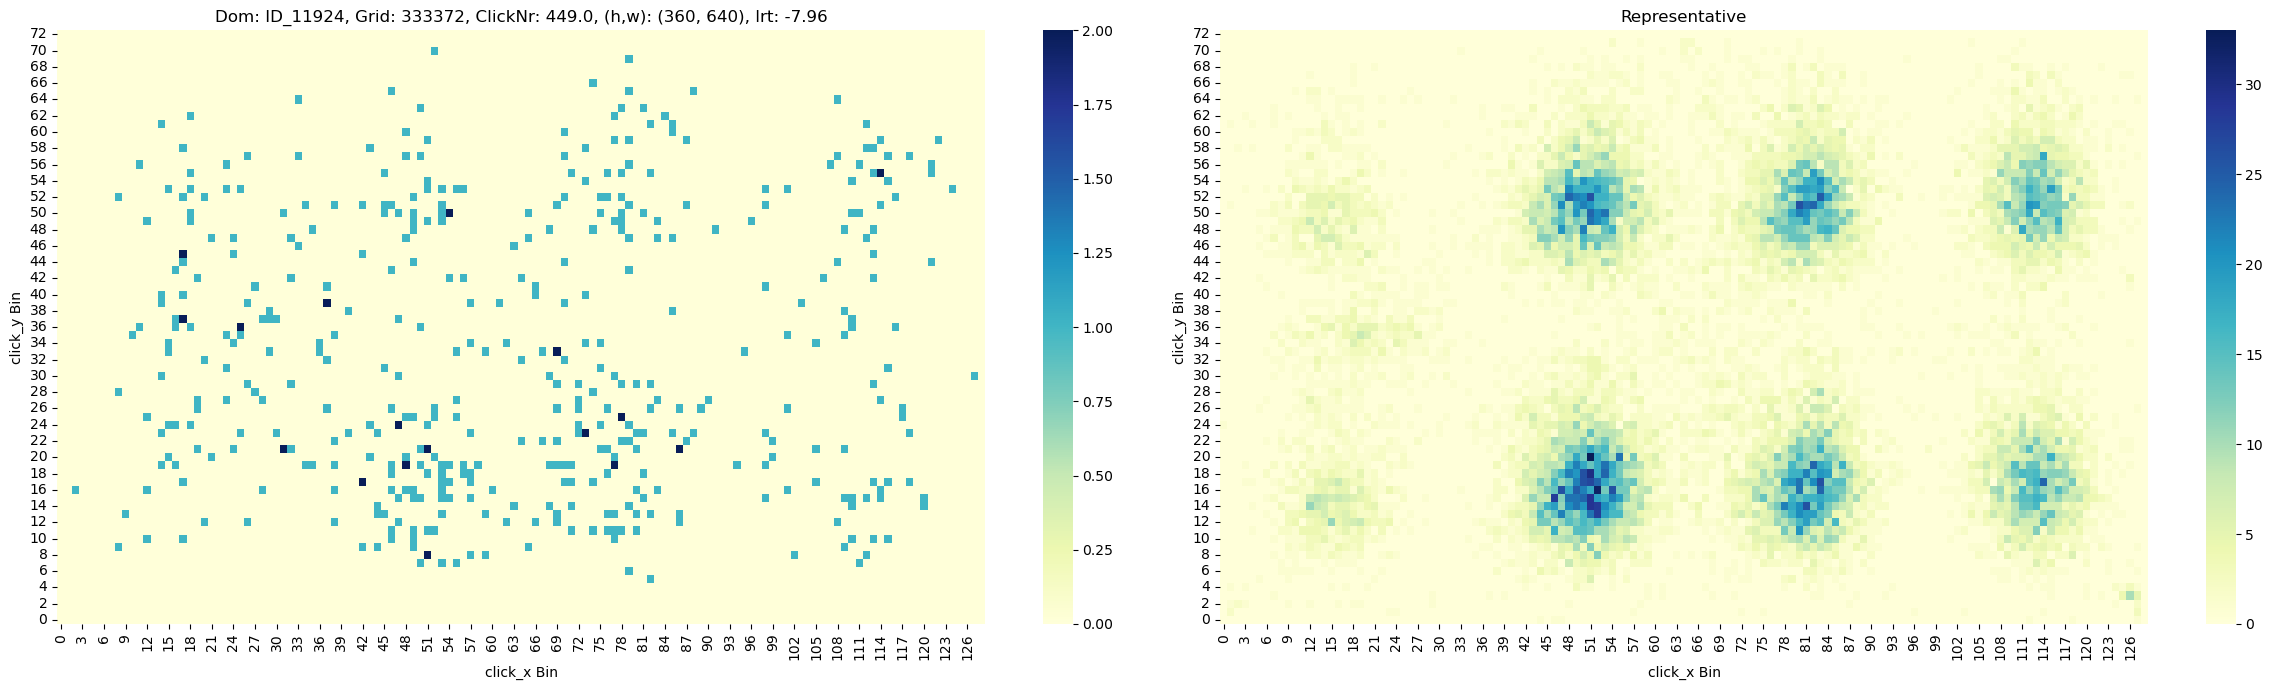

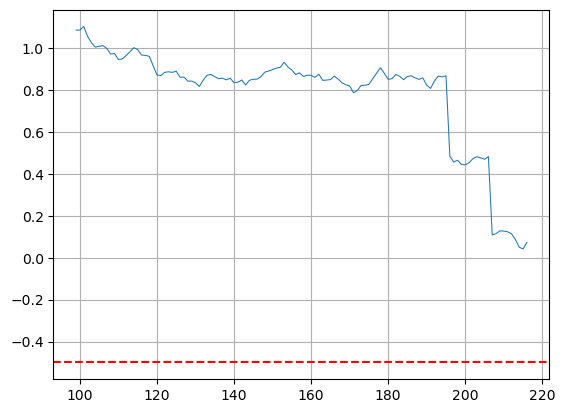

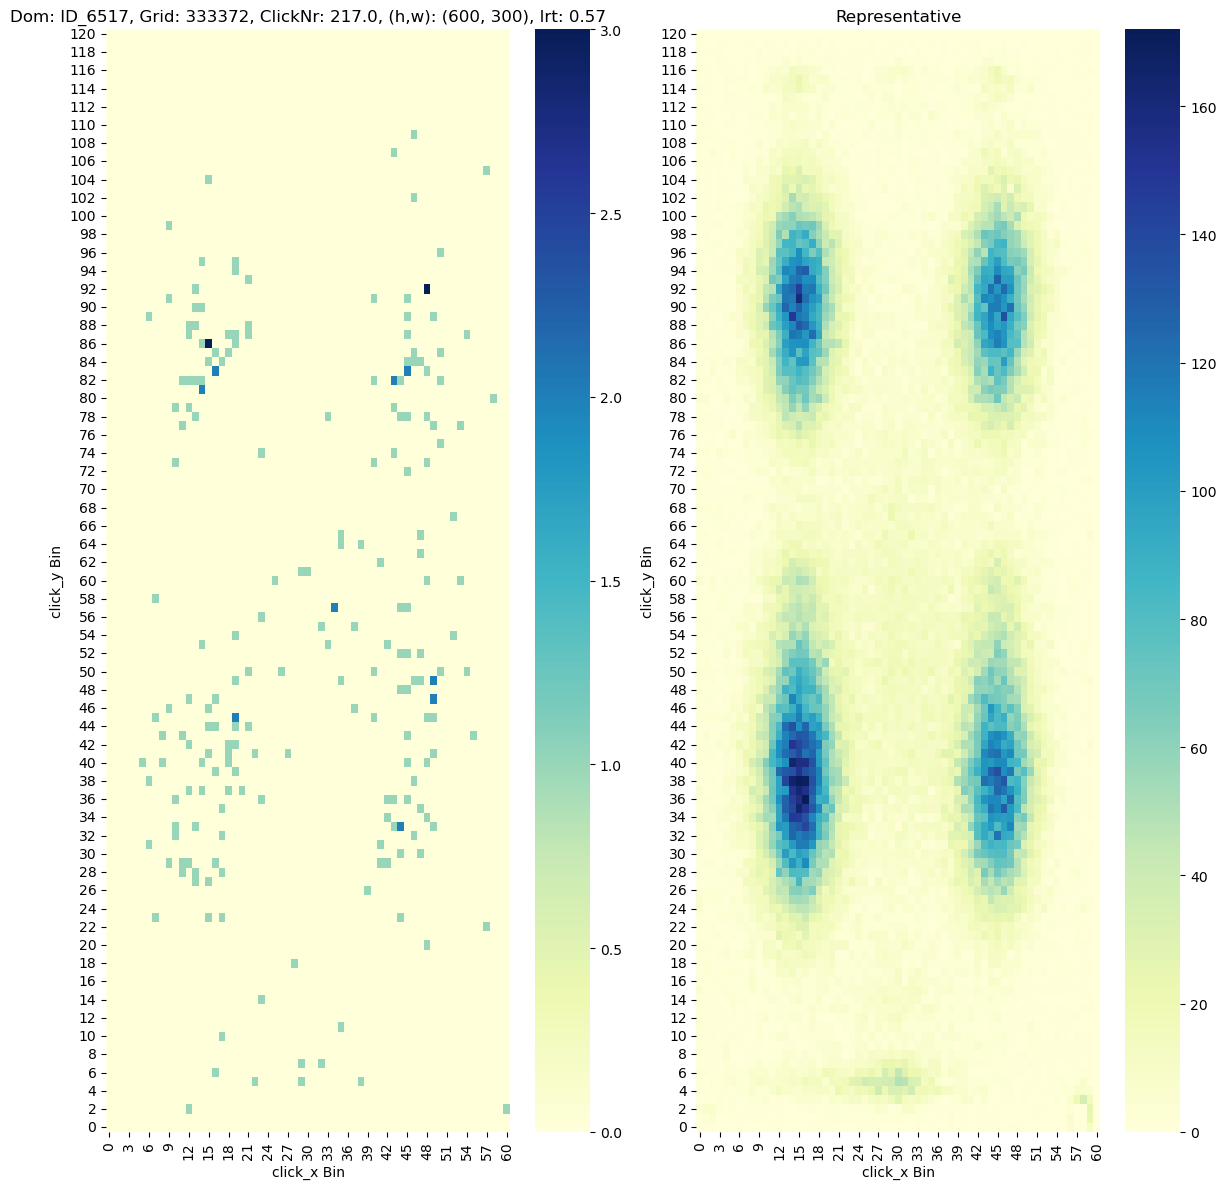

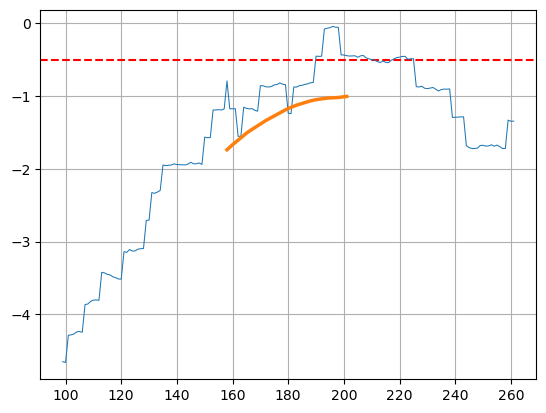

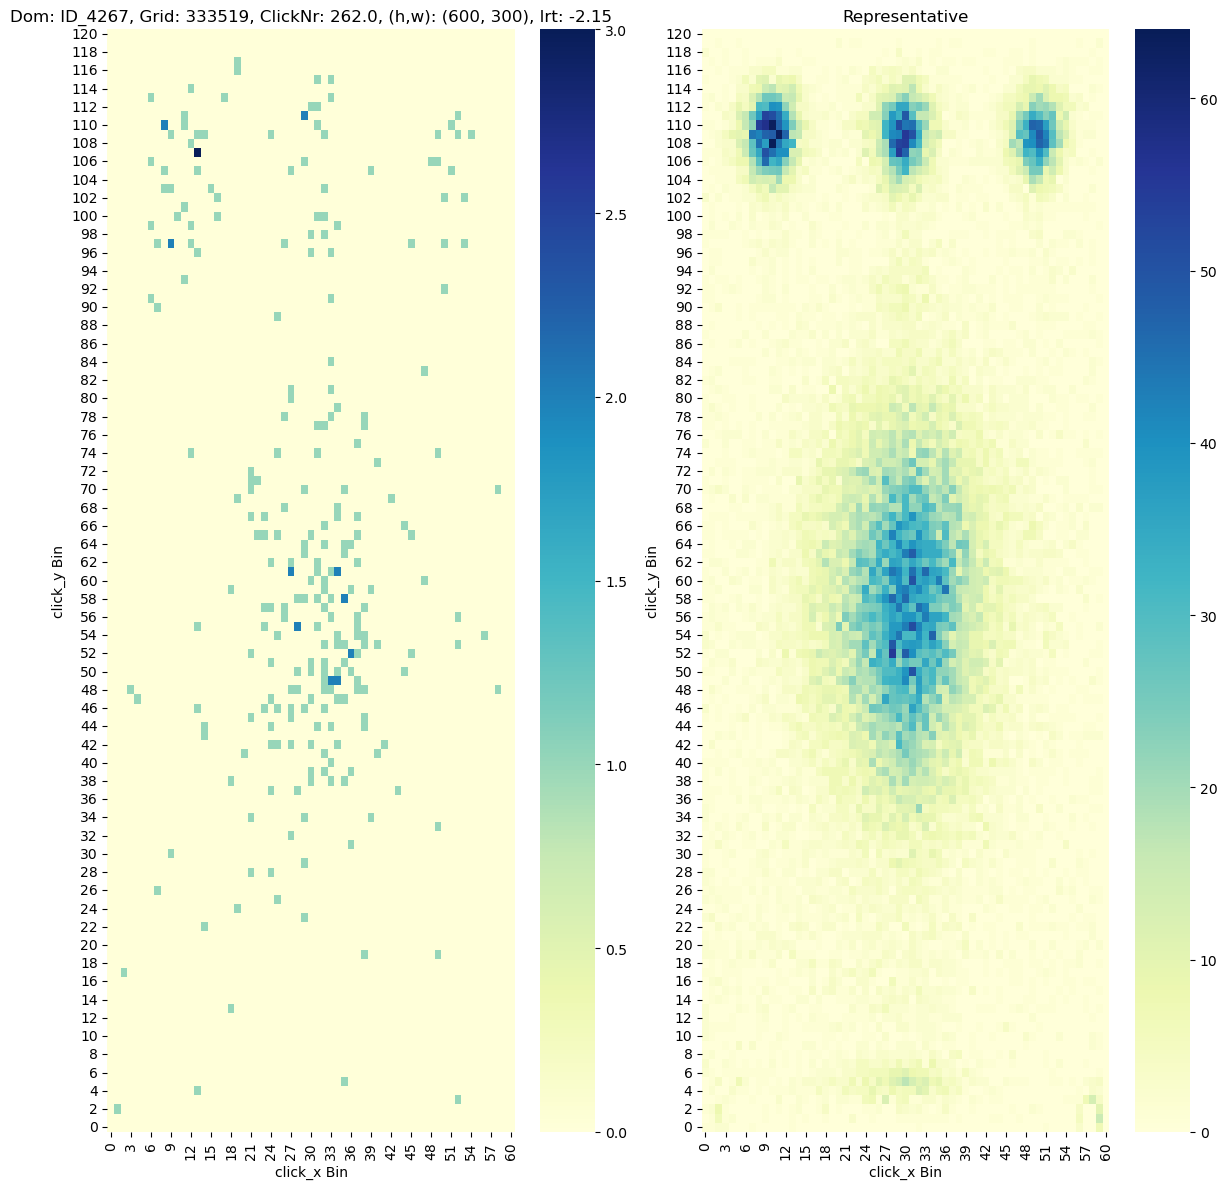

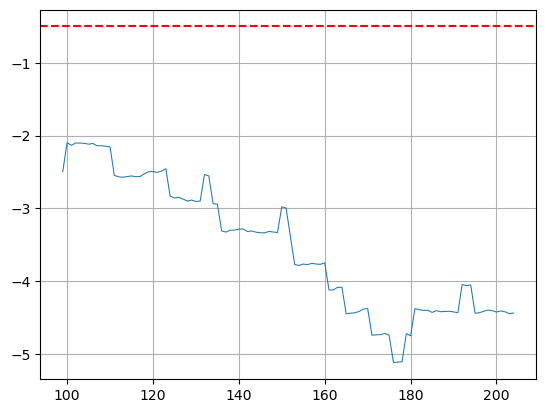

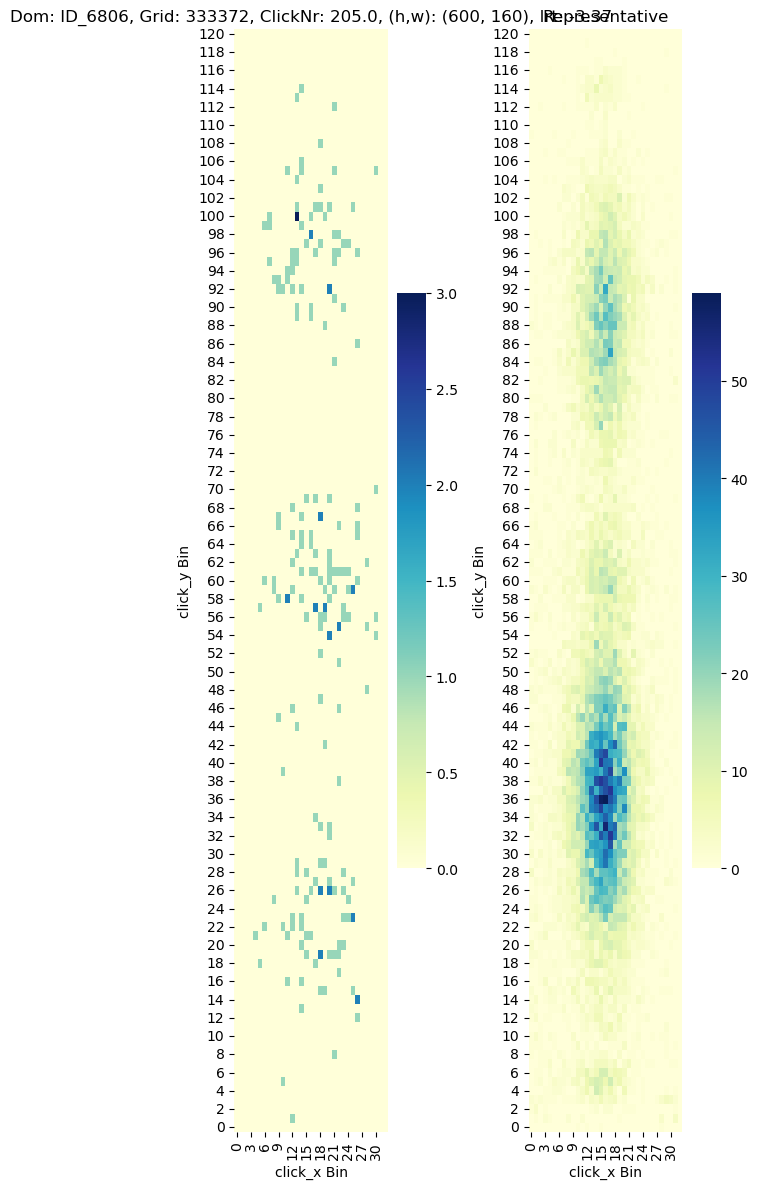

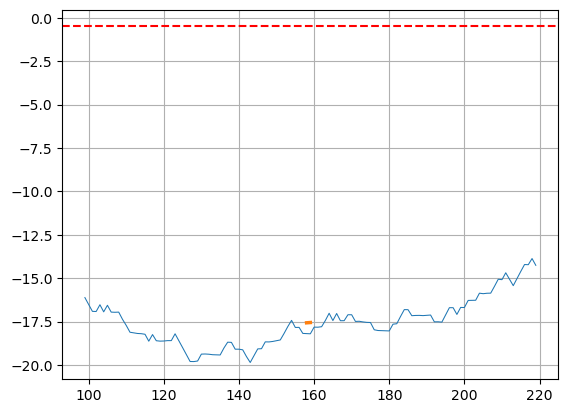

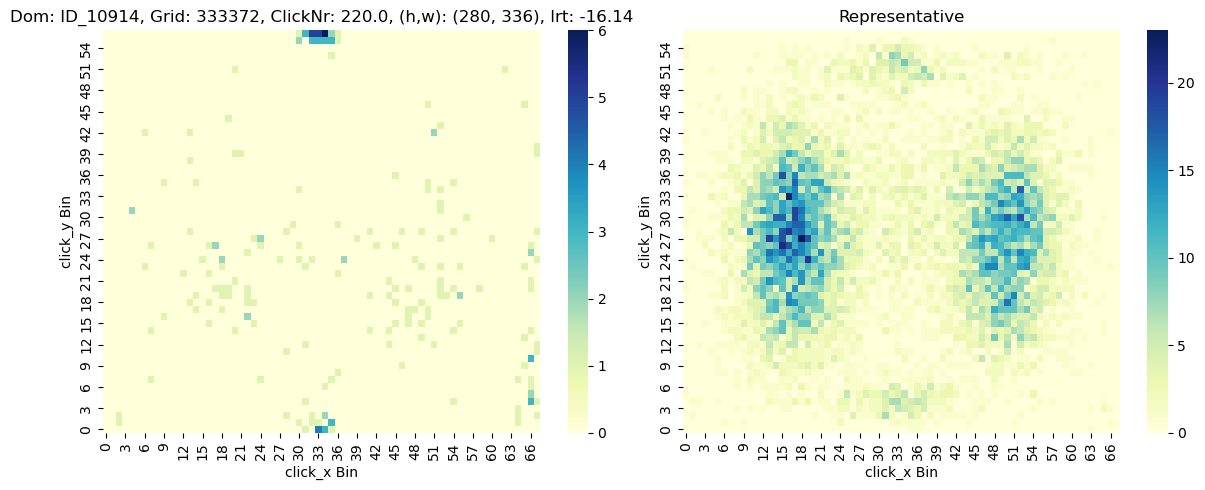

In [35]:
eps = 1e-20

count_ = 0
for i, (dh,dw,g_id,dom) in enumerate(data_subset):
    # broken or not?
    if y_true[i]!=1:
        continue

    if count_ > 10:
        break
    count_+=1
    
    data = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))),
                                columns=['click_x_bin', 'click_y_bin'])

    data_obs_rep = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                   (data_heatmap_ts.domain == representative_heatmap_ts_hw[(dh,dw)][g_id]) &
                                   (data_heatmap_ts.display_height==dh) & 
                                   (data_heatmap_ts.display_width==dw)]

    data_obs_rep['click_x_bin'] = (data_obs_rep.click_x/dw*(dw//5)).astype(int)
    data_obs_rep['click_y_bin'] = (data_obs_rep.click_y/dh*(dh//5)).astype(int)

    data_obs_rep = data_obs_rep.groupby(['click_x_bin','click_y_bin']).clicks.sum().reset_index()
    data_obs_rep['proba'] = data_obs_rep['clicks']/data_obs_rep['clicks'].sum()
    
    data_obs_rep = data_obs_rep.merge(data, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='right').fillna(0)

    data_obs_rep['proba'] = data_obs_rep.clicks/data_obs_rep.clicks.sum()

    data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                        on = ['click_x_bin','click_y_bin'], 
                        how='left' )

    data = data.fillna(0)

    # data_obs = "observed" heatmap for current domain_id = dom
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)
    
    from_obs = data_obs_1.sort_values(by='timestamp').merge(data, on=['click_x_bin','click_y_bin'], how='left').fillna(0)
    from_obs['logprob'] = np.log(from_obs['proba']+eps)

    from_obs_tot = from_obs.logprob.mean()
    from_obs_rolling = from_obs.rolling(window = 100)['logprob'].mean()
    from_obs_rolling_ts = pd.concat([data_obs_1[['timestamp']],from_obs_rolling],axis=1)
    
    ####################
    # "lrt" method:

    data_bad = db[(dh,dw)]
    data_bad_mirr = db_mirr[(dh,dw)]
    data_bad = data_bad_mirr
    
    data_obs_bad = data_obs_1.sort_values(by='timestamp').merge(data_bad, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)

    data_obs_bad['logprob'] = np.log(data_obs_bad['proba']+eps)
    data_obs_bad_tot = data_obs_bad.logprob.mean()
    data_obs_bad_rolling = data_obs_bad.rolling(window = 100)['logprob'].mean()
    data_obs_bad_rolling_ts = pd.concat([data_obs_bad[['timestamp']],data_obs_bad_rolling],axis=1)
    
    loglrtrolling = from_obs_rolling - data_obs_bad_rolling
    loglrtrolling_ts = from_obs_rolling_ts - data_obs_bad_rolling_ts
    loglrtrolling_ts['timestamp']= from_obs_rolling_ts['timestamp']
    loglrt_tot = from_obs_tot - data_obs_bad_tot

    plt.axhline(y=-0.5, color='red', linestyle='--')
    loglrtrolling.plot(linewidth = '.75')
    loglrtrolling.rolling(window=120).mean().shift(-60).plot(linewidth = '2.5')
    plt.grid()
    plt.show()
    tt = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))), 
                                  columns=['click_x_bin','click_y_bin'])
            
    xx = tt.merge(data_obs_1.groupby(['click_x_bin','click_y_bin']).sum().clicks.reset_index(), 
                  on = ['click_x_bin','click_y_bin'], 
                  how = 'left').fillna(0)
    
    click_matrix_1 = xx.pivot("click_y_bin", "click_x_bin", "clicks").fillna(0)
    click_matrix_2 = data_obs_rep.pivot("click_y_bin", "click_x_bin", "clicks").fillna(0)
    
    fig, axes = plt.subplots(1, 2, figsize=(dw // 50 * 2, dh // 50))
    sns.heatmap(click_matrix_1, ax=axes[0], cmap="YlGnBu", annot=False, cbar=True, fmt="g")
    axes[0].set_title(f'Dom: {dom}, Grid: {g_id}, ClickNr: {xx["clicks"].sum()}, (h,w): {dh,dw}, lrt: {loglrt_tot:.2f}')
    axes[0].set_xlabel('click_x Bin')
    axes[0].set_ylabel('click_y Bin')
    axes[0].invert_yaxis()
    
    sns.heatmap(click_matrix_2, ax=axes[1], cmap="YlGnBu", annot=False, cbar=True, fmt="g")
    axes[1].set_title(f'Representative')
    axes[1].set_xlabel('click_x Bin')
    axes[1].set_ylabel('click_y Bin')
    axes[1].invert_yaxis()
    fig.tight_layout()
    plt.show()

# return (end_time - start_time) / nb_banners, outputs, labels, domains

#### 2.3.1.2 Just result

Here we run the algorithm without any images -- this allows us to evaluate how the batch LRT model performs on the new data with differently sized banners.

We also keep track of the "rolling" dictionary, which encodes the loglrtrolling for each banner.

In [36]:
eps = 1e-20
lrts = []
rolling = {}

for (dh,dw,g_id,dom) in data_subset:
    data = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))),
                                columns=['click_x_bin', 'click_y_bin'])

    data_obs_rep = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                   (data_heatmap_ts.domain == representative_heatmap_ts_hw[(dh,dw)][g_id]) &
                                   (data_heatmap_ts.display_height==dh) & 
                                   (data_heatmap_ts.display_width==dw)]

    if data_obs_rep.clicks.sum() < 1000:
        lrts.append(float('nan'))
        continue
    
    data_obs_rep['click_x_bin'] = (data_obs_rep.click_x/dw*(dw//5)).astype(int)
    data_obs_rep['click_y_bin'] = (data_obs_rep.click_y/dh*(dh//5)).astype(int)
    # example['proba'] = example['clicks']/example['clicks'].sum()

    data_obs_rep = data_obs_rep.groupby(['click_x_bin','click_y_bin']).clicks.sum().reset_index()
    data_obs_rep['proba'] = data_obs_rep['clicks']/data_obs_rep['clicks'].sum()
    
    data_obs_rep = data_obs_rep.merge(data, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='right').fillna(0)

    data_obs_rep['proba'] = data_obs_rep.clicks/data_obs_rep.clicks.sum()

    data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                        on = ['click_x_bin','click_y_bin'], 
                        how='left' )

    data = data.fillna(0)

    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)
    
    from_obs = data_obs_1.sort_values(by='timestamp').merge(data, on=['click_x_bin','click_y_bin'], how='left').fillna(0)
    from_obs['logprob'] = np.log(from_obs['proba']+eps)

    from_obs_tot = from_obs.logprob.mean()
    from_obs_rolling = from_obs.rolling(window = 100)['logprob'].mean()
    from_obs_rolling_ts = pd.concat([data_obs_1[['timestamp']],from_obs_rolling],axis=1)
    
    ####################
    # "lrt" method:

    data_bad = db[(dh,dw)]
    data_bad_mirr = db_mirr[(dh,dw)]
    data_bad = data_bad_mirr
    
    data_obs_bad = data_obs_1.sort_values(by='timestamp').merge(data_bad, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)

    data_obs_bad['logprob'] = np.log(data_obs_bad['proba']+eps)
    data_obs_bad_tot = data_obs_bad.logprob.mean()
    data_obs_bad_rolling = data_obs_bad.rolling(window = 100)['logprob'].mean()
    data_obs_bad_rolling_ts = pd.concat([data_obs_bad[['timestamp']],data_obs_bad_rolling],axis=1)

    loglrtrolling = from_obs_rolling - data_obs_bad_rolling
    rolling[(dh,dw,g_id,dom)] = loglrtrolling
    
    loglrtrolling_ts = from_obs_rolling_ts - data_obs_bad_rolling_ts
    loglrtrolling_ts['timestamp']= from_obs_rolling_ts['timestamp']
    loglrt_tot = from_obs_tot - data_obs_bad_tot
    lrts.append(loglrt_tot)

#### 2.3.1.3 Evaluate

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
lrts = np.array(lrts)
f1_max = 0
t_max = 0
for thresh in np.arange(-5.,-1.,0.001):
    y_pred = (lrts < thresh).astype(int)
    y_pred = y_pred[~np.isnan(lrts)]
    f1 = f1_score(y_true[~np.isnan(lrts)], y_pred, average='macro')
    if f1 > f1_max:
        f1_max = f1
        t_max = thresh
        cm = confusion_matrix(y_true[~np.isnan(lrts)], y_pred)

print(f1_max,t_max, cm)

0.5852813852813853 -4.540999999999847 [[365  24]
 [ 71  19]]


### 2.3.2 Zero-Shot

Now let us focus on the zero-shot approach. To do so we need to develop good and bad representatives.

#### 2.3.2.1 Create Zero-shot "good" rep

We create the good representative using the "step" function, i.e. uniform in the center and no clicks on the boundary.

In [40]:
dg = {}
ex_dw = 300 # example.click_x.max()
ex_dh = 250 # example.click_y.max()

# border case
boxes_from_left = 25
boxes_from_right = 25
boxes_from_top = 25
boxes_from_bottom = 25
data = pd.DataFrame(list(product(range(0,ex_dw+1),range(0,ex_dh+1))), 
                    columns=['click_x', 'click_y'])

data['clicks'] = 1
data.loc[data.click_x < boxes_from_left, 'clicks'] = 0
data.loc[data.click_y < boxes_from_bottom, 'clicks'] = 0
data.loc[data.click_x > data.click_x.max() - boxes_from_right, 'clicks'] = 0
data.loc[data.click_y > data.click_y.max() - boxes_from_top, 'clicks'] = 0

data['proba'] = data['clicks']/data.clicks.sum()
# data['clicks'] = data['clicks']/np.sqrt(np.square(data['clicks']).sum(axis=0))

example = data

# dh, dw = 600, 300
for i in data_heatmap_ts[['display_height','display_width']].drop_duplicates().index:
    (dh,dw) = data_heatmap_ts.iloc[i][['display_height','display_width']].values
    example['click_x_bin'] = (example.click_x/ex_dw*(dw//5)).round().astype(int)
    example['click_y_bin'] = (example.click_y/ex_dh*(dh//5)).round().astype(int)
    
    tt = pd.DataFrame(list(product(range(0,example.click_x_bin.max()+1), range(0,example.click_y_bin.max()+1))), 
                          columns=['click_x_bin', 'click_y_bin'])
    
    example_merged = tt.merge(example, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
    
    data_bad = example_merged.groupby(['click_x_bin','click_y_bin']).proba.sum().reset_index()
    data_bad = data_bad.rename(columns={'proba_comb':'proba'})

    dg[(dh,dw)] = data_bad

Plot an example (the way we project is a bit dirty and therefore we see these stripes -- don't think this is a huge issue but probably should be cleaned up)

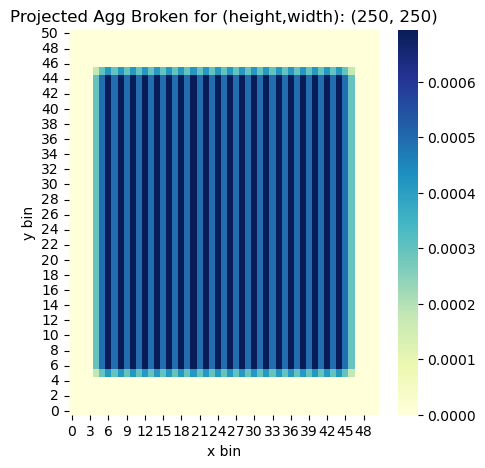

In [42]:
# plot an example:
ii = data_heatmap_ts[['display_height','display_width']].drop_duplicates().index[2]
(dh,dw) = data_heatmap_ts.iloc[ii][['display_height','display_width']].values
(dh,dw) = (250,250)

click_matrix = dg[(dh,dw)].groupby(['click_x_bin','click_y_bin']).proba.sum().reset_index().pivot("click_y_bin",
                                                      "click_x_bin",
                                                      "proba").fillna(0)
plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Projected Agg Broken for (height,width): {dh,dw}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

#### 2.3.2.2 Some Visualizations

We take the mirrored and unmirrored broken banners from the 250x300 case and project it onto the new dimensions (as above) --> bad rep
Good rep --> defined in above subsection.


As before, the following code is for drawing pictures. Again leave it as it might be instructive.

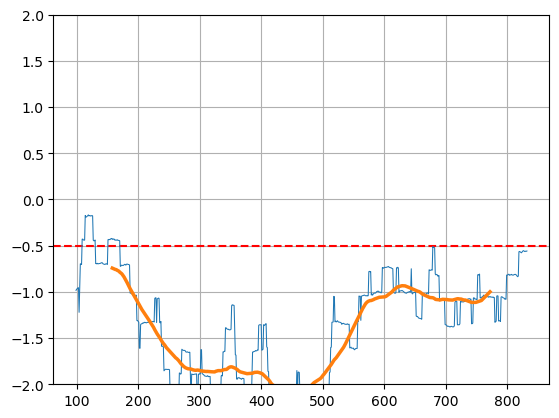

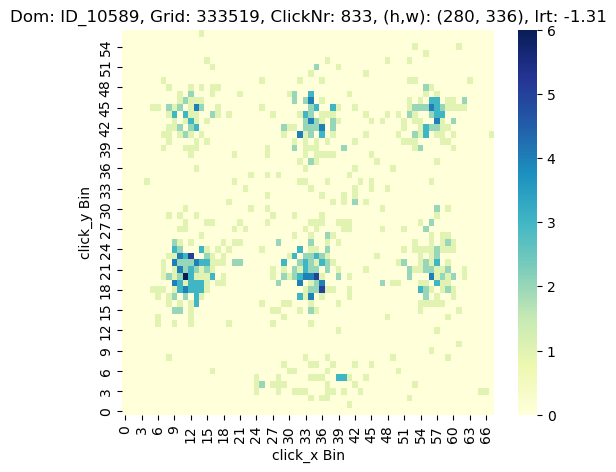

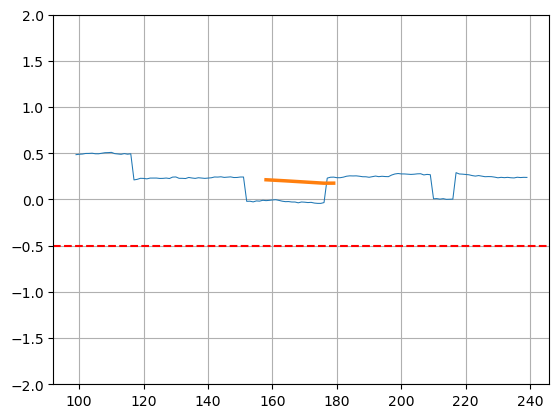

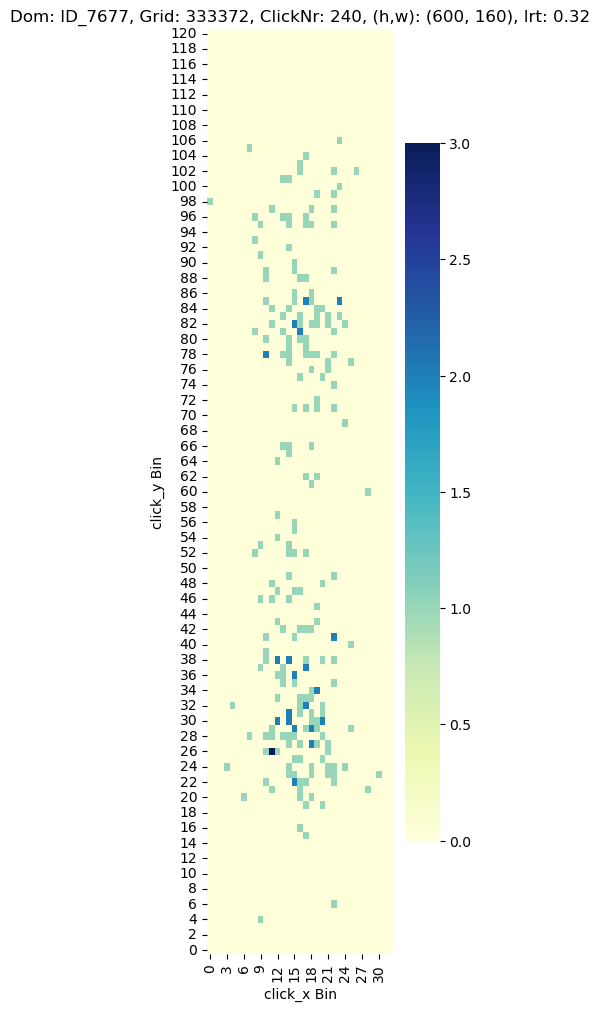

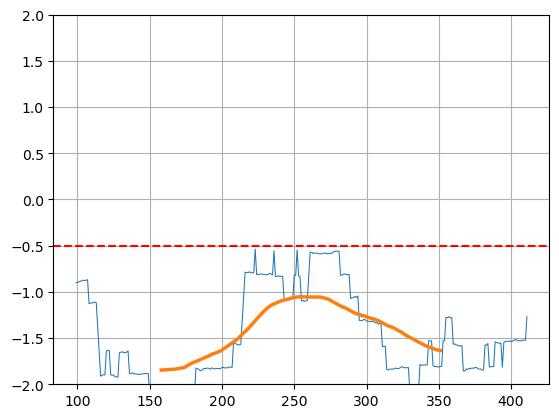

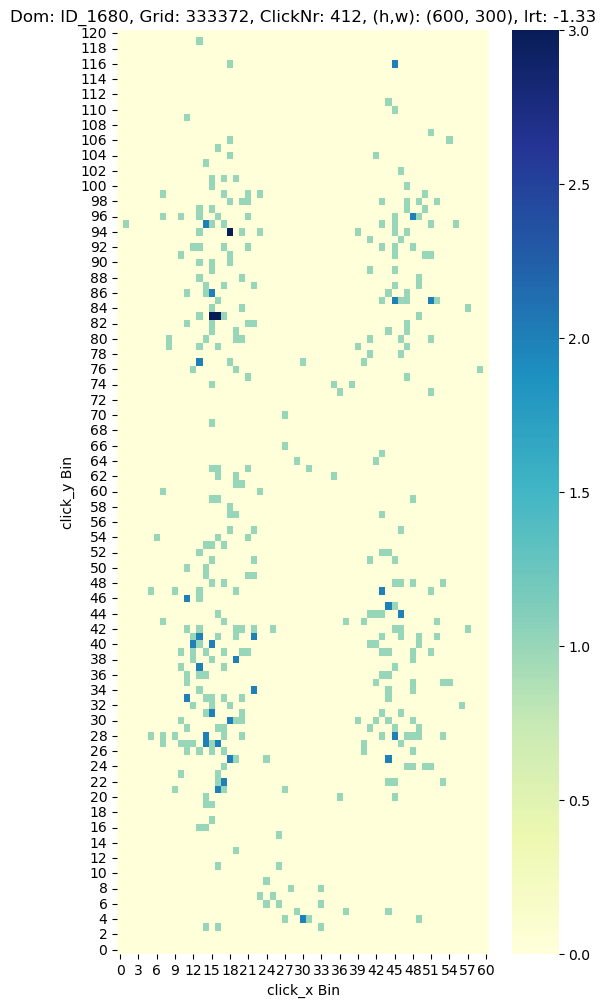

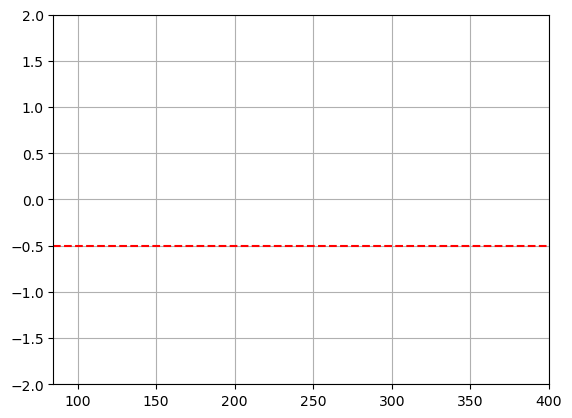

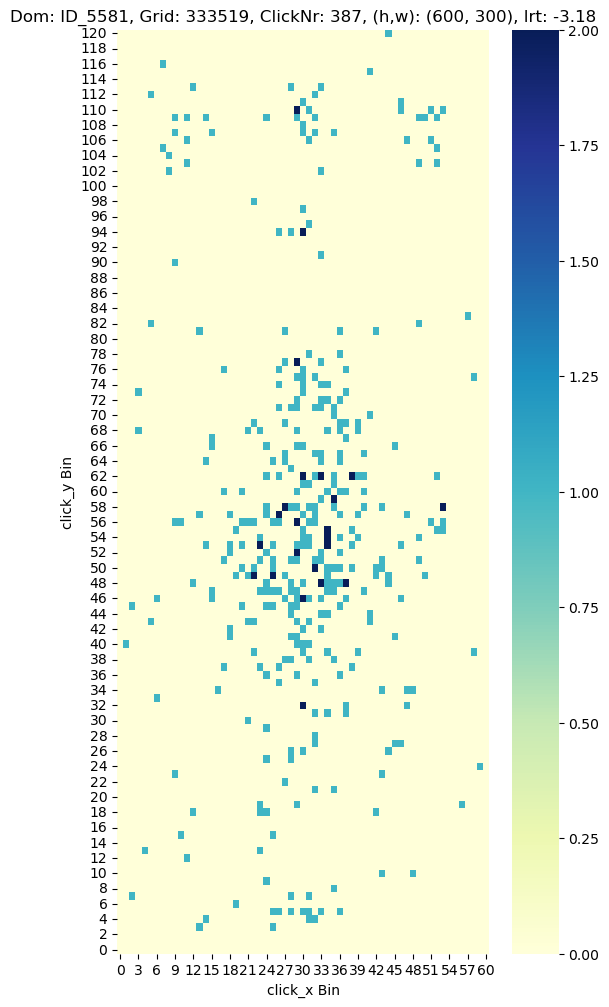

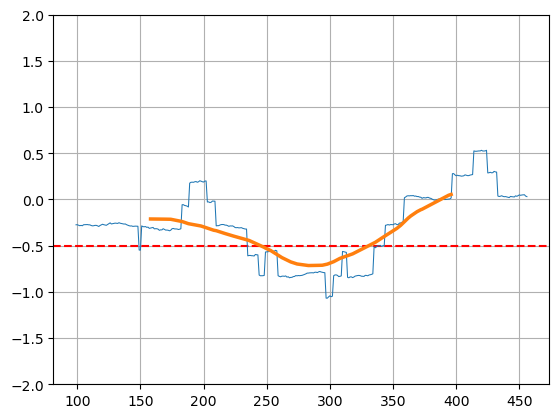

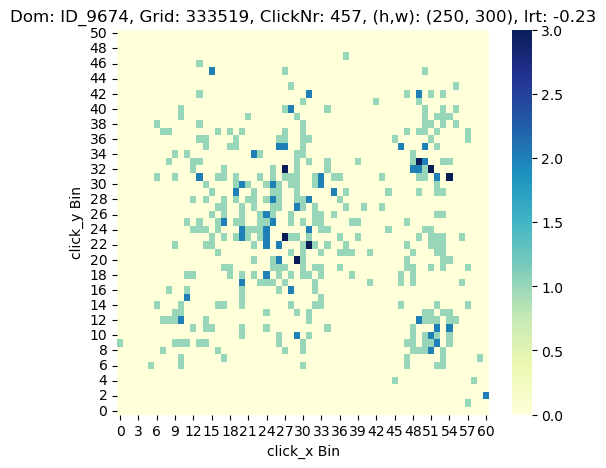

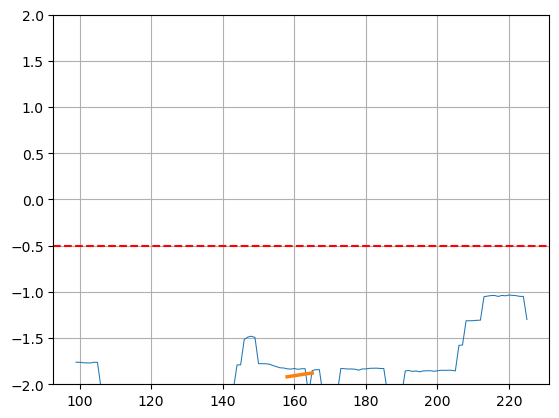

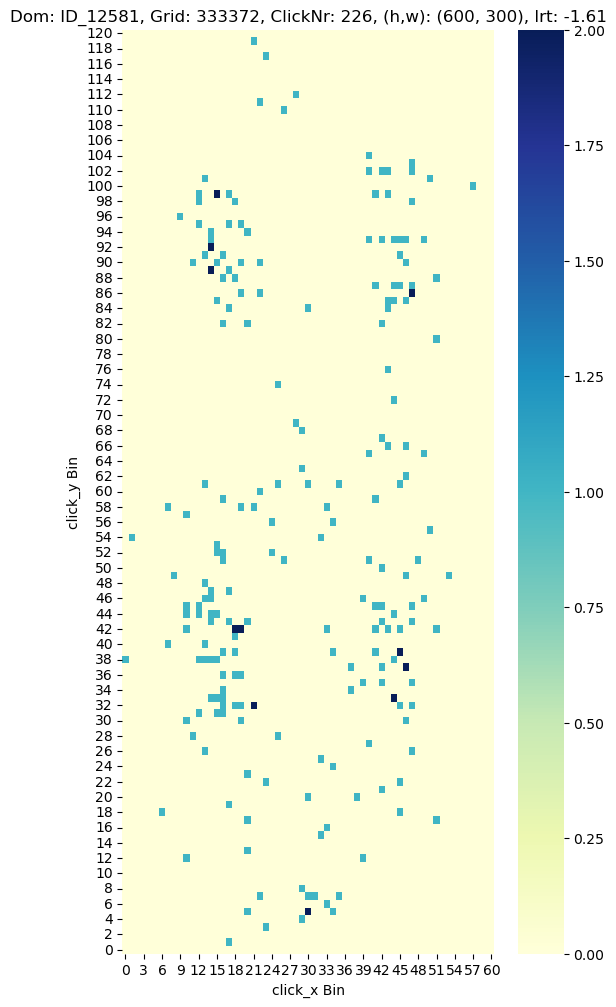

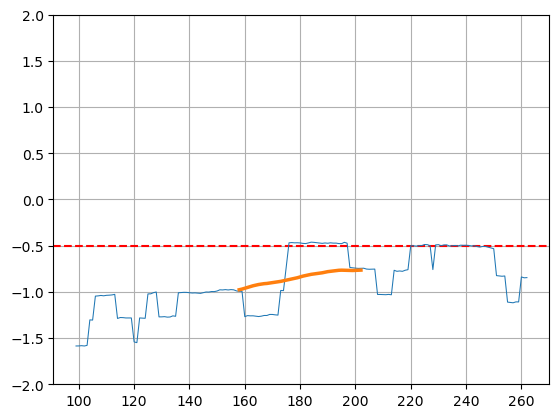

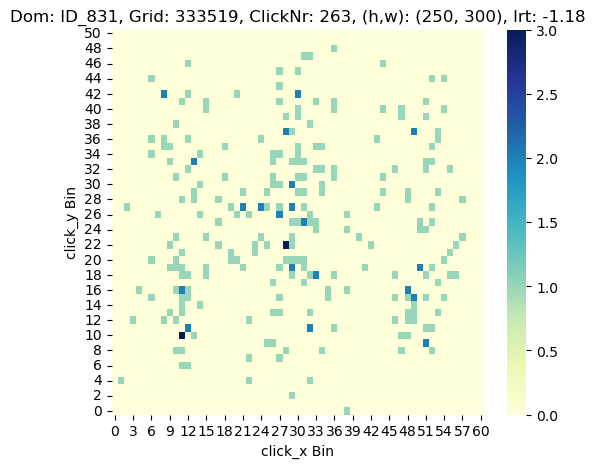

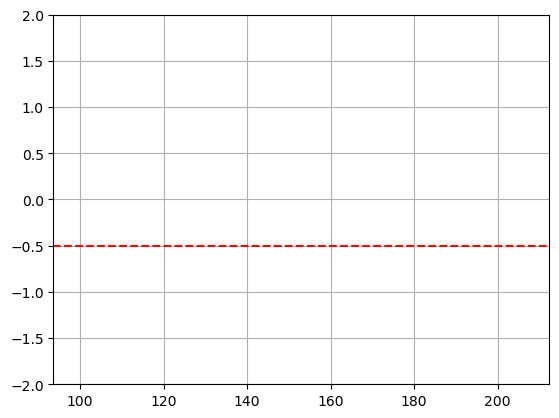

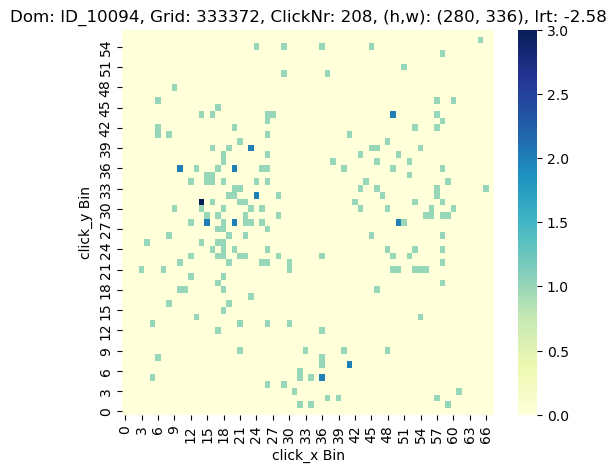

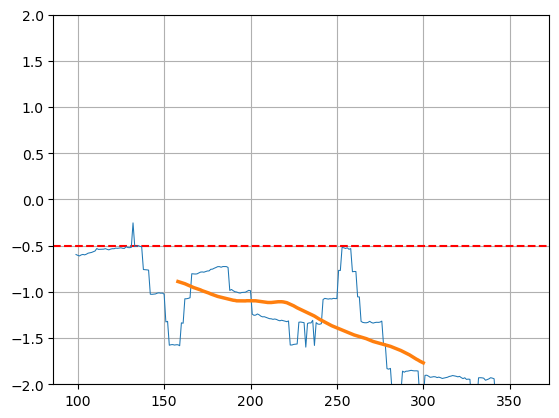

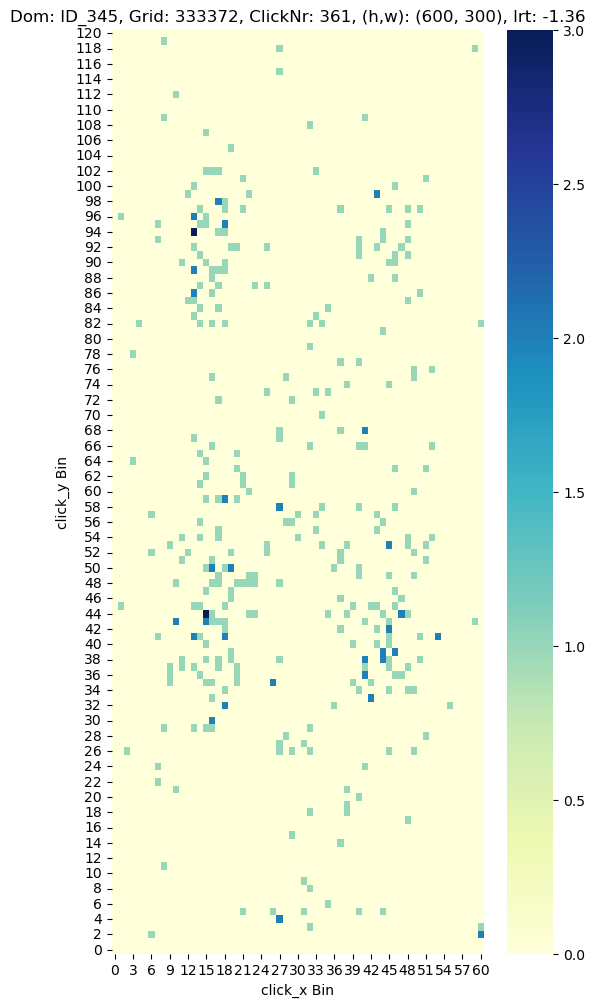

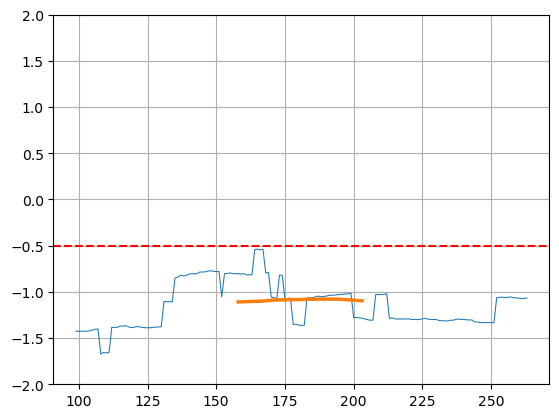

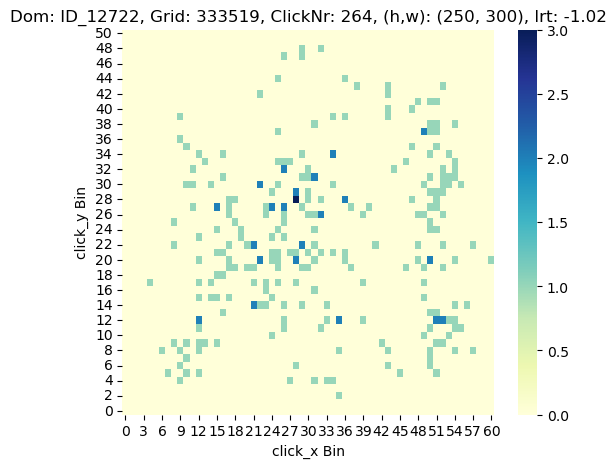

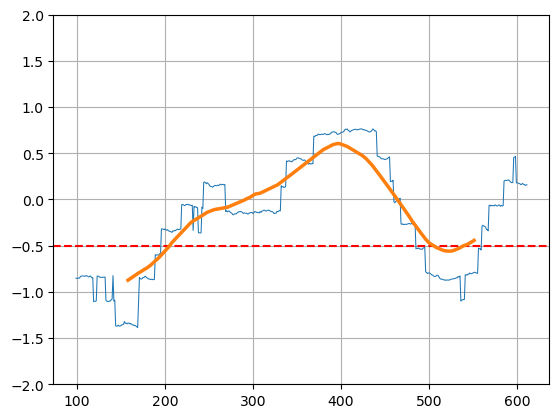

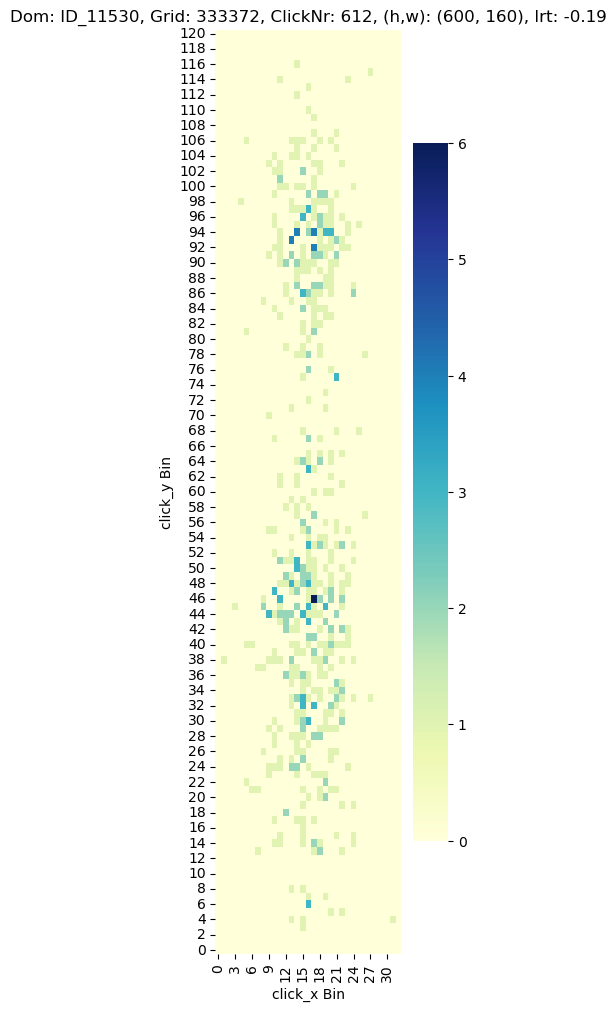

In [43]:
# import time
# start_time = time.time()
# avoid dividing by 0:
eps = 1e-15
lrt_zero = []
cnt = 0
for (dh,dw,g_id,dom) in data_subset:
    if cnt > 10:
        break
    cnt+=1
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)
    
    ####################
    # good:
    
    data_good = dg[(dh,dw)]
    from_obs = data_obs_1.sort_values(by='timestamp').merge(data_good, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)
    from_obs['logprob'] = np.log(from_obs['proba']+eps)*from_obs['clicks']
    from_obs_tot = from_obs.logprob.mean()
    
    from_obs_rolling = from_obs.rolling(window = 100)['logprob'].mean()
    from_obs_rolling_ts = pd.concat([data_obs_1[['timestamp']],from_obs_rolling],axis=1)
    
    ####################
    # bad:

    data_bad = db[(dh,dw)]
    data_obs_bad = data_obs_1.sort_values(by='timestamp').merge(data_bad, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)
    data_obs_bad['logprob'] = np.log(data_obs_bad['proba']+eps)
    data_obs_bad_tot = data_obs_bad.logprob.mean()
    
    data_obs_bad_rolling = data_obs_bad.rolling(window = 100)['logprob'].mean()
    data_obs_bad_rolling_ts = pd.concat([data_obs_bad[['timestamp']],data_obs_bad_rolling],axis=1)

    ####################
    # combine:
    
    loglrtrolling     = (from_obs_rolling - data_obs_bad_rolling)
    loglrtrolling_ts  = (from_obs_rolling_ts - data_obs_bad_rolling_ts)
    loglrtrolling_ts['timestamp'] = from_obs_rolling_ts['timestamp']
    loglrt_tot        = (from_obs_tot - data_obs_bad_tot)

    plt.axhline(y=-0.5, color='red', linestyle='--')
    loglrtrolling.plot(linewidth = '.75')
    loglrtrolling.rolling(window=120).mean().shift(-60).plot(linewidth = '2.5')
    plt.ylim(-2,2)
    plt.grid()
    plt.show()

    # loglrtrolling_ts.dropna().set_index('timestamp').plot(linewidth = '.75')
    # loglrtrolling_ts.rolling(window=120).mean().shift(-60).dropna().set_index('timestamp').plot(linewidth = '2.5')
    # plt.ylim(-2,2)
    # plt.grid()
    # plt.show()
    # loglrt.rolling(window = 10).mean().diff(10).plot()
    # plt.show()

    tt = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))), 
                                  columns=['click_x_bin','click_y_bin'])
            
    xx = tt.merge(data_obs_1.groupby(['click_x_bin','click_y_bin']).sum().clicks.reset_index(), 
                  on = ['click_x_bin','click_y_bin'], 
                  how = 'left').fillna(0)
    
    click_matrix = xx.pivot("click_y_bin", "click_x_bin", "clicks").fillna(0)
    
    plt.figure(figsize=(dw//50,dh//50))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")
    plt.title(f'Dom: {dom}, Grid: {g_id}, ClickNr: {data_obs_1.clicks.sum()}, (h,w): {dh,dw}, lrt: {loglrt_tot:.2f}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    plt.show()
    

#### 2.3.2.3 Just result (non-mirrored 'bad' representative)

In [44]:
# import time
# start_time = time.time()
# avoid dividing by 0:
eps = 1e-15
lrt_zero = []
for (dh,dw,g_id,dom) in data_subset:
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)
    
    ####################
    # good:
    
    data_good = dg[(dh,dw)]
    from_obs = data_obs_1.sort_values(by='timestamp').merge(data_good, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)
    from_obs['logprob'] = np.log(from_obs['proba']+eps)*from_obs['clicks']
    from_obs_tot = from_obs.logprob.mean()
    
    from_obs_rolling = from_obs.rolling(window = 100)['logprob'].mean()
    from_obs_rolling_ts = pd.concat([data_obs_1[['timestamp']],from_obs_rolling],axis=1)
    
    ####################
    # bad:

    data_bad = db[(dh,dw)]
    data_obs_bad = data_obs_1.sort_values(by='timestamp').merge(data_bad, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)
    data_obs_bad['logprob'] = np.log(data_obs_bad['proba']+eps)
    data_obs_bad_tot = data_obs_bad.logprob.mean()
    
    data_obs_bad_rolling = data_obs_bad.rolling(window = 100)['logprob'].mean()
    data_obs_bad_rolling_ts = pd.concat([data_obs_bad[['timestamp']],data_obs_bad_rolling],axis=1)

    ####################
    # combine:
    
    loglrtrolling     = (from_obs_rolling - data_obs_bad_rolling)
    loglrtrolling_ts  = (from_obs_rolling_ts - data_obs_bad_rolling_ts)
    loglrtrolling_ts['timestamp'] = from_obs_rolling_ts['timestamp']
    loglrt_tot        = (from_obs_tot - data_obs_bad_tot)
    lrt_zero.append(loglrt_tot)


#### 2.3.2.4 Evaluate (non-mirrored case)

In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
lrt_zero = np.array(lrt_zero)
f1_max = 0
t_max = 0
for thresh in np.arange(-12.,12.,0.1):
    y_pred = (lrt_zero < thresh).astype(int)
    f1 = f1_score(y_true, y_pred, average='macro')
    if f1 > f1_max:
        f1_max = f1
        t_max = thresh
        cm = confusion_matrix(y_true, y_pred)

print(f1_max,t_max, cm)

0.6016615558600291 -1.4000000000000377 [[275 117]
 [ 35  55]]


#### 2.3.2.5 Just result (mirrored 'bad' representative)

In [46]:
# import time
# start_time = time.time()
# avoid dividing by 0:
eps = 1e-15
lrt_zero = []
for (dh,dw,g_id,dom) in data_subset:
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)
    
    ####################
    # good:
    
    data_good = dg[(dh,dw)]
    from_obs = data_obs_1.sort_values(by='timestamp').merge(data_good, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)
    from_obs['logprob'] = np.log(from_obs['proba']+eps)*from_obs['clicks']
    from_obs_tot = from_obs.logprob.mean()
    
    from_obs_rolling = from_obs.rolling(window = 100)['logprob'].mean()
    from_obs_rolling_ts = pd.concat([data_obs_1[['timestamp']],from_obs_rolling],axis=1)
    
    ####################
    # bad:

    data_bad = db_mirr[(dh,dw)]
    data_obs_bad = data_obs_1.sort_values(by='timestamp').merge(data_bad, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)
    data_obs_bad['logprob'] = np.log(data_obs_bad['proba']+eps)
    data_obs_bad_tot = data_obs_bad.logprob.mean()
    
    data_obs_bad_rolling = data_obs_bad.rolling(window = 100)['logprob'].mean()
    data_obs_bad_rolling_ts = pd.concat([data_obs_bad[['timestamp']],data_obs_bad_rolling],axis=1)

    ####################
    # combine:
    
    loglrtrolling     = (from_obs_rolling - data_obs_bad_rolling)
    loglrtrolling_ts  = (from_obs_rolling_ts - data_obs_bad_rolling_ts)
    loglrtrolling_ts['timestamp'] = from_obs_rolling_ts['timestamp']
    loglrt_tot        = (from_obs_tot - data_obs_bad_tot)
    lrt_zero.append(loglrt_tot)


#### 2.3.2.6 Evaluate (mirrored case)

In [352]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
lrt_zero = np.array(lrt_zero)
f1_max = 0
t_max = 0
for thresh in np.arange(-12.,12.,0.001):
    y_pred = (lrt_zero < thresh).astype(int)
    f1 = f1_score(y_true, y_pred, average='macro')
    if f1 > f1_max:
        f1_max = f1
        t_max = thresh
        cm = confusion_matrix(y_true, y_pred)

print(f1_max,t_max, cm)

0.6140003768607499 -1.8420000000056298 [[298  94]
 [ 42  48]]


## 3. Some Baselines

Since the LRT methods do not perform very well, we were wondering if it's an issue with the method or with the data. Therefore, we run a few simple baselines.


### 3.1 Baseline I (Overlap with Frame-only heatmap)

The first case is to just take the (projected) frame heatmap and compute the overlap (similarity) with a sample banner. If the similarity is small, it is classified as an unbroken banner, else it's broken.

We first generate the relevant heatmap projected to the respective sizes.

#### 3.1.1 Create frame heatmap

In [47]:
baseline = {}
ex_dw = 300 # example.click_x.max()
ex_dh = 250 # example.click_y.max()

# border case
boxes_from_left = 25
boxes_from_right = 25
boxes_from_top = 25
boxes_from_bottom = 25
data = pd.DataFrame(list(product(range(0,ex_dw+1),range(0,ex_dh+1))), 
                    columns=['click_x', 'click_y'])

data['clicks'] = 0
data.loc[data.click_x < boxes_from_left, 'clicks'] = 1
data.loc[data.click_y < boxes_from_bottom, 'clicks'] = 1
data.loc[data.click_x > data.click_x.max() - boxes_from_right, 'clicks'] = 1
data.loc[data.click_y > data.click_y.max() - boxes_from_top, 'clicks'] = 1

data['proba'] = data['clicks']/data.clicks.sum()
# data['clicks'] = data['clicks']/np.sqrt(np.square(data['clicks']).sum(axis=0))

example = data

# dh, dw = 600, 300
for i in data_heatmap_ts[['display_height','display_width']].drop_duplicates().index:
    (dh,dw) = data_heatmap_ts.iloc[i][['display_height','display_width']].values
    example['click_x_bin'] = (example.click_x/ex_dw*(dw//5)).round().astype(int)
    example['click_y_bin'] = (example.click_y/ex_dh*(dh//5)).round().astype(int)
    
    tt = pd.DataFrame(list(product(range(0,example.click_x_bin.max()+1), range(0,example.click_y_bin.max()+1))), 
                          columns=['click_x_bin', 'click_y_bin'])
    
    example_merged = tt.merge(example, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
    
    data_bad = example_merged.groupby(['click_x_bin','click_y_bin']).proba.sum().reset_index()
    data_bad = data_bad.rename(columns={'proba_comb':'proba'})

    baseline[(dh,dw)] = data_bad

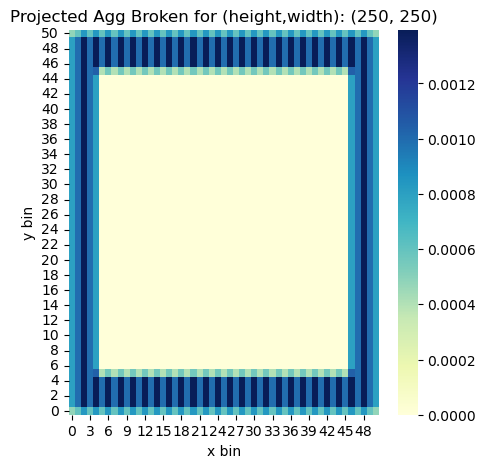

In [48]:
# plot an example:
ii = data_heatmap_ts[['display_height','display_width']].drop_duplicates().index[2]
(dh,dw) = data_heatmap_ts.iloc[ii][['display_height','display_width']].values
(dh,dw) = (250,250)

click_matrix = baseline[(dh,dw)].groupby(['click_x_bin','click_y_bin']).proba.sum().reset_index().pivot("click_y_bin",
                                                      "click_x_bin",
                                                      "proba").fillna(0)
plt.figure(figsize=(dw//50,dh//50))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Projected Agg Broken for (height,width): {dh,dw}')
plt.xlabel('x bin')
plt.ylabel('y bin')
plt.gca().invert_yaxis() 
plt.show()

#### 3.1.2 Run Algo

In [49]:
ssums = []
ccoss = []

for (dh,dw,g_id,dom) in data_subset:
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)

    do = data_obs_1.groupby(['click_x_bin','click_y_bin']).clicks.sum().reset_index()
    do['proba_left'] = do['clicks']/do['clicks'].sum()
    
    mm = do.merge(baseline[(dh,dw)], on = ['click_x_bin','click_y_bin'], how = 'right').fillna(0)
    ss = (mm.proba_left*mm.proba).sum()
    cc = (mm.proba_left*mm.proba).sum()/np.linalg.norm(mm.proba_left)/np.linalg.norm(mm.proba)
    ssums.append(ss)
    ccoss.append(cc)
    

#### 3.1.3 Evaluate

In [50]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
ccoss = np.array(ccoss)
f1_max = 0
t_max = 0
for thresh in np.arange(-1.,1.,0.0001):
    y_pred = (ccoss > thresh).astype(int)
    f1 = f1_score(y_true, y_pred, average='macro')
    if f1 > f1_max:
        f1_max = f1
        t_max = thresh
        cm = confusion_matrix(y_true, y_pred)

print(f1_max,t_max, cm)

0.5720371773254156 0.0632999999998829 [[352  40]
 [ 69  21]]


### 3.2 Baseline II

This baseline is a version of 1-shot learning where we compute the cosine similarity against the representative heatmap. If the value is too small (i.e. they do not overlap significantly), the banner is broken else not broken.

#### 3.2.1 Run Algo

In [51]:
ssums = []
ccoss = []

for (dh,dw,g_id,dom) in data_subset:
    data = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))),
                                columns=['click_x_bin', 'click_y_bin'])
    data_obs_rep = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                   (data_heatmap_ts.domain == representative_heatmap_ts_hw[(dh,dw)][g_id]) &
                                   (data_heatmap_ts.display_height==dh) & 
                                   (data_heatmap_ts.display_width==dw)]
    data_obs_rep['click_x_bin'] = (data_obs_rep.click_x/dw*(dw//5)).astype(int)
    data_obs_rep['click_y_bin'] = (data_obs_rep.click_y/dh*(dh//5)).astype(int)

    data_obs_rep = data_obs_rep.groupby(['click_x_bin','click_y_bin']).clicks.sum().reset_index()
    data_obs_rep['proba'] = data_obs_rep['clicks']/data_obs_rep['clicks'].sum()
    
    data_obs_rep = data_obs_rep.merge(data, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='right').fillna(0)
    data_obs_rep['proba'] = data_obs_rep.clicks/data_obs_rep.clicks.sum()
    data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                        on = ['click_x_bin','click_y_bin'], 
                        how='left' ).fillna(0)

    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)

    do = data_obs_1.groupby(['click_x_bin','click_y_bin']).clicks.sum().reset_index()
    do['proba_left'] = do['clicks']/do['clicks'].sum()
    
    mm = do.merge(data, on = ['click_x_bin','click_y_bin'], how = 'right').fillna(0)
    ss = (mm.proba_left*mm.proba).sum()
    cc = (mm.proba_left*mm.proba).sum()/np.linalg.norm(mm.proba_left)/np.linalg.norm(mm.proba)
    ssums.append(ss)
    ccoss.append(cc)
    

#### 3.2.2 Evaluate (cosine similarity)

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
ccoss = np.array(ccoss)
f1_max = 0
t_max = 0
for thresh in np.arange(-1.,1.,0.0001):
    y_pred = (ccoss < thresh).astype(int)
    f1 = f1_score(y_true, y_pred, average='macro')
    if f1 > f1_max:
        f1_max = f1
        t_max = thresh
        cm = confusion_matrix(y_true, y_pred)

print(f1_max,t_max, cm)

0.7714624388798341 0.2776999999998593 [[365  27]
 [ 37  53]]


#### 3.2.2 Evaluate (inner product without normalization)

In [53]:
ssums = np.array(ssums)
f1_max = 0
t_max = 0
for thresh in np.arange(-1.,1.,0.0001):
    y_pred = (ssums < thresh).astype(int)
    f1 = f1_score(y_true, y_pred, average='macro')
    if f1 > f1_max:
        f1_max = f1
        t_max = thresh
        cm = confusion_matrix(y_true, y_pred)

print(f1_max,t_max, cm)

0.6295595625184748 0.0003999999998898218 [[324  68]
 [ 49  41]]


# 4. Time-Series Exploration

In this section we explore the time-series logic to see whether it helps with classification. To do so, we need to find examples, where the heatmap breaks during the 12 day time-span of the data. --> turns out there are very few such examples, which makes studying this idea hard. Nonetheless, we provide some code here of how one could approach it.

### 4.1 Find Examples with the largest difference in LR for the start and end of the data

We need the rolling dictionary from section 2.3.1 (i.e. the 1-shot approach).

In [54]:
ddiff_l = []
# (dh,dw,g_id,dom)
for roll in rolling:
    (dh,dw,g_id,dom) = roll
    ddiff = {}
    diff = rolling[roll].dropna().iloc[:50].mean() - rolling[roll].dropna().iloc[-50:].mean()
    ddiff['dh']   = dh
    ddiff['dw']   = dw
    ddiff['g_id'] = g_id
    ddiff['dom']  = dom
    ddiff['diff']  = diff
    ddiff_l.append(ddiff)

ddiff_pd = pd.DataFrame(ddiff_l)

### 4.2 Visualization of Top 10 cases with significant differences:

For the time series curve, we provide the cumulative LRT and the rolling LRT (as well as their smoothed versions). We see that the cumulative curve is much slower in adapting to the degeneration (which of course makes sense). We believe that the rolling window approach will provide the best and earliest way to determine when a banner is degenerating.

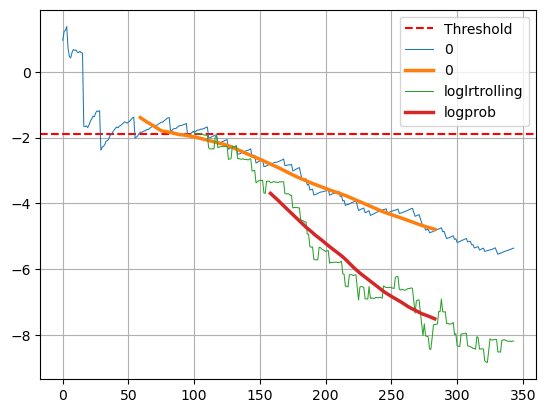

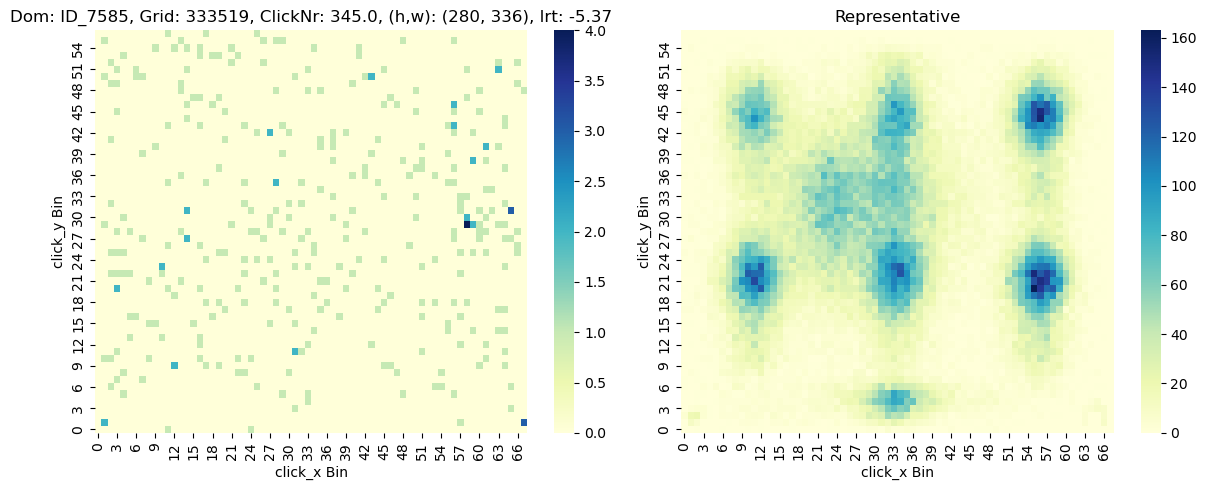

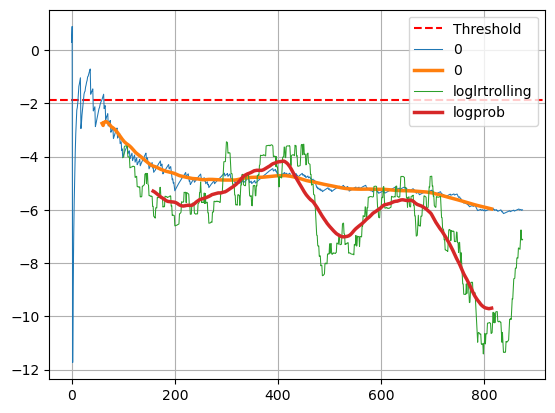

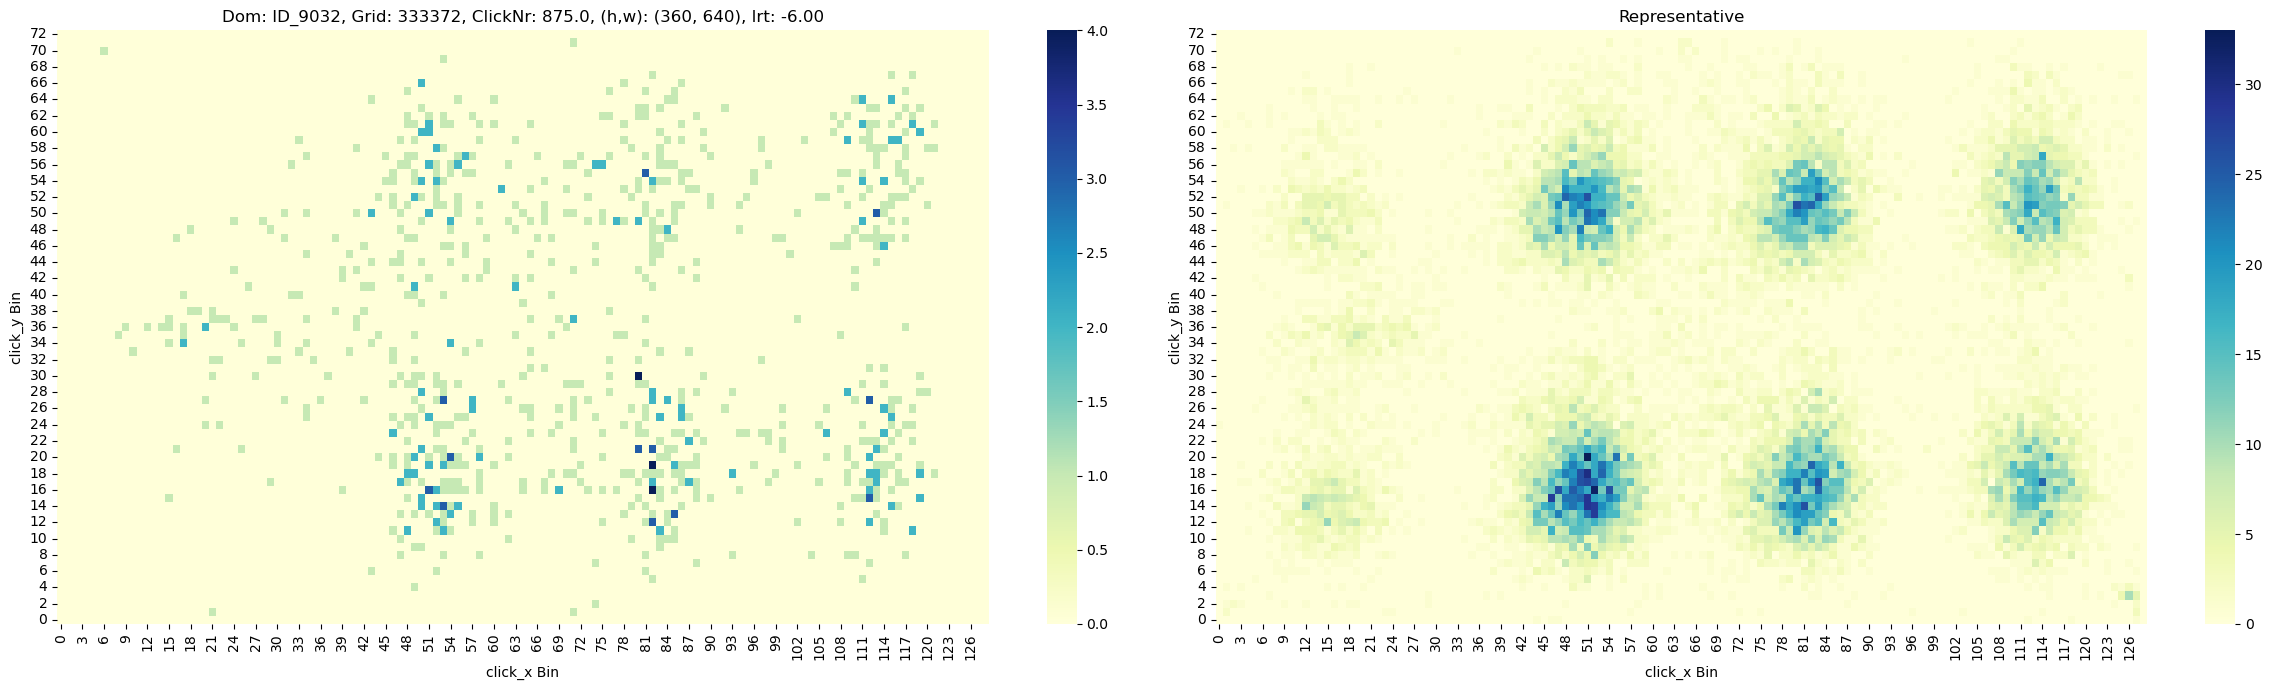

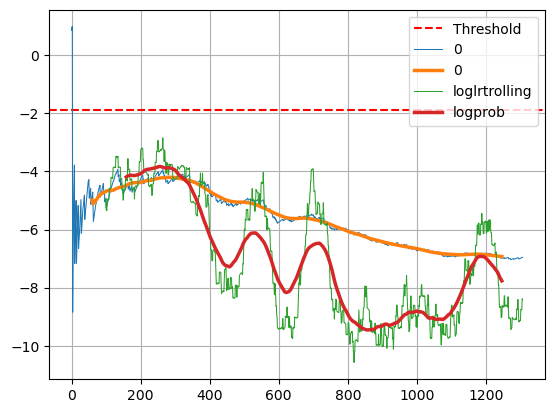

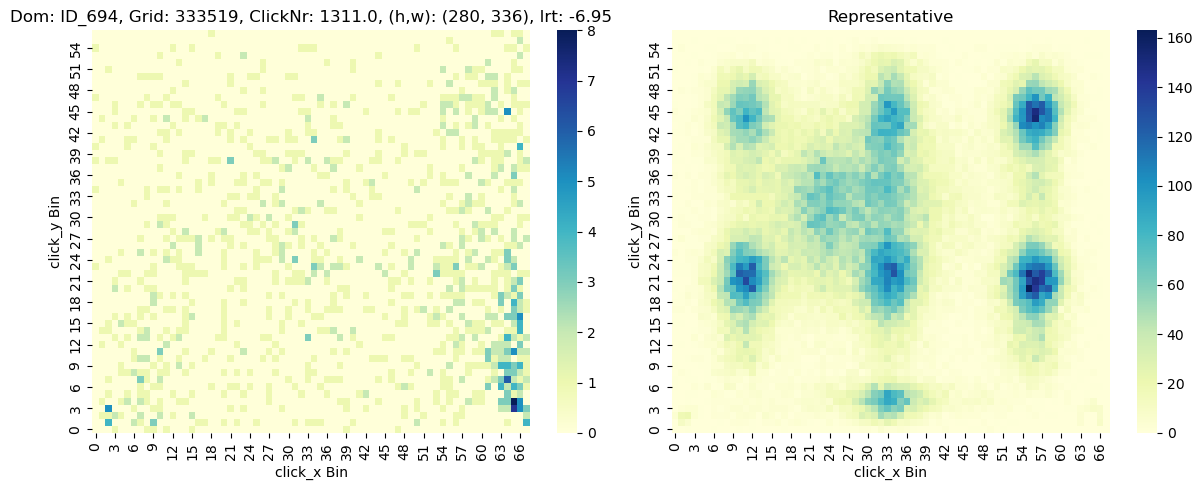

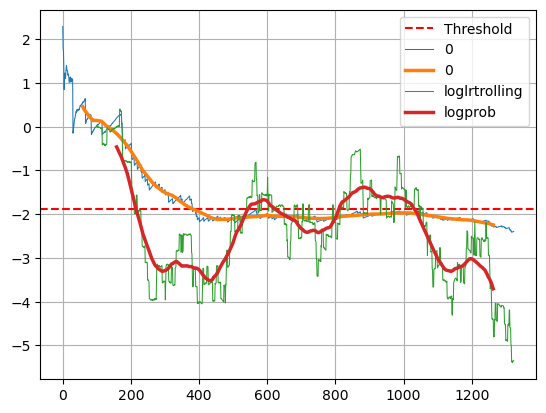

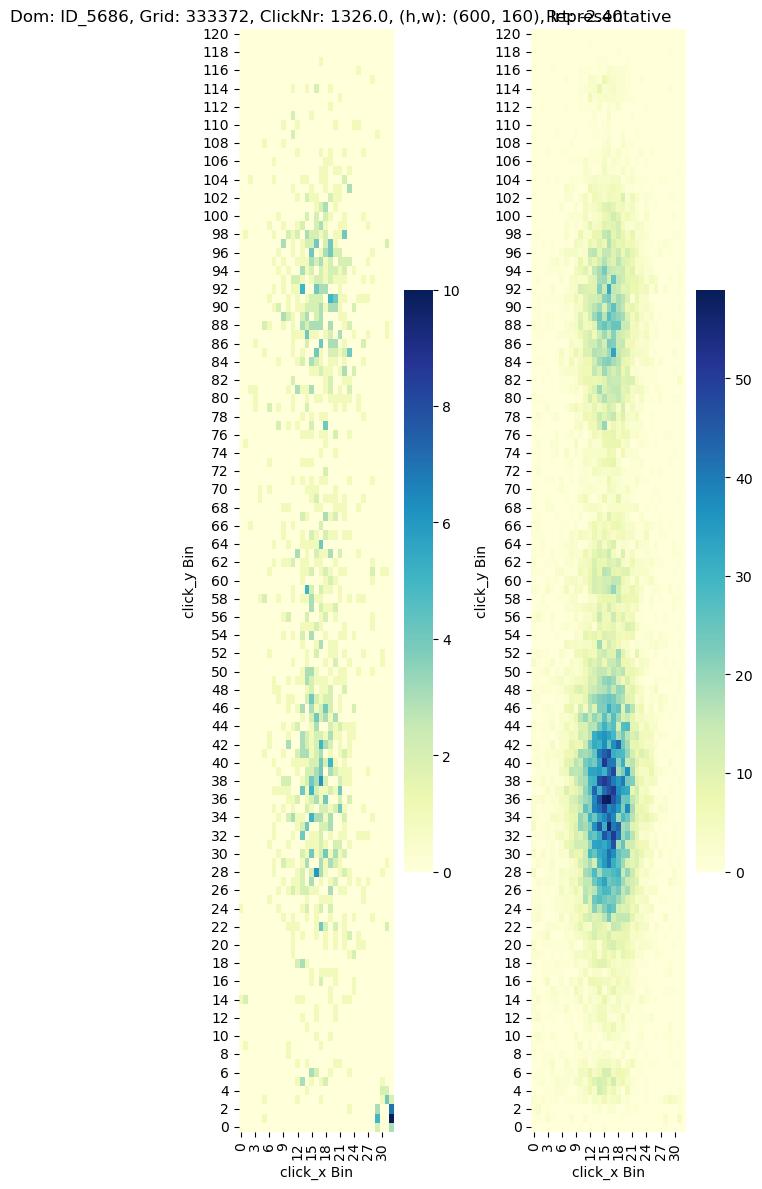

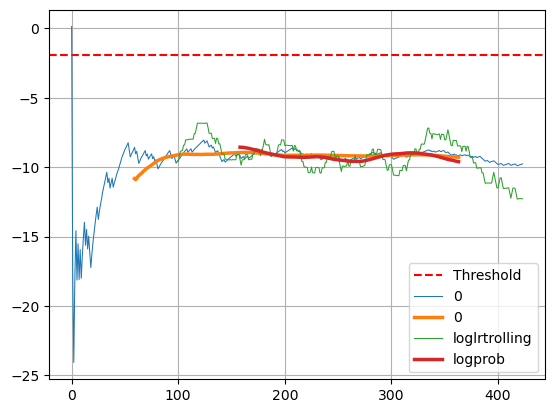

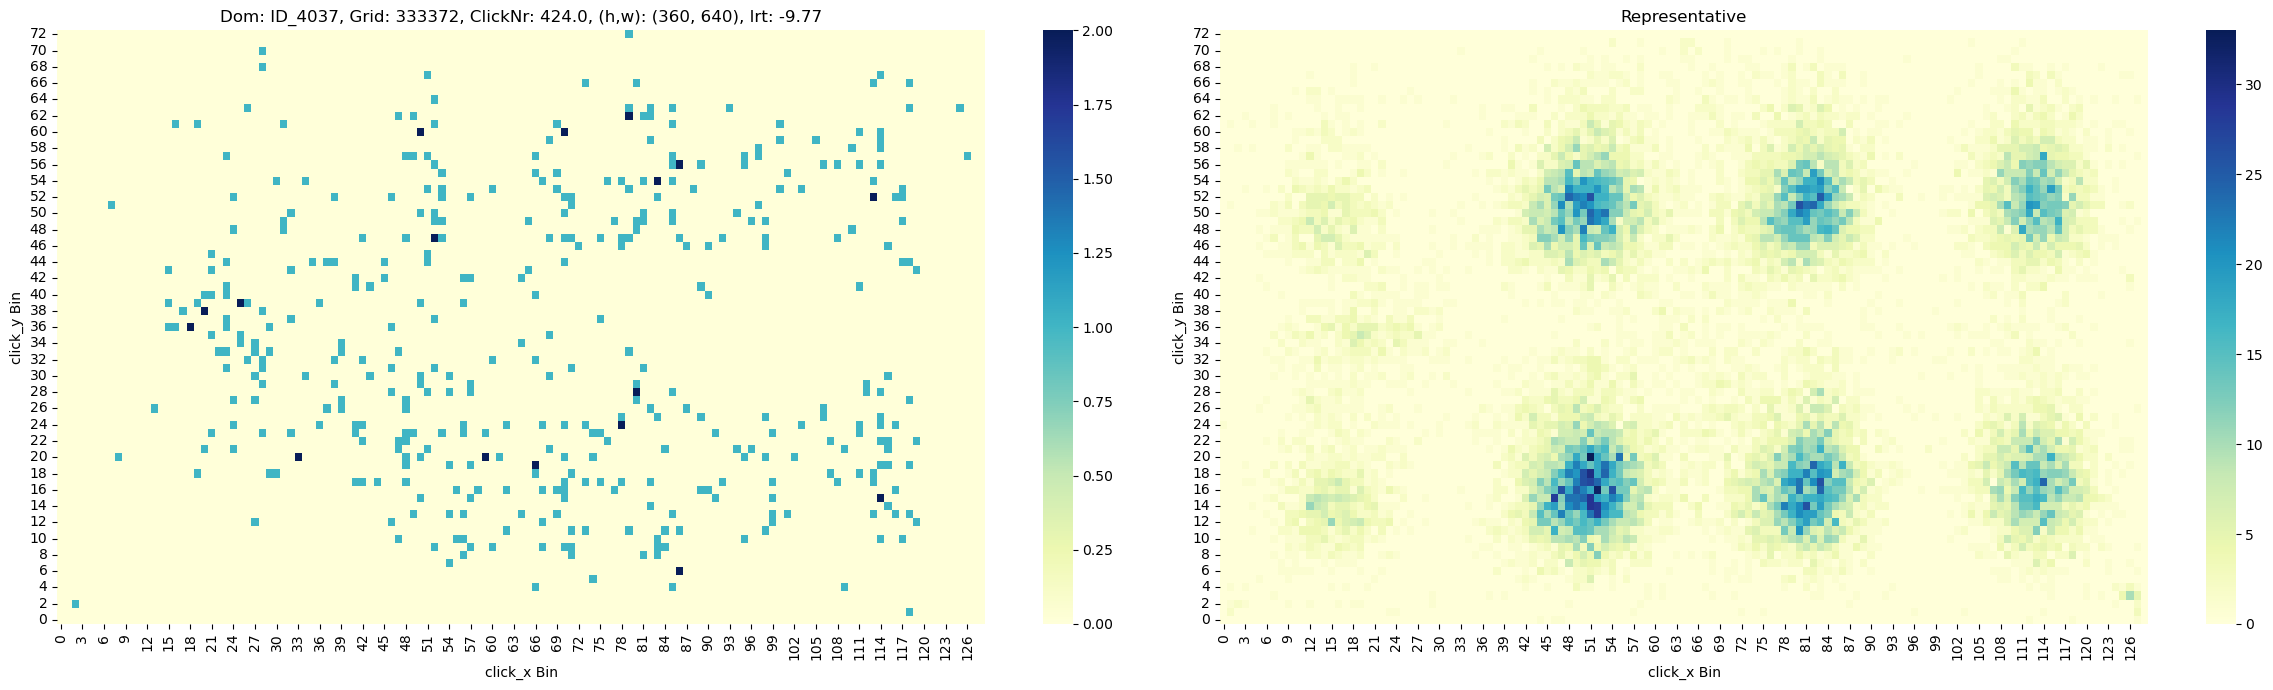

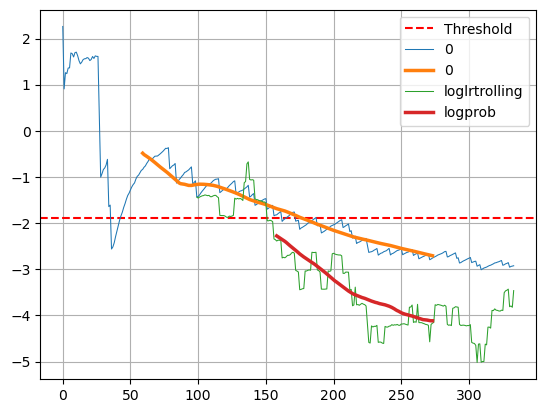

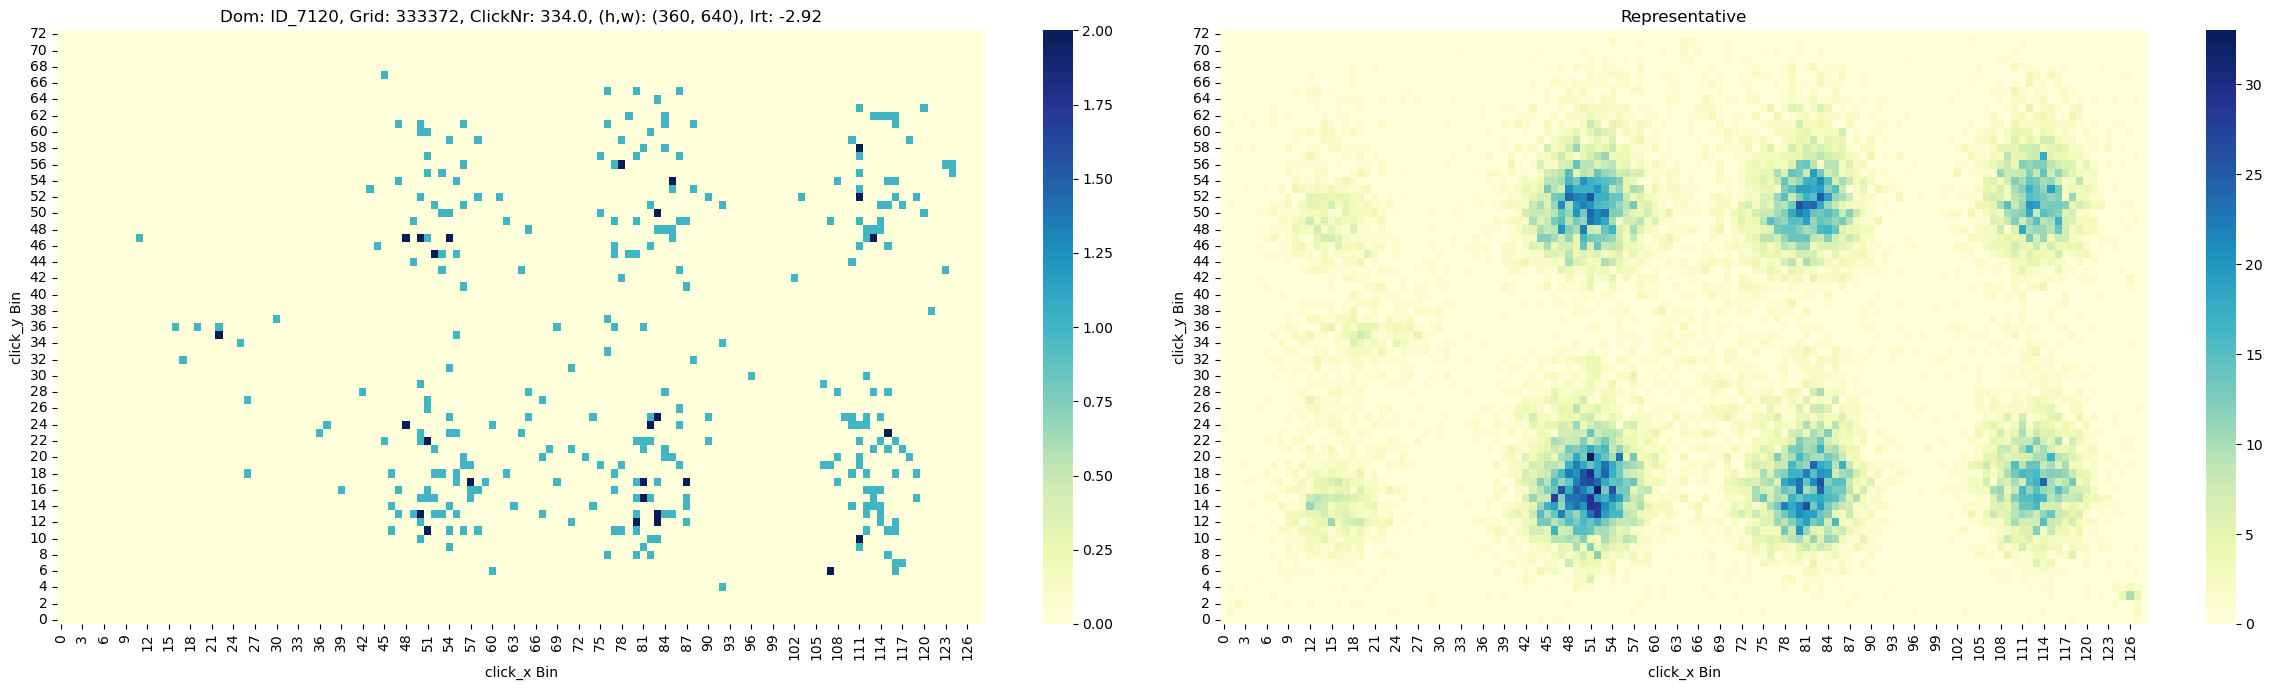

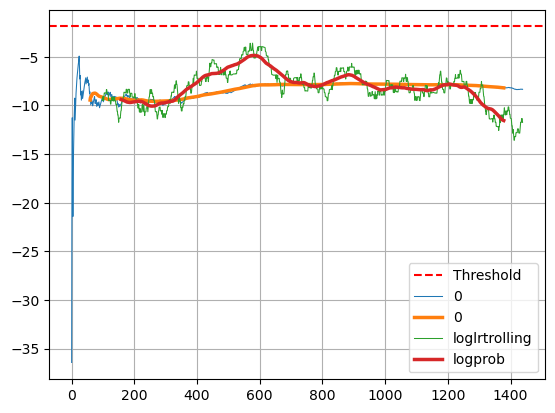

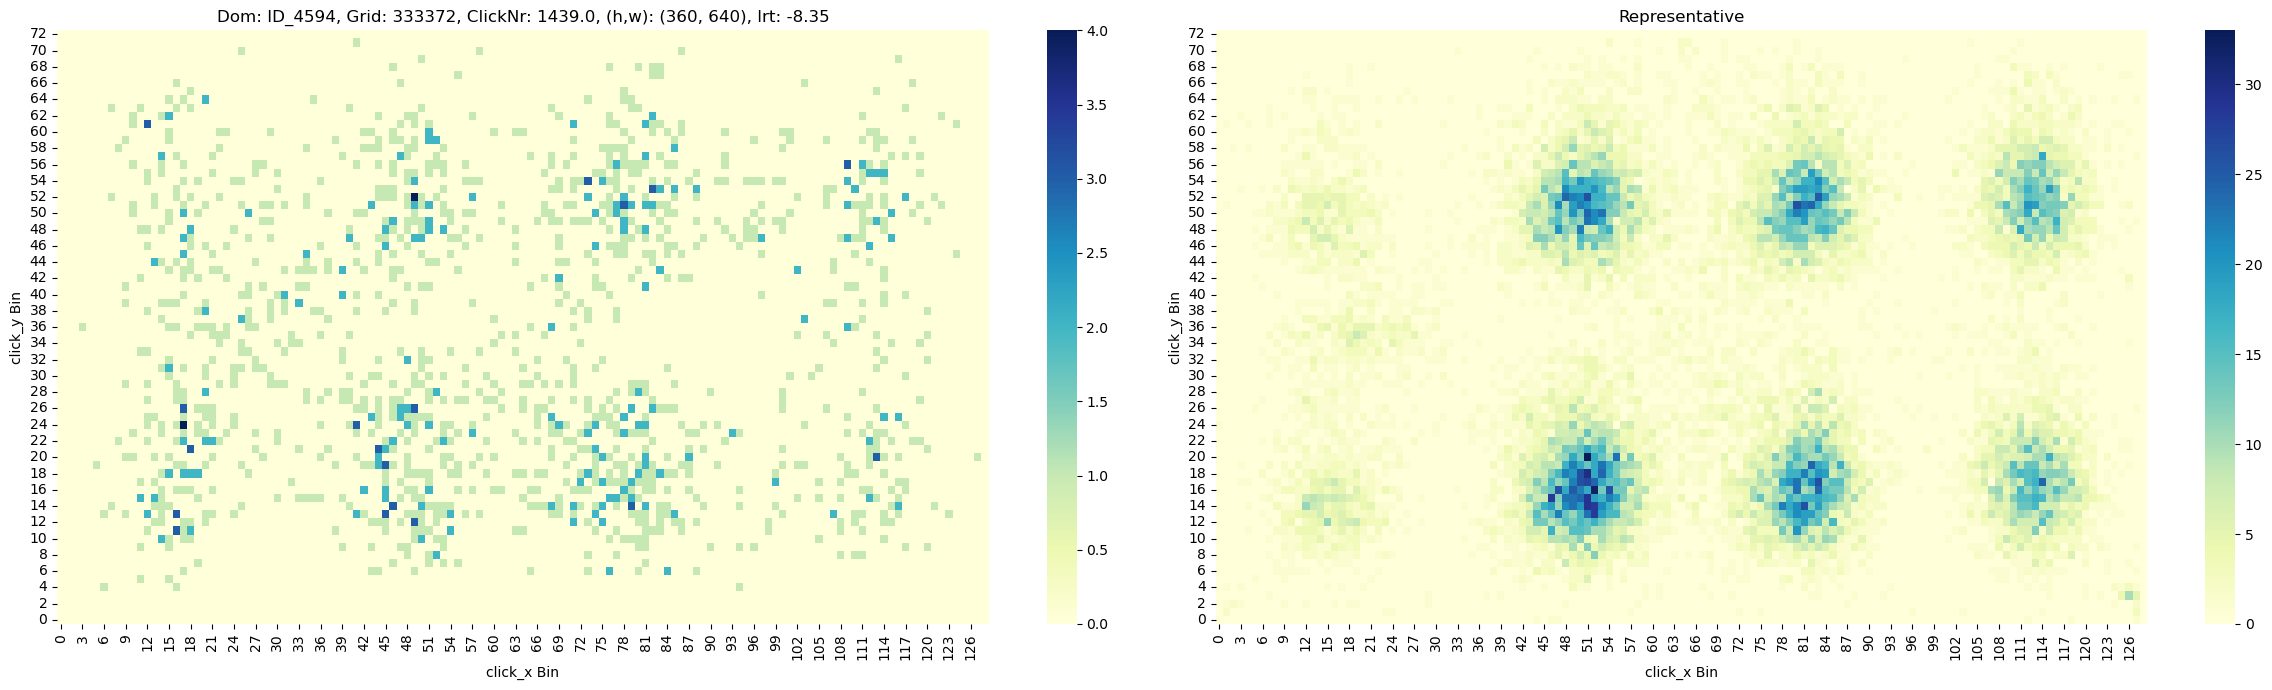

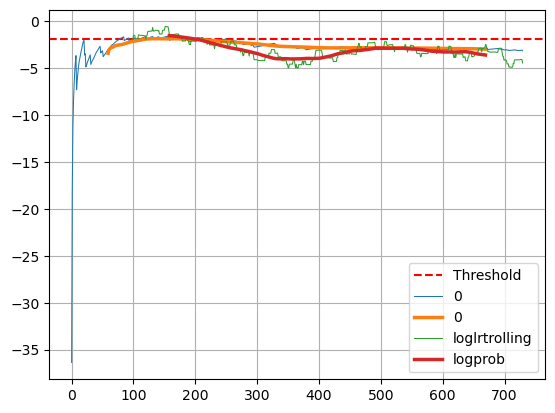

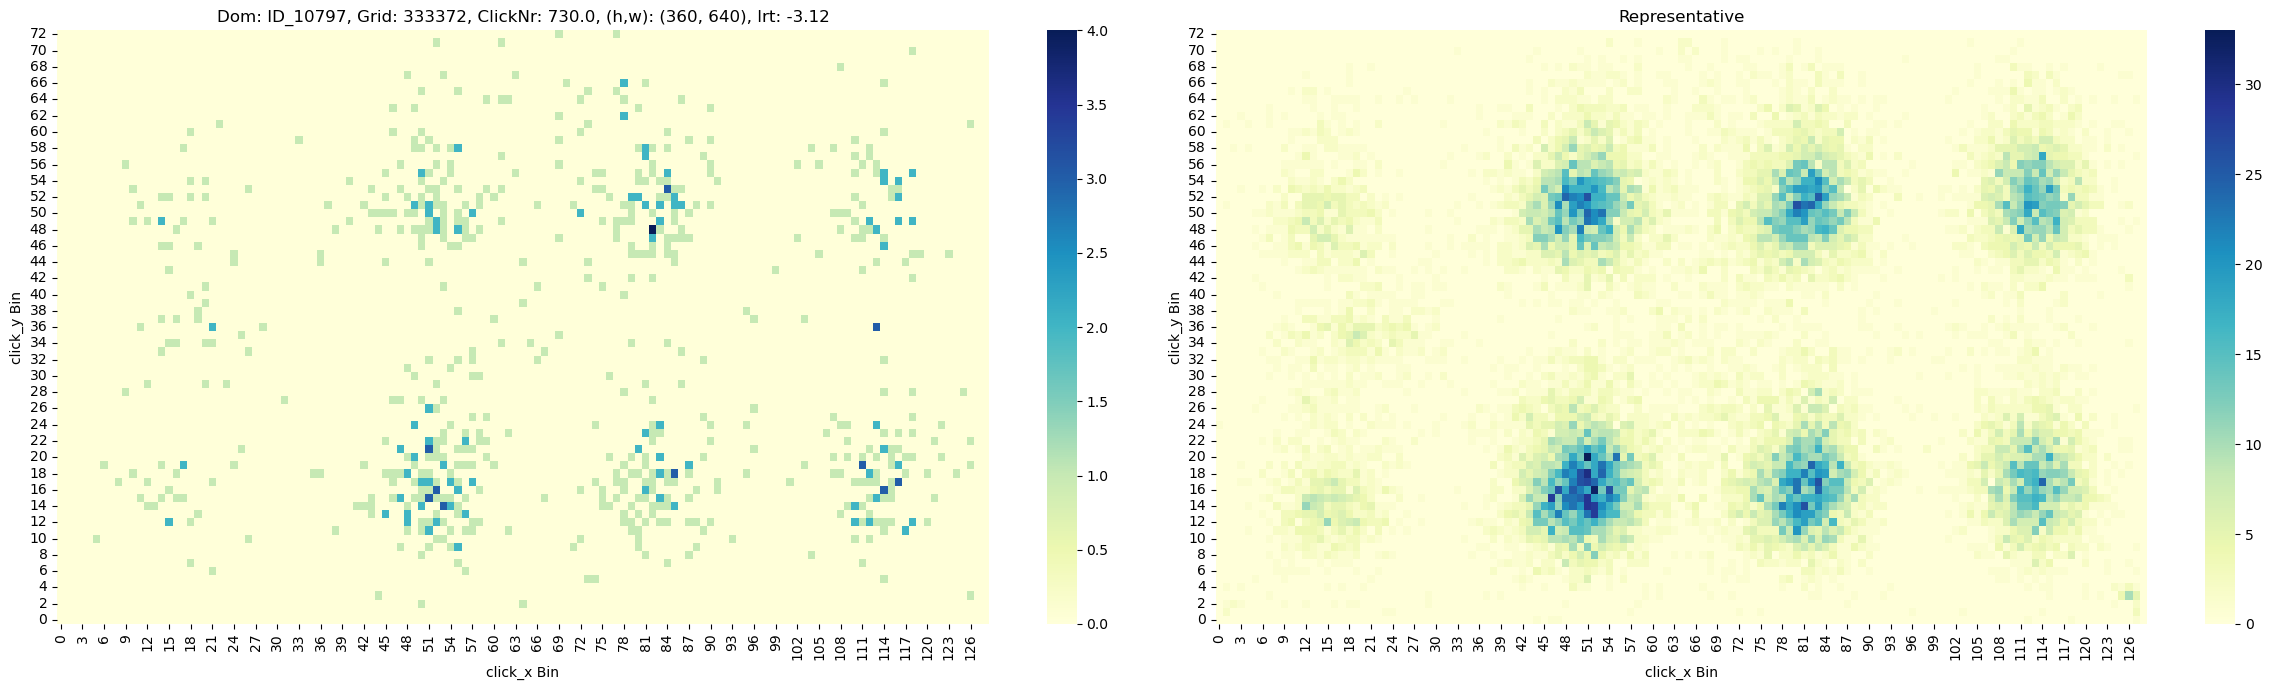

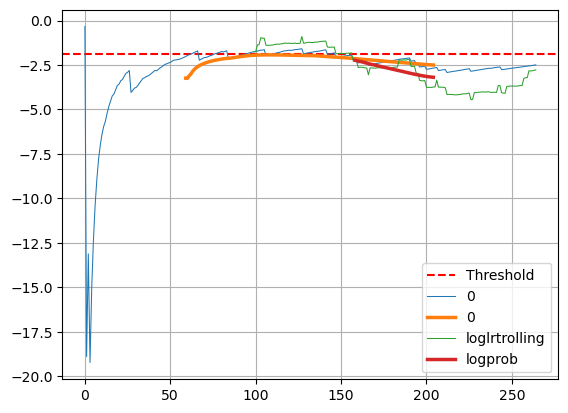

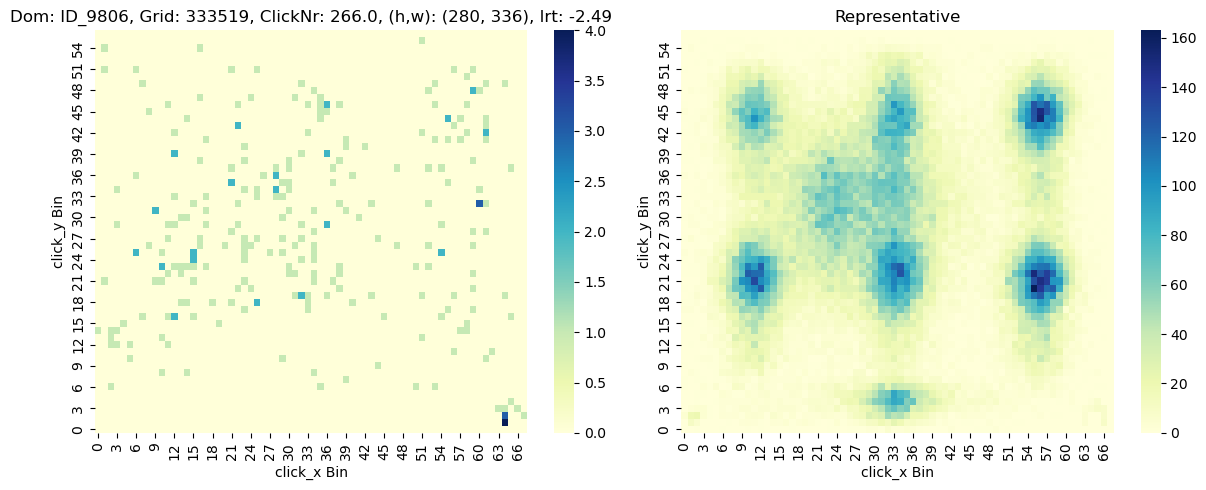

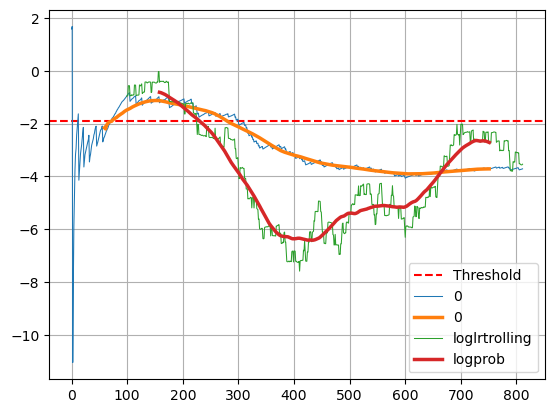

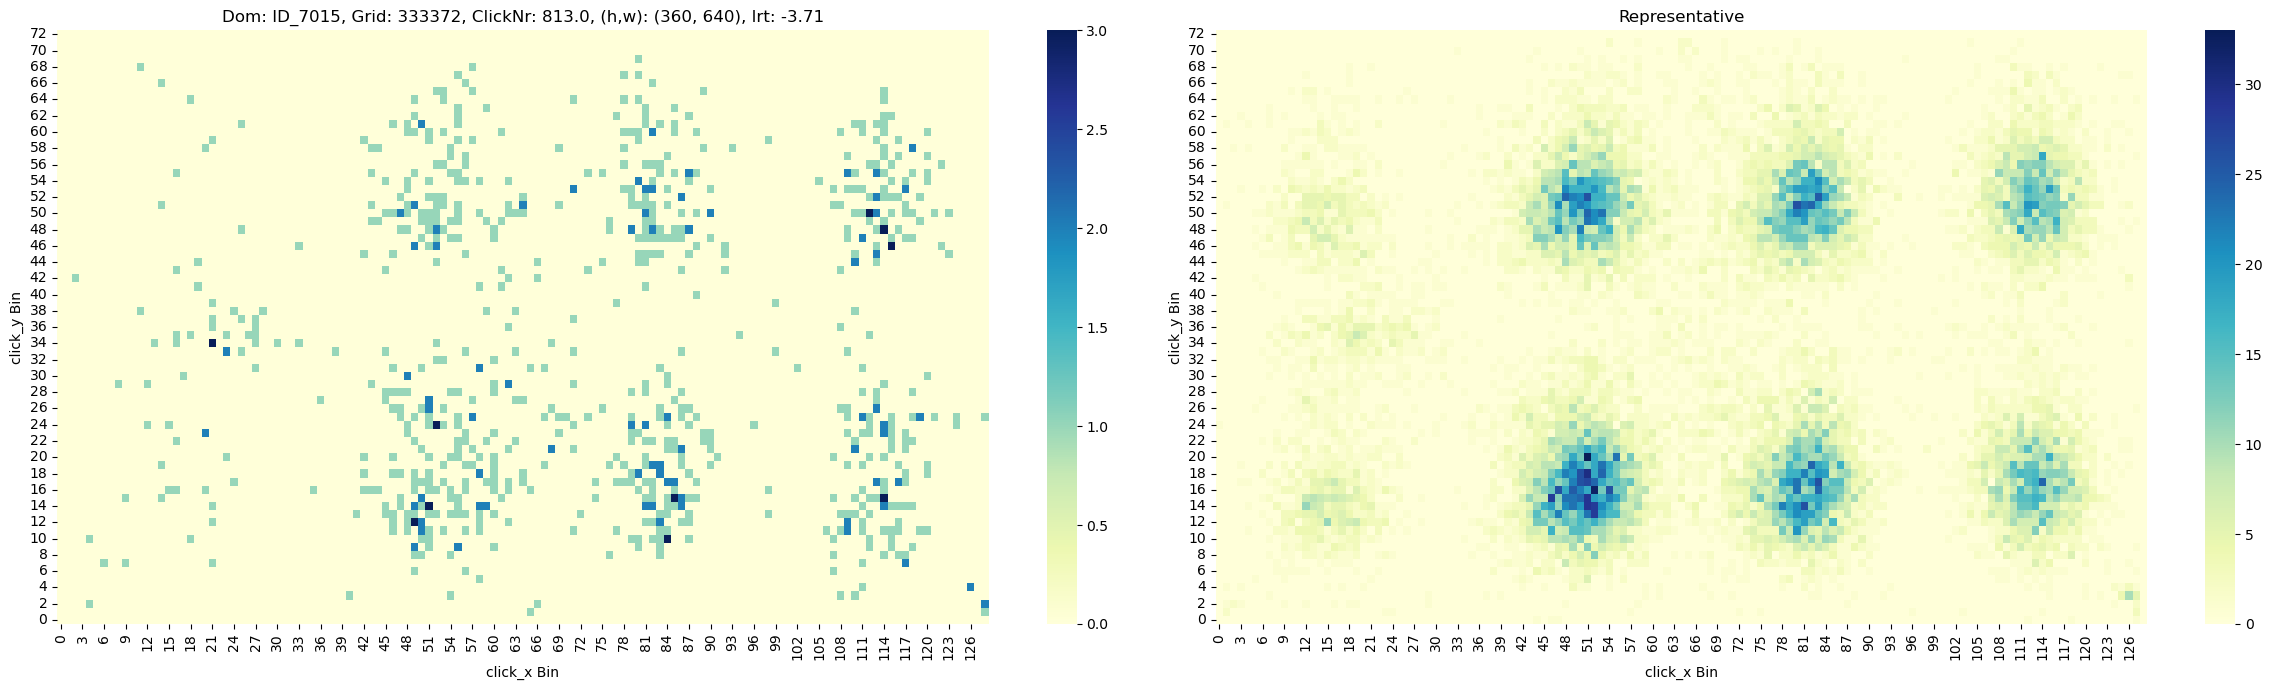

In [55]:
eps = 1e-20
declining = []

for index, row in ddiff_pd.sort_values(by='diff',ascending=False).iloc[:10].iterrows():
    dh, dw, g_id, dom = row['dh'], row['dw'], row['g_id'], row['dom']
    declining.append((dh, dw, g_id, dom))
    data = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))),
                                columns=['click_x_bin', 'click_y_bin'])

    data_obs_rep = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                   (data_heatmap_ts.domain == representative_heatmap_ts_hw[(dh,dw)][g_id]) &
                                   (data_heatmap_ts.display_height==dh) & 
                                   (data_heatmap_ts.display_width==dw)]

    data_obs_rep['click_x_bin'] = (data_obs_rep.click_x/dw*(dw//5)).astype(int)
    data_obs_rep['click_y_bin'] = (data_obs_rep.click_y/dh*(dh//5)).astype(int)
    # example['proba'] = example['clicks']/example['clicks'].sum()

    data_obs_rep = data_obs_rep.groupby(['click_x_bin','click_y_bin']).clicks.sum().reset_index()
    data_obs_rep['proba'] = data_obs_rep['clicks']/data_obs_rep['clicks'].sum()
    
    data_obs_rep = data_obs_rep.merge(data, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='right').fillna(0)

    data_obs_rep['proba'] = data_obs_rep.clicks/data_obs_rep.clicks.sum()

    data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                        on = ['click_x_bin','click_y_bin'], 
                        how='left' )

    data = data.fillna(0)


    # run over domains, dom for given grid_id = g_id:
    # for dom in data_heatmap_ts[(data_heatmap_ts.grid_id==g_id)].domain.unique():

    # data_obs = "observed" heatmap for current domain_id = dom
    data_obs_1 = data_heatmap_ts[(data_heatmap_ts.grid_id == g_id) &
                                (data_heatmap_ts.domain == dom) & 
                                (data_heatmap_ts.display_height == dh) & 
                                (data_heatmap_ts.display_width == dw)]

    data_obs_1['click_x_bin'] = (data_obs_1.click_x/dw*(dw//5)).round().astype(int)
    data_obs_1['click_y_bin'] = (data_obs_1.click_y/dh*(dh//5)).round().astype(int)
    
    from_obs = data_obs_1.sort_values(by='timestamp').merge(data, on=['click_x_bin','click_y_bin'], how='left').fillna(0)
    from_obs['logprob'] = np.log(from_obs['proba']+eps)

    from_obs_tot = from_obs.logprob.mean()
    from_obs_rolling = from_obs.rolling(window = 100)['logprob'].mean()
    from_obs_rolling_ts = pd.concat([data_obs_1[['timestamp']],from_obs_rolling],axis=1)
    
    ####################
    # "lrt" method:

    data_bad = db[(dh,dw)]
    data_bad_mirr = db_mirr[(dh,dw)]
    data_bad = data_bad_mirr
    
    data_obs_bad = data_obs_1.sort_values(by='timestamp').merge(data_bad, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='left').fillna(0)

    data_obs_bad['logprob'] = np.log(data_obs_bad['proba']+eps)
    data_obs_bad_tot = data_obs_bad.logprob.mean()
    data_obs_bad_rolling = data_obs_bad.rolling(window = 100)['logprob'].mean()

    data_obs_bad_rolling_ts = pd.concat([data_obs_bad[['timestamp']],data_obs_bad_rolling],axis=1)
    
    loglrtrolling = from_obs_rolling - data_obs_bad_rolling
    loglrtrolling_ts = from_obs_rolling_ts - data_obs_bad_rolling_ts
    loglrtrolling_ts['timestamp']= from_obs_rolling_ts['timestamp']
    loglrt_tot = from_obs_tot - data_obs_bad_tot

    cumulative_sums = np.cumsum(data_obs_bad.logprob.values)
    mean_cumulative_sums_bad = np.array([cumulative_sums[i] / (i + 1) for i in range(len(cumulative_sums))])
    
    cumulative_sums = np.cumsum(from_obs.logprob.values)
    mean_cumulative_sums_good = np.array([cumulative_sums[i] / (i + 1) for i in range(len(cumulative_sums))])
    
    pp = pd.DataFrame((mean_cumulative_sums_good - mean_cumulative_sums_bad))
    
    # Calculate rolling mean
    rolling_mean_pp = pp.rolling(window=120).mean().shift(-60)
    
    # Plotting
    plt.axhline(y=-1.89, color='red', linestyle='--', label='Threshold')
    pp.plot(ax=plt.gca(), linewidth=0.75, label='pp')
    rolling_mean_pp.plot(ax=plt.gca(), linewidth=2.5, label='Rolling Mean pp')
    loglrtrolling.plot(ax=plt.gca(), linewidth=0.75, label='loglrtrolling')
    loglrtrolling.rolling(window=120).mean().shift(-60).plot(linewidth = '2.5')
    plt.grid()
    plt.legend()
    plt.show()

    tt = pd.DataFrame(list(product(range(0,(dw//5)+1), range(0,(dh//5)+1))), 
                                  columns=['click_x_bin','click_y_bin'])
            
    xx = tt.merge(data_obs_1.groupby(['click_x_bin','click_y_bin']).sum().clicks.reset_index(), 
                  on = ['click_x_bin','click_y_bin'], 
                  how = 'left').fillna(0)
    
    click_matrix_1 = xx.pivot("click_y_bin", "click_x_bin", "clicks").fillna(0)
    click_matrix_2 = data_obs_rep.pivot("click_y_bin", "click_x_bin", "clicks").fillna(0)
    
    fig, axes = plt.subplots(1, 2, figsize=(dw // 50 * 2, dh // 50))
    sns.heatmap(click_matrix_1, ax=axes[0], cmap="YlGnBu", annot=False, cbar=True, fmt="g")
    axes[0].set_title(f'Dom: {dom}, Grid: {g_id}, ClickNr: {xx["clicks"].sum()}, (h,w): {dh,dw}, lrt: {loglrt_tot:.2f}')
    axes[0].set_xlabel('click_x Bin')
    axes[0].set_ylabel('click_y Bin')
    axes[0].invert_yaxis()
    
    sns.heatmap(click_matrix_2, ax=axes[1], cmap="YlGnBu", annot=False, cbar=True, fmt="g")
    axes[1].set_title(f'Representative')
    axes[1].set_xlabel('click_x Bin')
    axes[1].set_ylabel('click_y Bin')
    axes[1].invert_yaxis()
    fig.tight_layout()
    plt.show()

# return (end_time - start_time) / nb_banners, outputs, labels, domains

### 4.3 Visualize evolution

Here we generate some pictures that include the evolution of the heatmap across time.

(280, 336, 333519, 'ID_7585')
click number 345


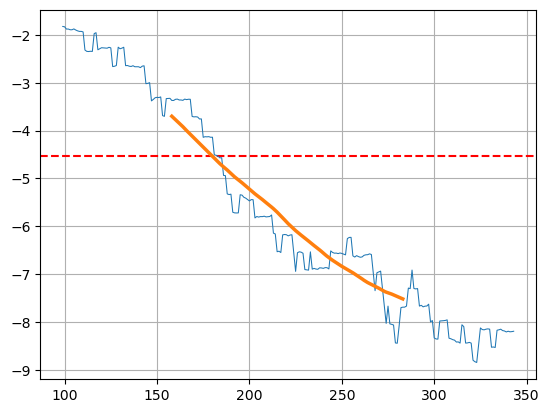

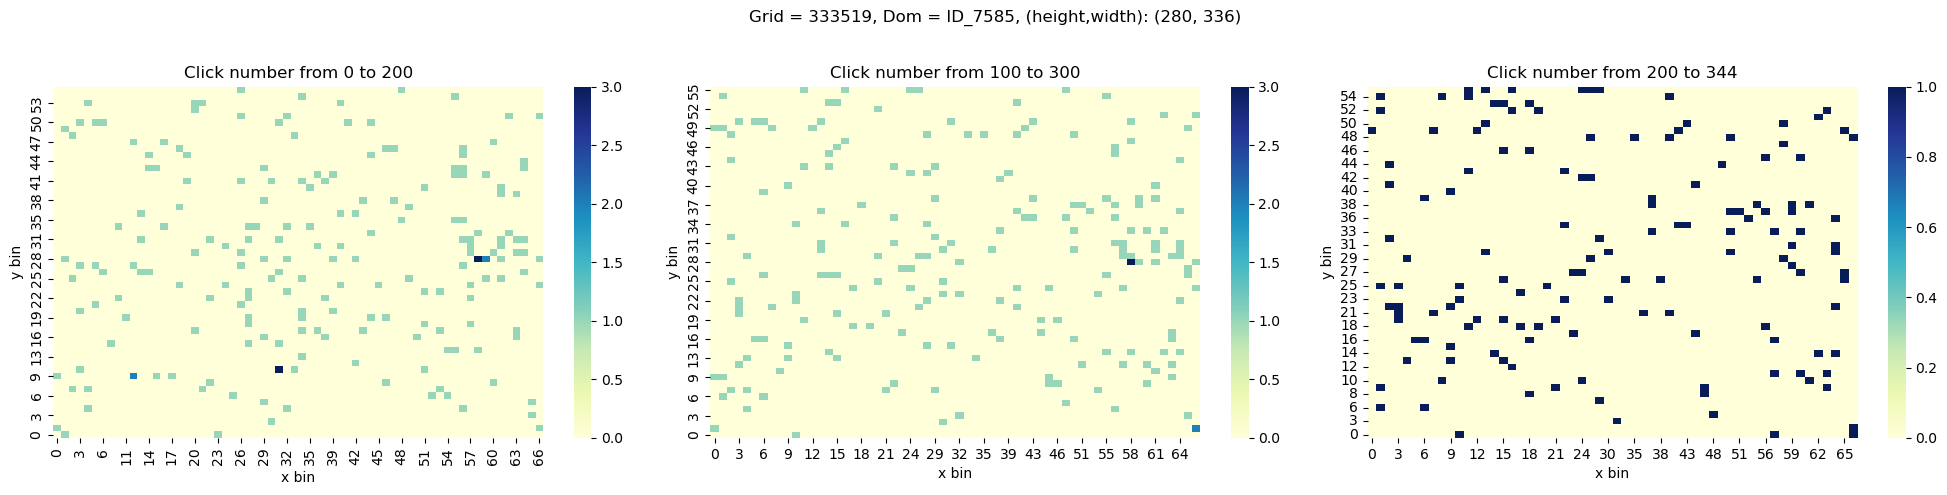

(360, 640, 333372, 'ID_9032')
click number 875


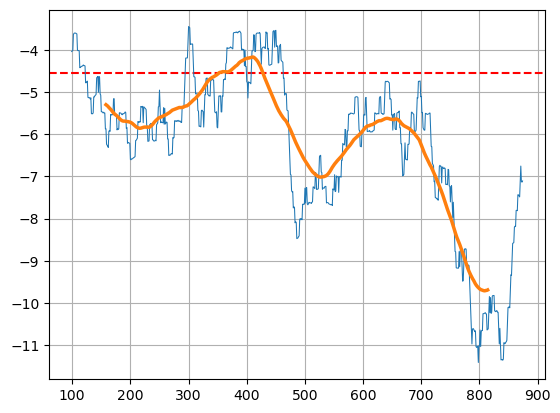

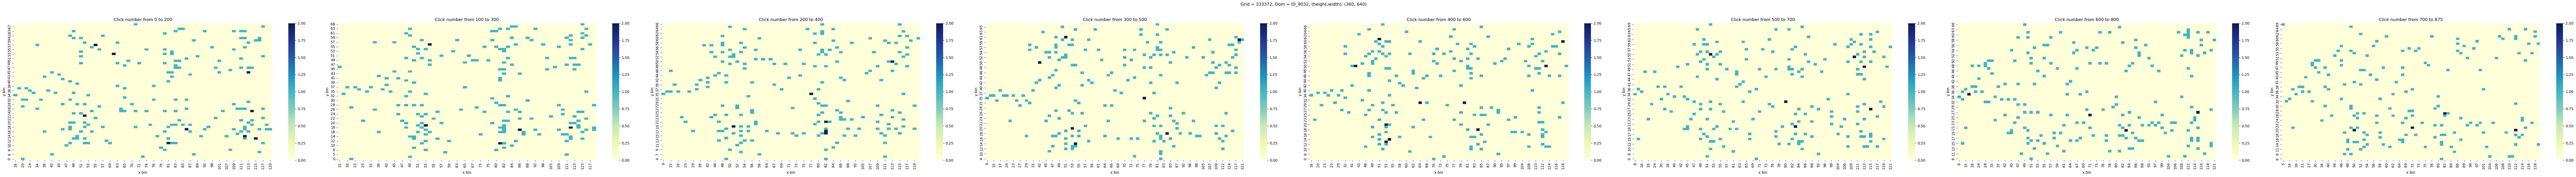

(280, 336, 333519, 'ID_694')
click number 1311


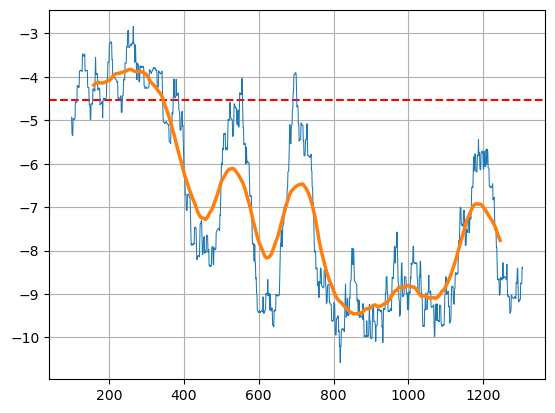

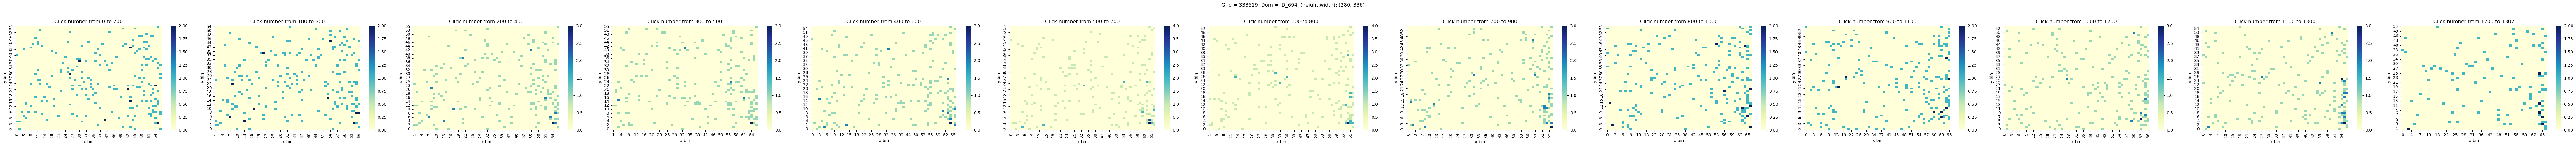

(600, 160, 333372, 'ID_5686')
click number 1326


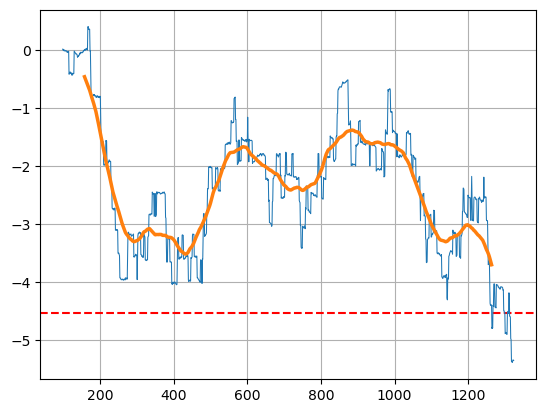

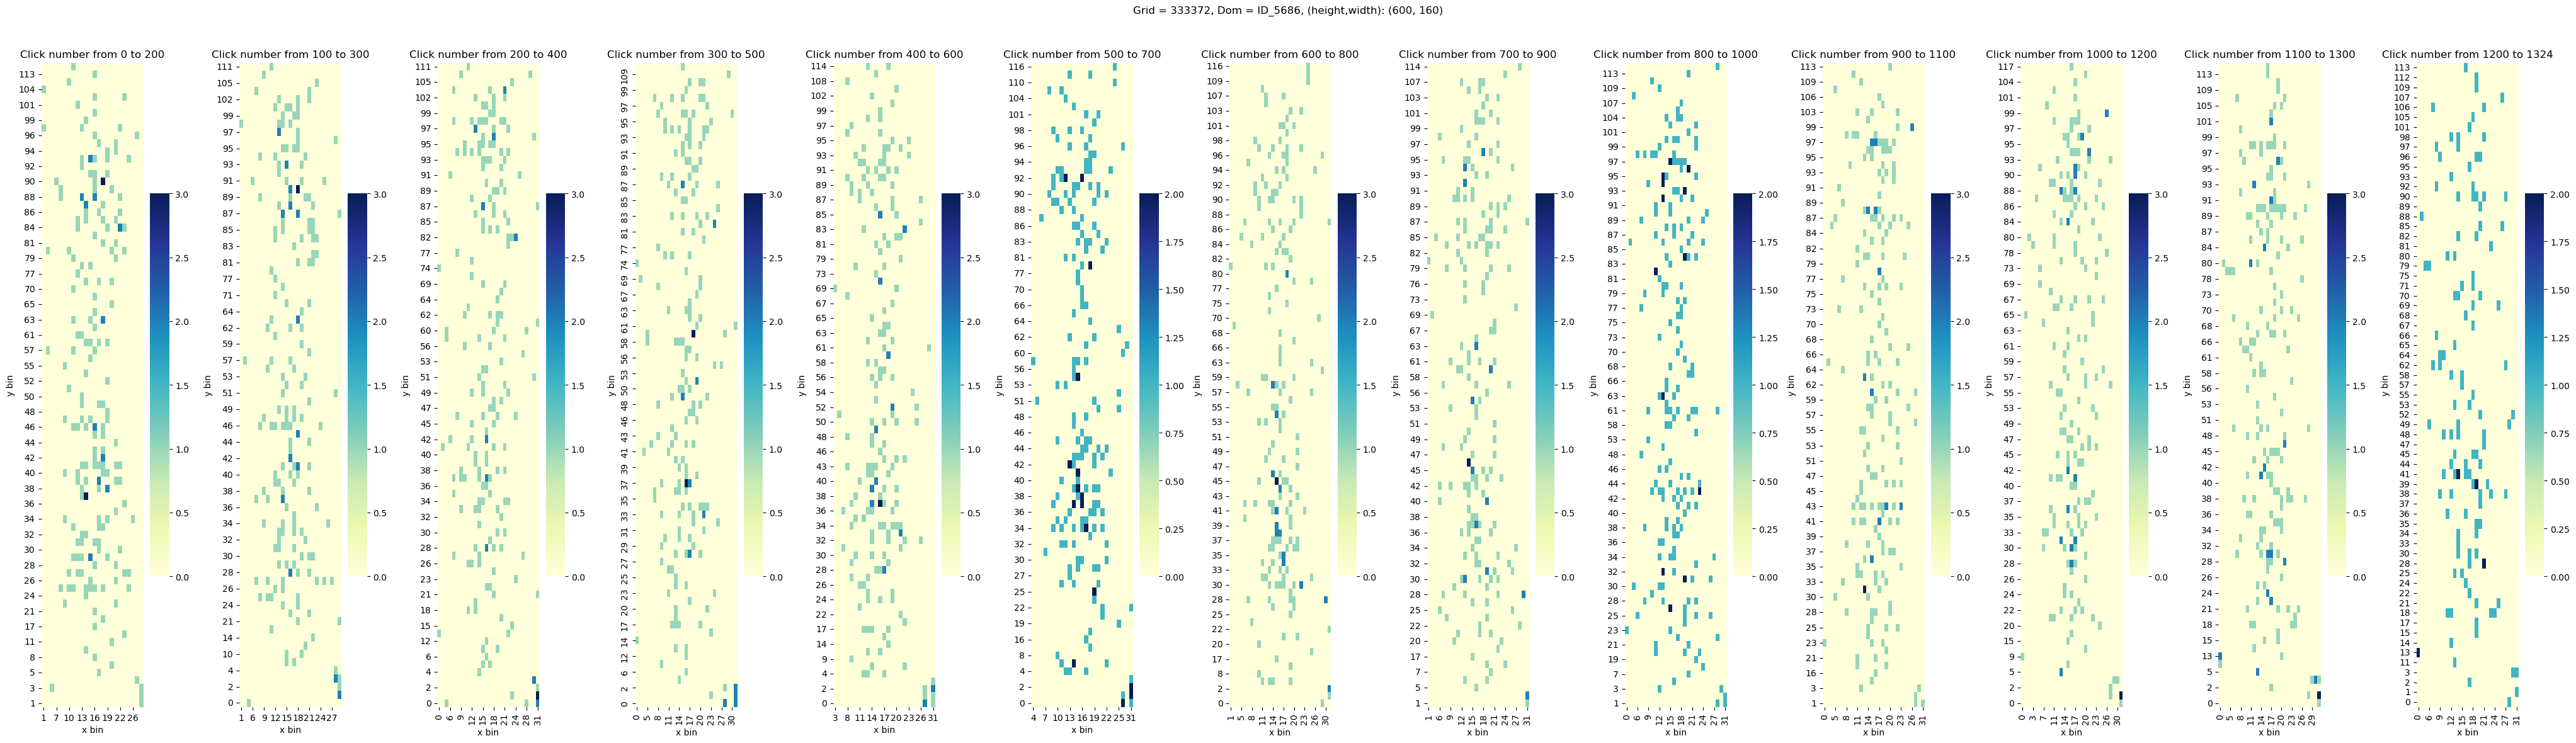

(360, 640, 333372, 'ID_4037')
click number 424


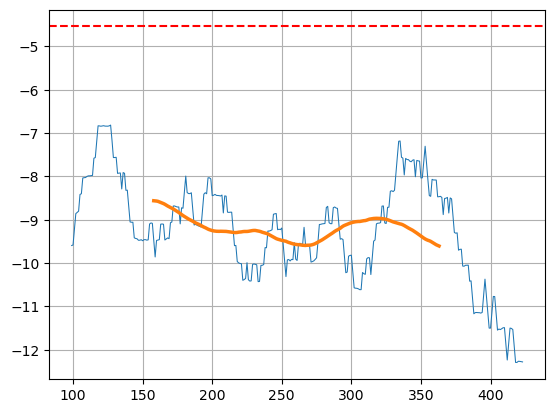

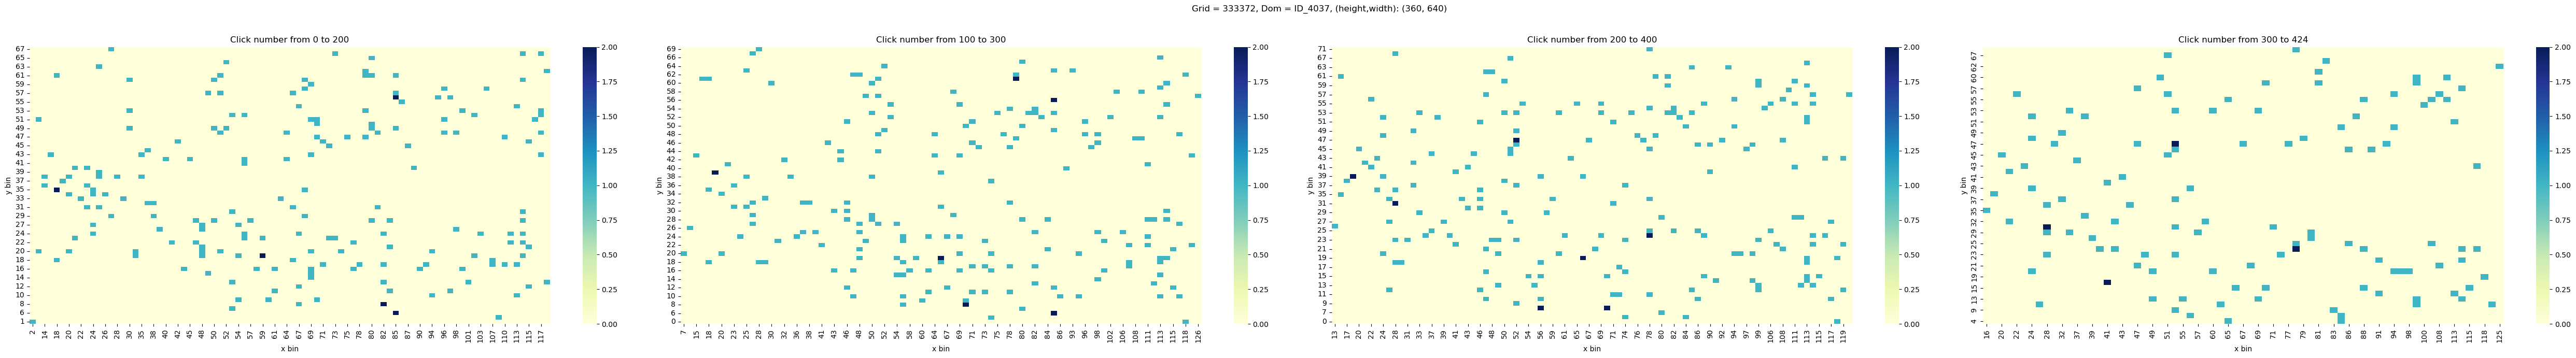

(360, 640, 333372, 'ID_7120')
click number 334


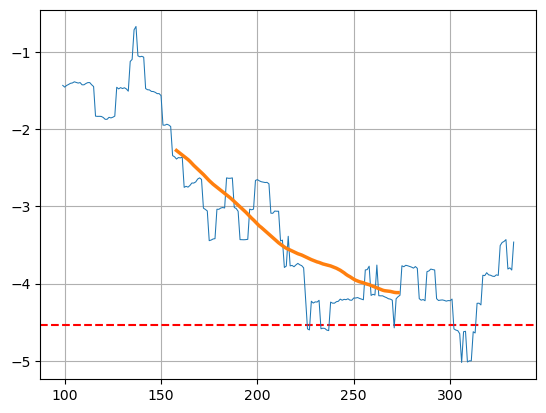

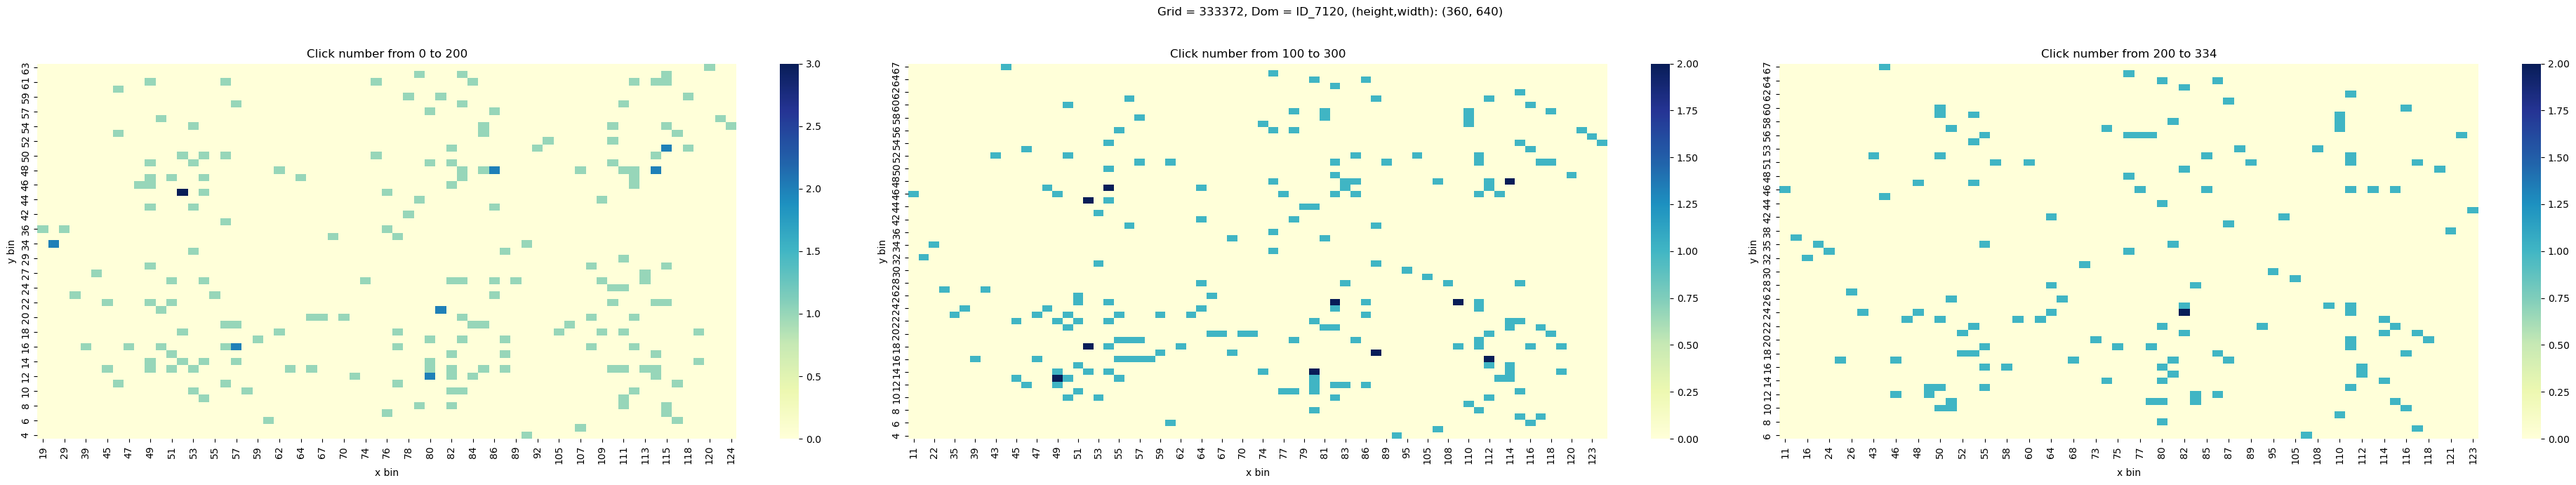

(360, 640, 333372, 'ID_4594')
click number 1439


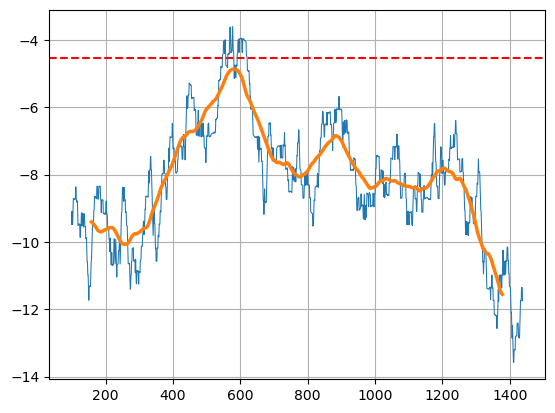

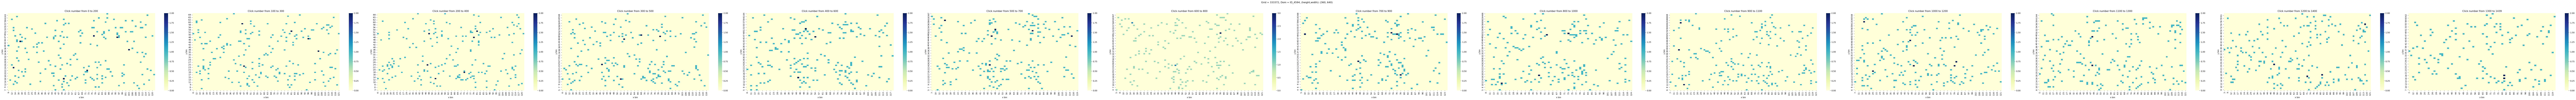

(360, 640, 333372, 'ID_10797')
click number 730


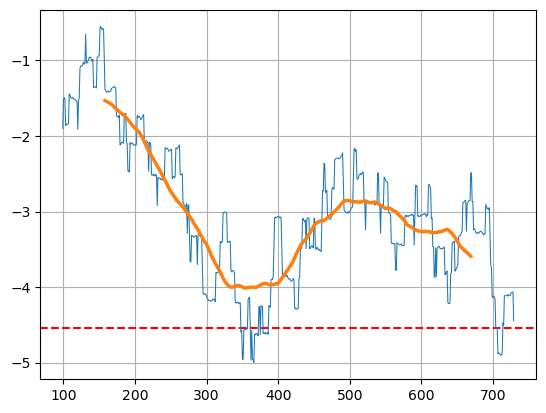

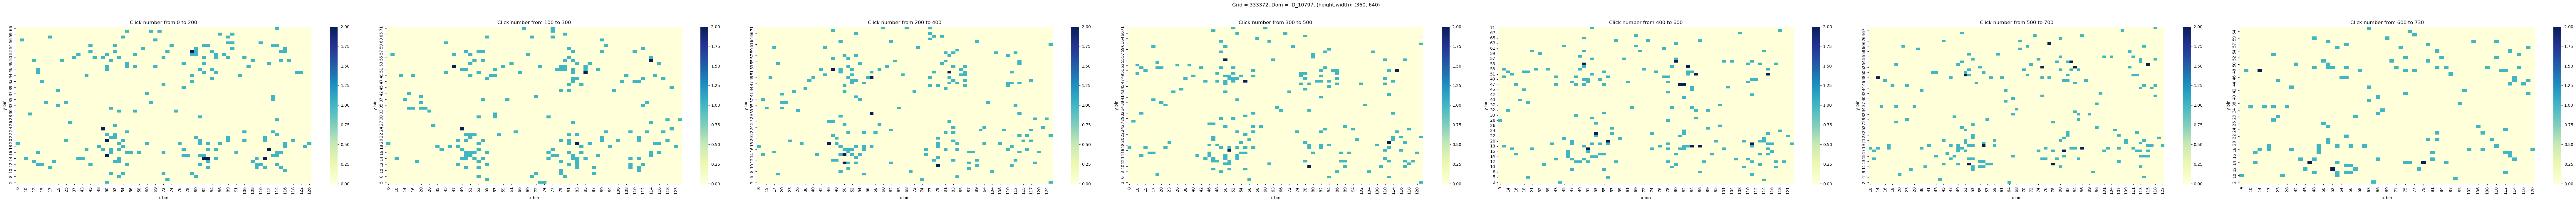

(280, 336, 333519, 'ID_9806')
click number 266


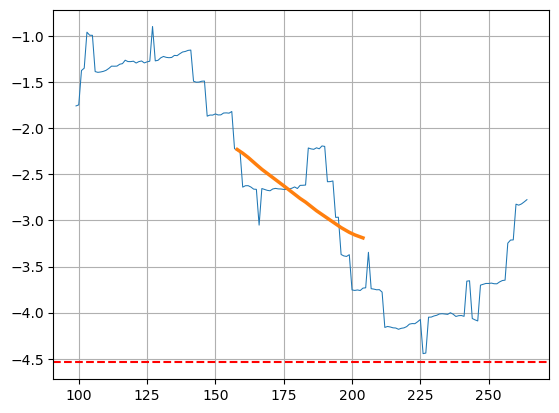

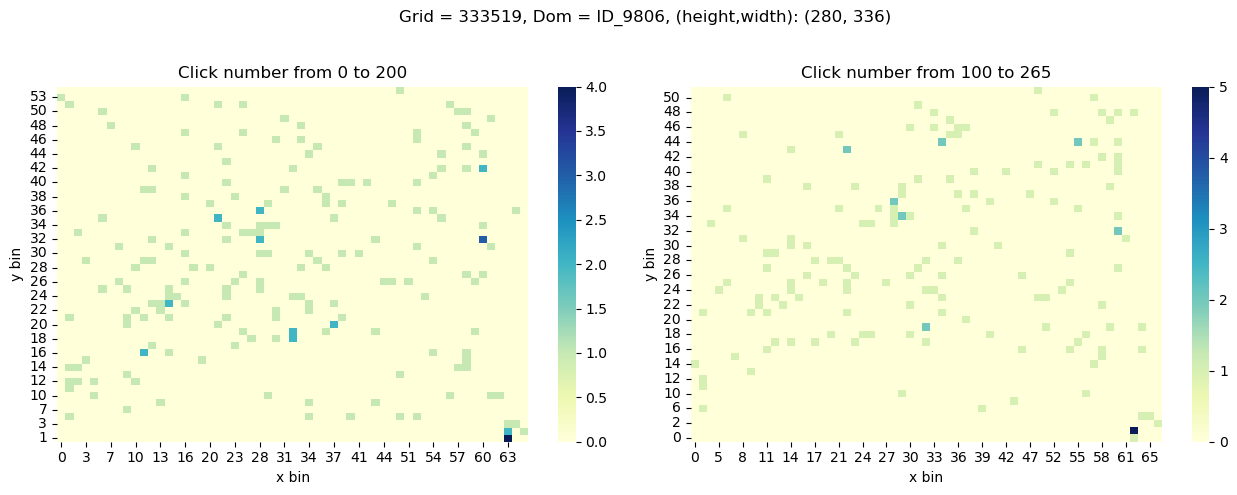

(360, 640, 333372, 'ID_7015')
click number 813


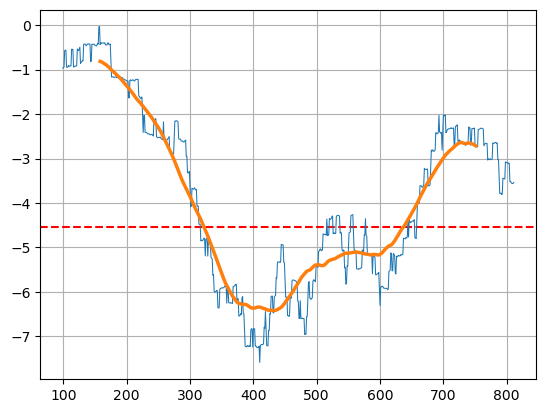

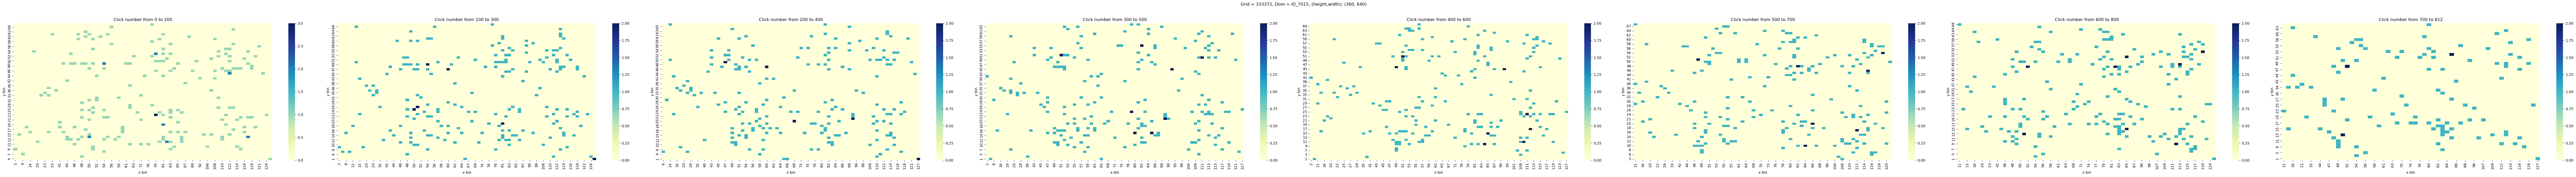

In [56]:
for (dh,dw,g_id,dom) in declining:
    print((dh,dw,g_id,dom))
    gid= g_id
    
    example = data_heatmap_ts[(data_heatmap_ts.grid_id==gid) & (data_heatmap_ts.domain==dom)
                    & (data_heatmap_ts.display_height==dh) & (data_heatmap_ts.display_width==dw)].copy().reset_index()
    example = example.sort_values(by='timestamp').reset_index()
    example['click_x1'] = (example.click_x/dw*(dw//5)).astype(int)
    example['click_y1'] = (example.click_y/dh*(dh//5)).astype(int)
    print('click number',example.clicks.sum())
    
    plt.axhline(y=-4.540, color='red', linestyle='--')
    rolling[(dh,dw,g_id,dom)].plot(linewidth = '.75')
    rolling[(dh,dw,g_id,dom)].rolling(window=120).mean().shift(-60).plot(linewidth = '2.5')
    plt.grid()

    
    ex = np.arange(0, example.shape[0], 100, dtype=int)

    nr_pics = example.clicks.sum()//100
    fig, axes = plt.subplots(1,nr_pics, figsize=(nr_pics*dw//50,dh//50)) 
    
    fig.suptitle(f'Grid = {gid}, Dom = {dom}, (height,width): {dh,dw}')
    
    i, j = 0, 2
    
    for ax_idx, ax in enumerate(axes.flat):
        if j-1 < ex.shape[0]:
            cli = ex[i]
            if j >= len(ex):
                clj = example.shape[0]
            else:
                clj = ex[j]
            i += 1
            j += 1
            
            click_matrix = example.iloc[cli:clj].groupby(['click_x1', 'click_y1']).clicks.sum().reset_index().pivot(
                "click_y1", "click_x1", "clicks").fillna(0)
    
            sns.heatmap(click_matrix, cmap="YlGnBu", 
                        annot=False, cbar=True, fmt="g", ax=ax)
            ax.set_title(f'Click number from {cli} to {clj}')
            ax.set_xlabel('x bin')
            ax.set_ylabel('y bin')
            ax.invert_yaxis()
        else:
            ax.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
